# Customer Retention - EDA Analysis

E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Case Study: 

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store;
it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. 
A comprehensive review of the literature, theories and models have been carried out to propose the models 
for customer activation and customer retention. Five major factors that contributed to the success of an 
e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. 
The research furthermore investigated the factors that influence the online customers repeat purchase intention. 
The combination of both utilitarian value and hedonistic values are needed to affect the repeat 
purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. 
Results indicate the e-retail success factors, which are very much critical for customer satisfaction.


Prediction:

We need to analyse the data to predict the E-retail factors for customer activation and retention

In [627]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

import re
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [802]:
# loading Customer Retention dataset and Creating DataFrame

cr = pd.read_csv('Customer_retention_dataset.csv')

customer = pd.DataFrame(data = cr)
customer

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

In [803]:
customer.shape

(269, 71)

We have total of 269 rows and 71 columns in customer retention dataset

In [804]:
customer.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [805]:
# Importing re library to remove numerical data from columns

import re

In [806]:
# Removing numerical data from columns

customer.columns = customer.columns.str.replace('\t','').str.strip()

customer1 =[]
for i in range(len(customer.columns)):
    if i ==len(customer.columns)-72:
        break
    else:
        cust = re.sub(r'[0-9]','',customer.columns[i]).strip()
    customer1.append(cust)
customer1
customer.columns = customer1
customer.columns

Index(['Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past  year?',
       'How do you access the internet while shopping on-line?',
       'Which device do you use to access the online shopping?',
       'What is the screen size of your mobile device?',
       'What is the operating system (OS) of your device?',
       'What browser do you run on your device to access the website?',
       'Which channel did you follow to arrive at your favorite online store for the first time?',
       'After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',
       'What is your preferred payment Option?',
       'How frequently do you abandon (selecting an items and leaving without mak

In [807]:
customer

Gender of respondent    How old are you?  \
0                   Male         31-40 years   
1                 Female         21-30 years   
2                 Female         21-30 years   
3                   Male         21-30 years   
4                 Female         21-30 years   
..                   ...                 ...   
264               Female         21-30 years   
265               Female         31-40 years   
266               Female         41-50 yaers   
267               Female  Less than 20 years   
268               Female         41-50 yaers   

    Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    
..                                  ...   
264                               Solan   
265                           Ghaziabad   
266                          Bangalore    
267                               Solan   
268                           Ghaziabad   

     What is the Pin Code of where you shop online from?  \
0                                               110009     
1                                               110030     
2                                               201308     
3                                               132001     
4                                               530068     
..                                                 ...     
264                                             173212     
265                                             201008     
266                                             560010     
267                                             173229     
268                                             201009     

    Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   
..                                       ...   
264                                1-2 years   
265                                1-2 years   
266                                2-3 years   
267                                2-3 years   
268                                2-3 years   

    How many times you have made an online purchase in the past  year?  \
0                                          31-40 times                   
1                                   41 times and above                   
2                                   41 times and above                   
3                                   Less than 10 times                   
4                                          11-20 times                   
..                                                 ...                   
264                                 Less than 10 times                   
265                                        31-40 times                   
266                                 Less than 10 times                   
267                                 Less than 10 times                   
268                                        31-40 times                   

    How do you access the internet while shopping on-line?  \
0                                              Dial-up       
1                                                Wi-Fi       
2                                      Mobile Internet       
3                                      Mobile Internet       
4                                                Wi-Fi       
..                                                 ...       
264                                    Mobile Internet       
265                                    Mobile Internet       
266                                    Mobile internet       
267                                              Wi-Fi       
268                                    Mo

In [810]:
customer.info

<bound method DataFrame.info of     Gender of respondent    How old are you?  \
0                   Male         31-40 years   
1                 Female         21-30 years   
2                 Female         21-30 years   
3                   Male         21-30 years   
4                 Female         21-30 years   
..                   ...                 ...   
264               Female         21-30 years   
265               Female         31-40 years   
266               Female         41-50 yaers   
267               Female  Less than 20 years   
268               Female         41-50 yaers   

    Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    
..                                  ...   
264                               Solan   
265                           Ghaziabad   
266 

In [811]:
# Analysing datatypes

customer.dtypes

Gender of respondent                                                                                         object
How old are you?                                                                                             object
Which city do you shop online from?                                                                          object
What is the Pin Code of where you shop online from?                                                           int64
Since How Long You are Shopping Online ?                                                                     object
How many times you have made an online purchase in the past  year?                                           object
How do you access the internet while shopping on-line?                                                       object
Which device do you use to access the online shopping?                                                       object
What is the screen size of your mobile device?                          

Analyzing Datatypes:

Except pin code(int64) all the other columns datatype are objects  
Target Column 'Which of the Indian online retailer would you recommend to a friend?' is also object with categorical data.
We can consider the dataset as supervised classification data.

In [812]:
# Analysing dataset to find null values

customer.isnull().sum()

Gender of respondent                                                                                         0
How old are you?                                                                                             0
Which city do you shop online from?                                                                          0
What is the Pin Code of where you shop online from?                                                          0
Since How Long You are Shopping Online ?                                                                     0
How many times you have made an online purchase in the past  year?                                           0
How do you access the internet while shopping on-line?                                                       0
Which device do you use to access the online shopping?                                                       0
What is the screen size of your mobile device?                                                               0
W

We dont have any null values found in the dataset

<AxesSubplot:>

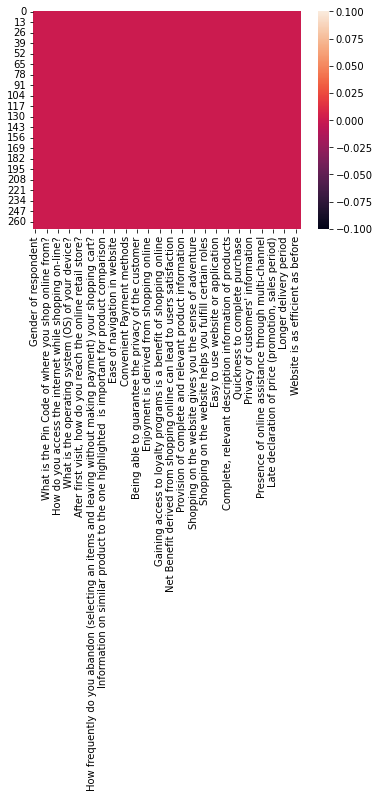

In [813]:
sns.heatmap(customer.isnull())

Visualizing data in heatmap to identify if there are any null values

We didnt find any null values in our dataset

In [814]:
# Checking values in our Target column

customer['Which of the Indian online retailer would you recommend to a friend?'].value_counts()

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64

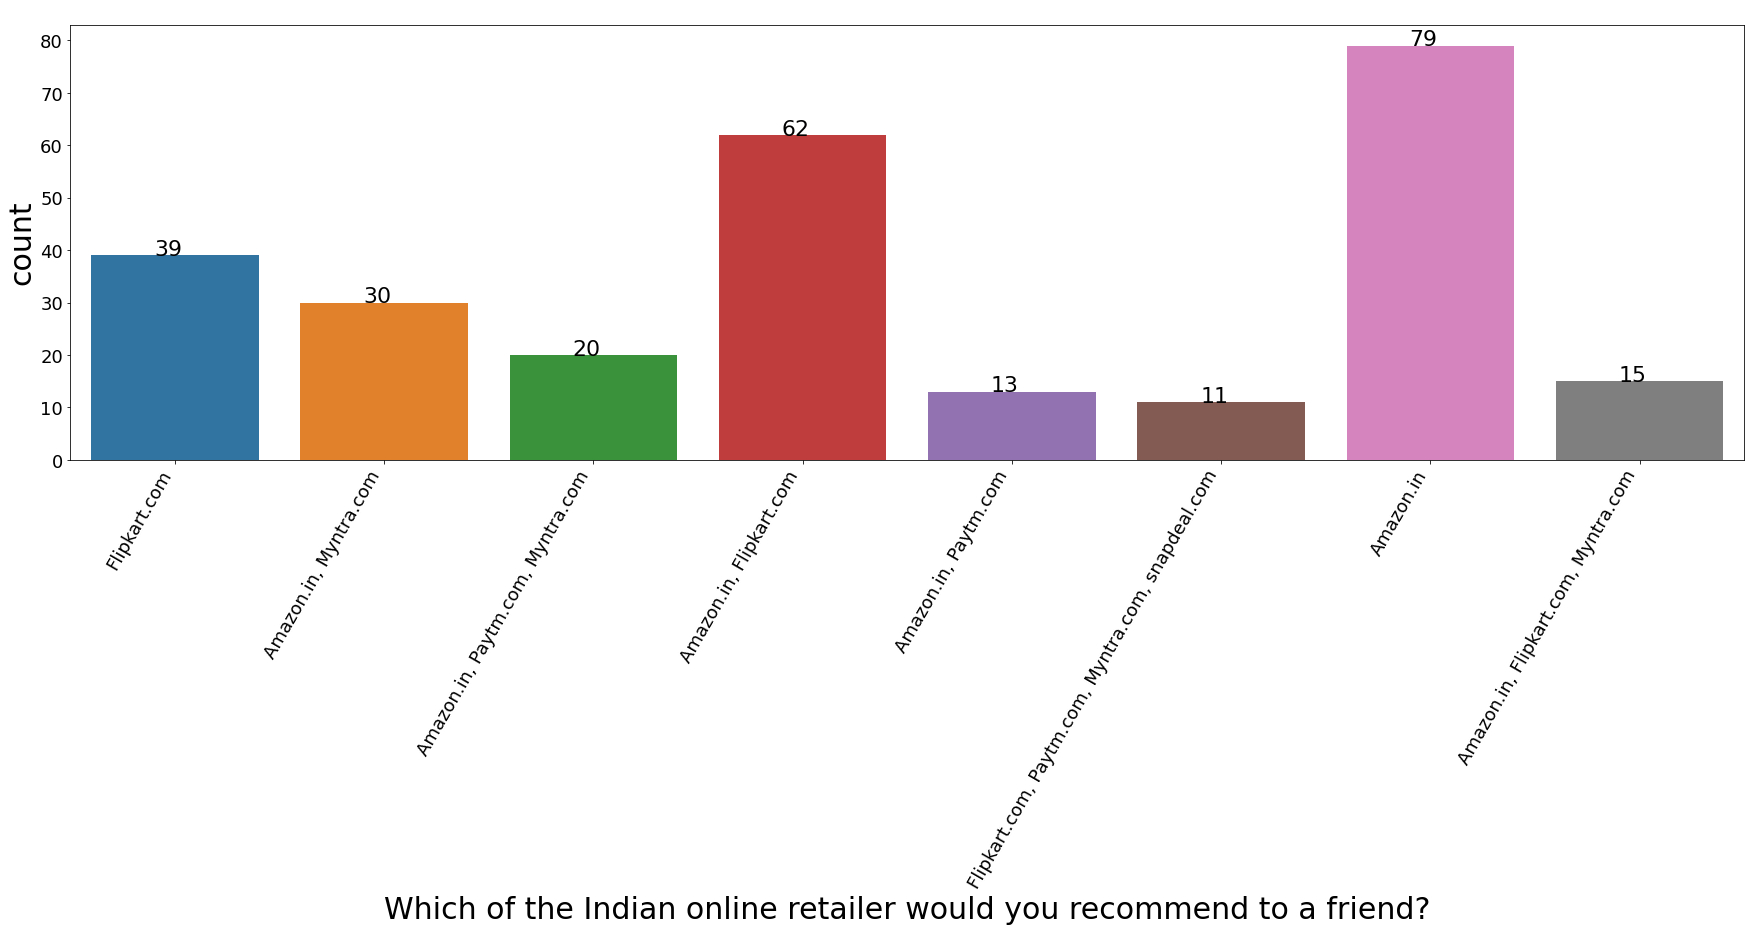

In [815]:
# Visualizing our Target column

countp = sns.countplot(data = customer,x='Which of the Indian online retailer would you recommend to a friend?')
fig = plt.gcf()
fig.set_size_inches(30,8)
plt.xlabel('Which of the Indian online retailer would you recommend to a friend?',fontsize=30)
plt.xticks(size=18,rotation=60, ha='right')
plt.ylabel('count',fontsize=30)
plt.yticks(size=18)


for p in countp.patches:
    countp.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), color='black', size=22,)



Observation:
    
Based on the customer response we can identify Amazon was the highly recommended E- Retailer among customers

Followed by flipkart

[]

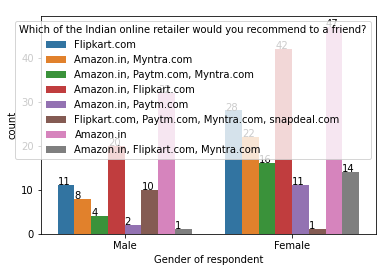

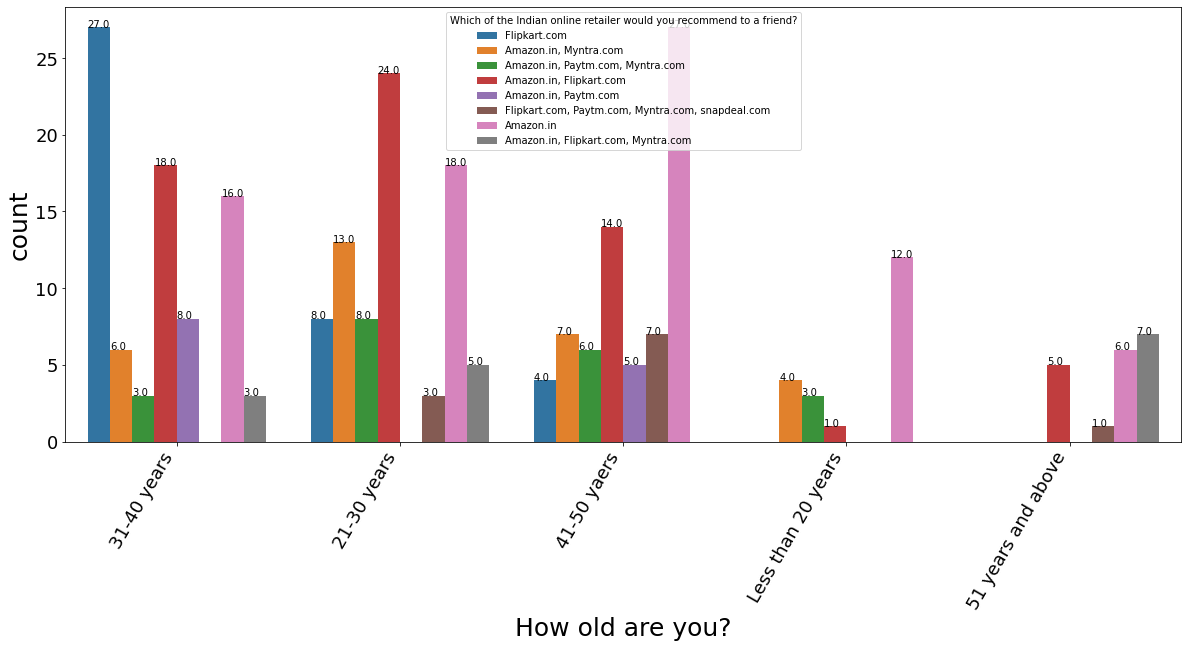

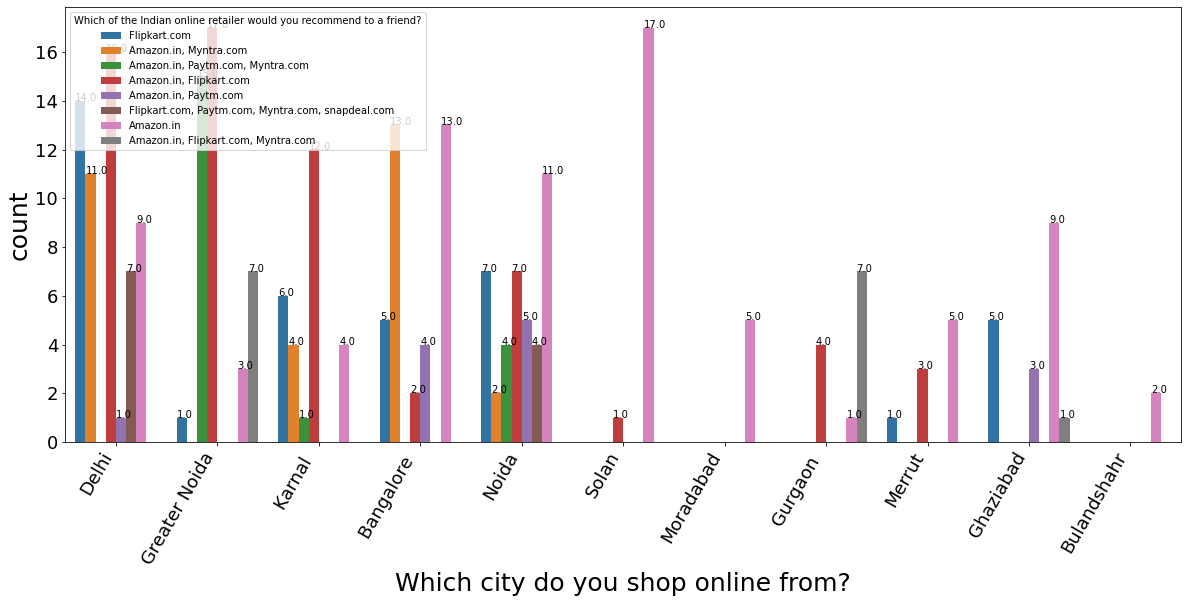

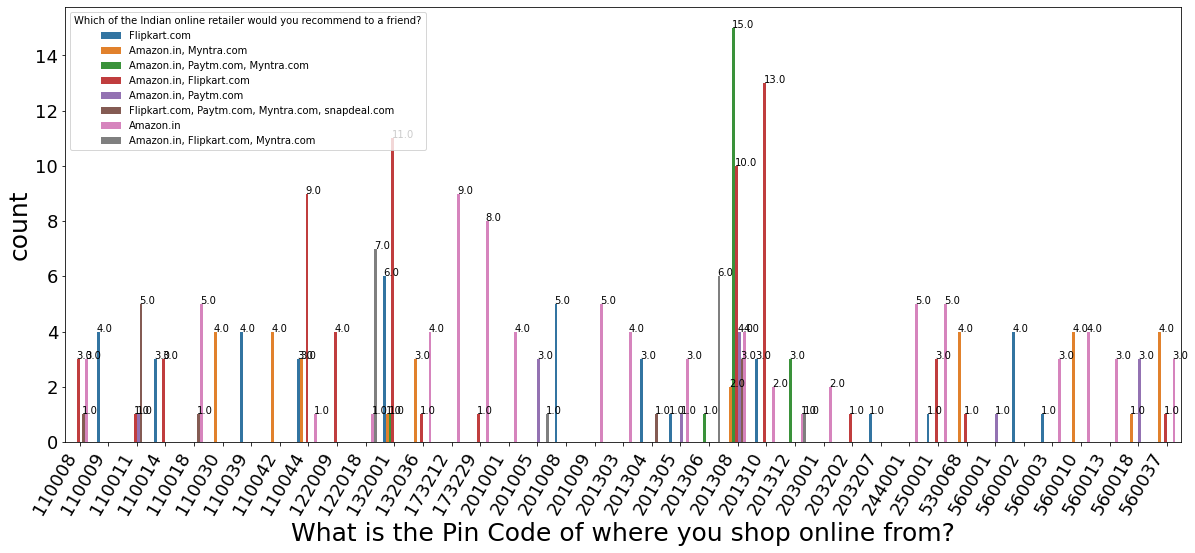

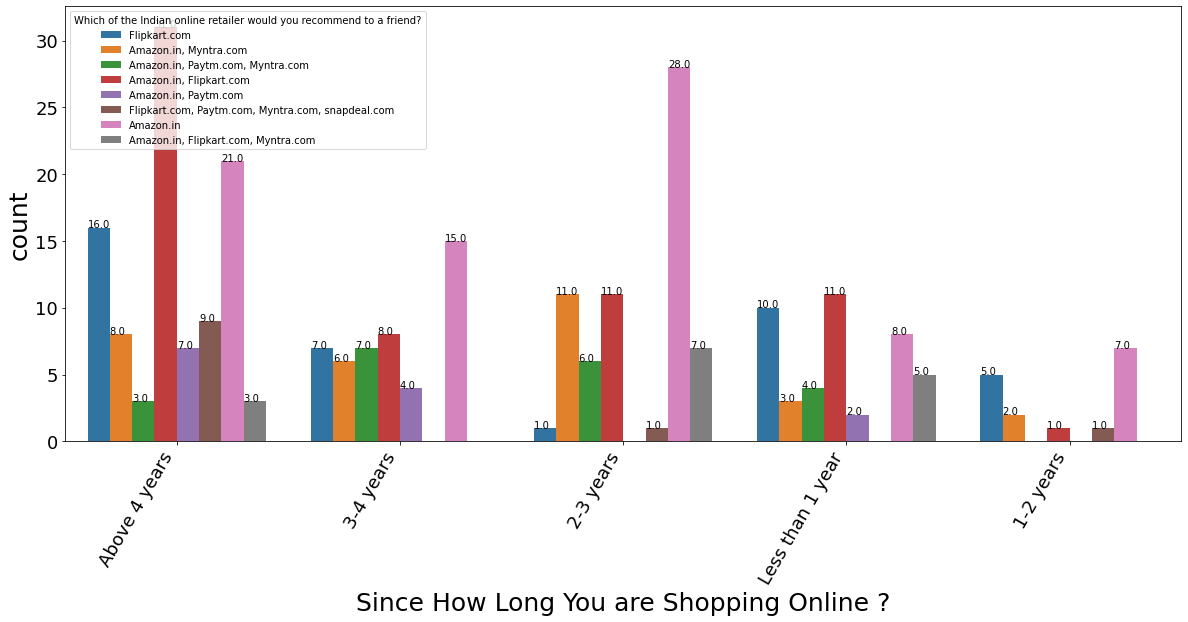

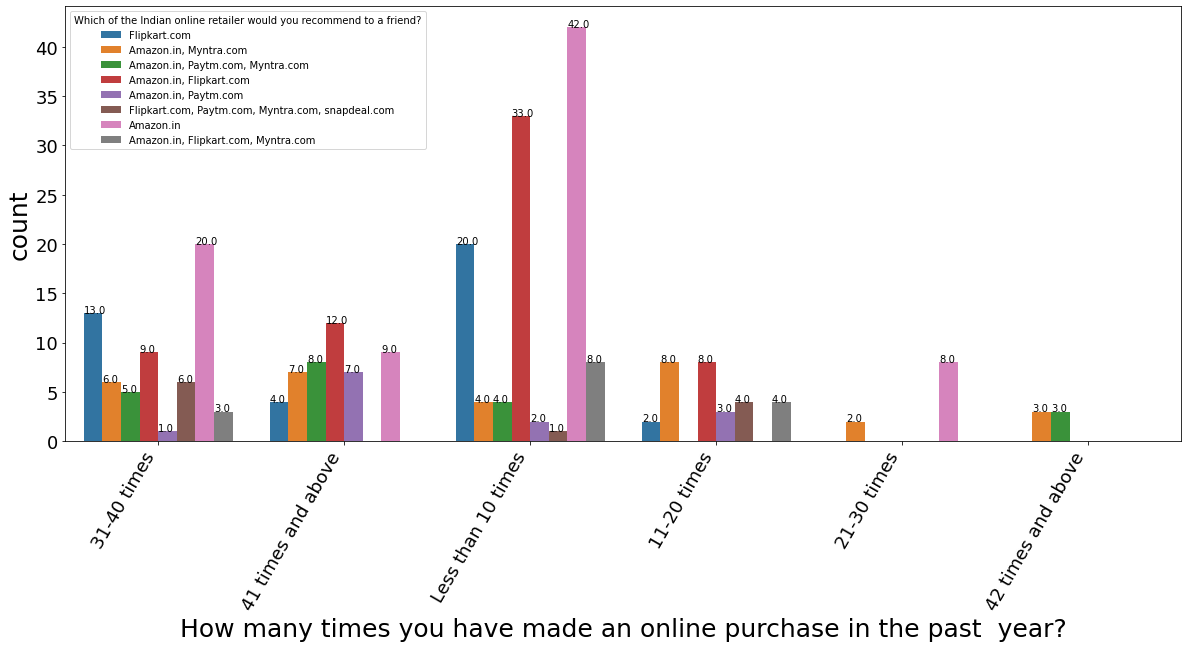

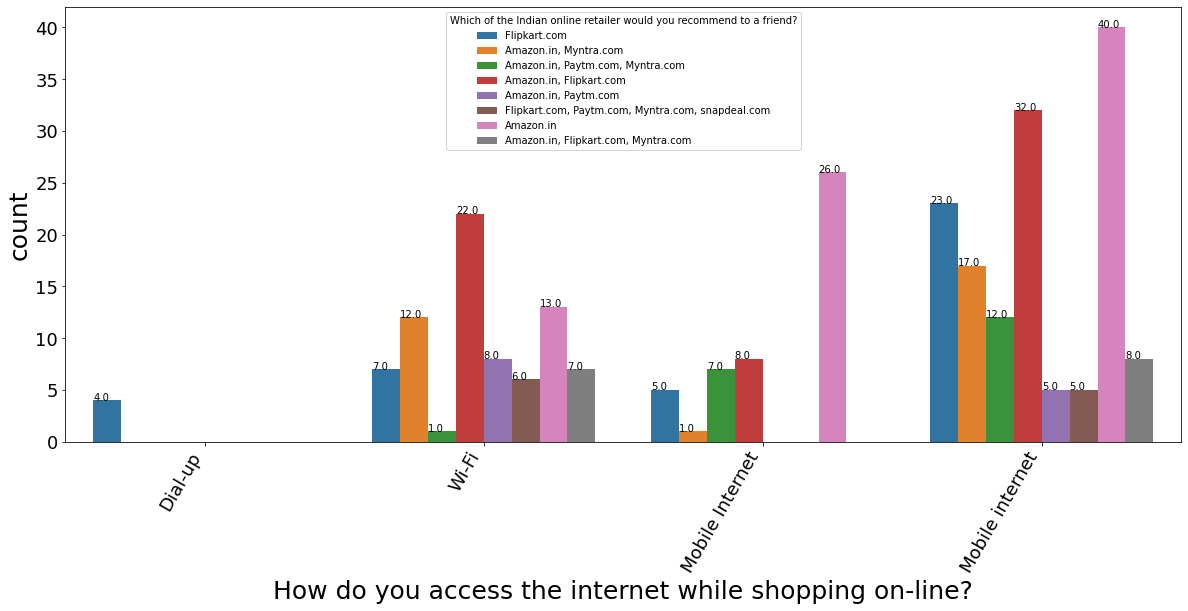

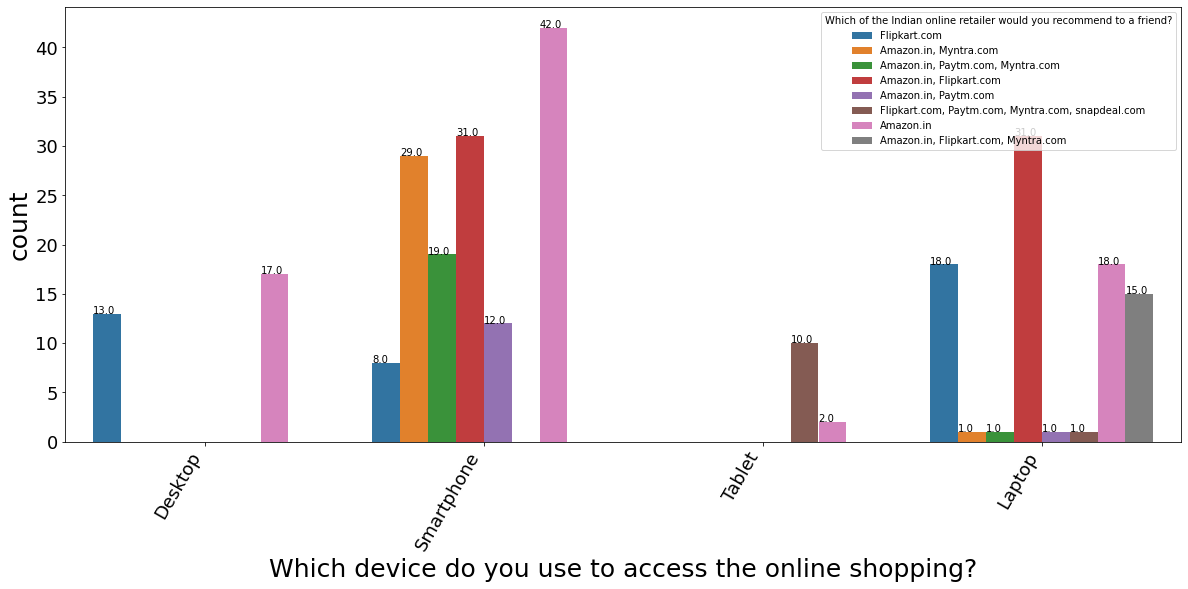

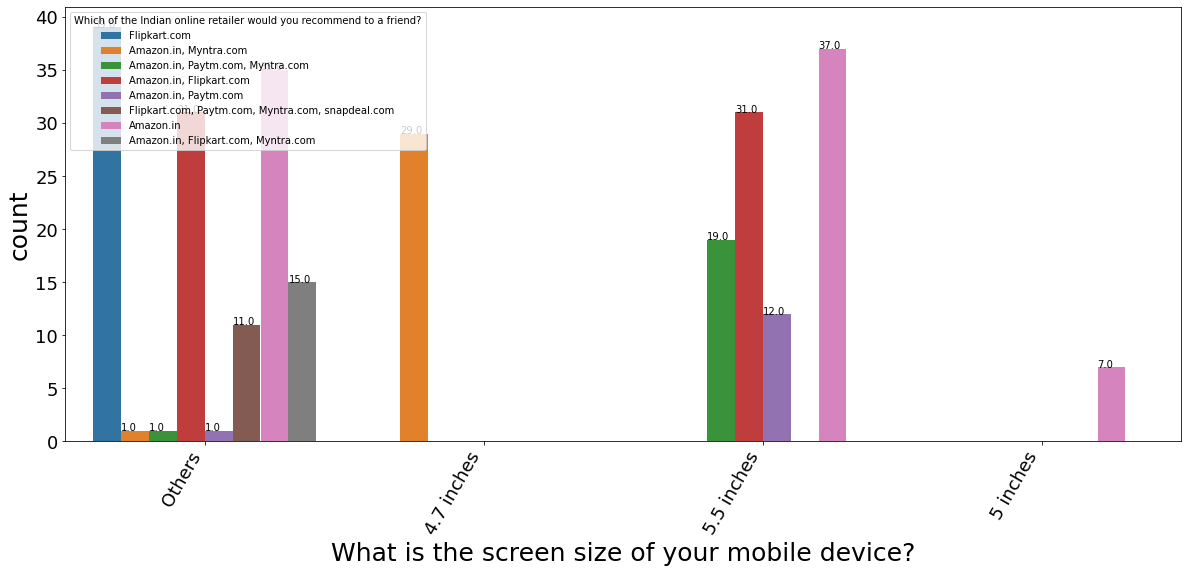

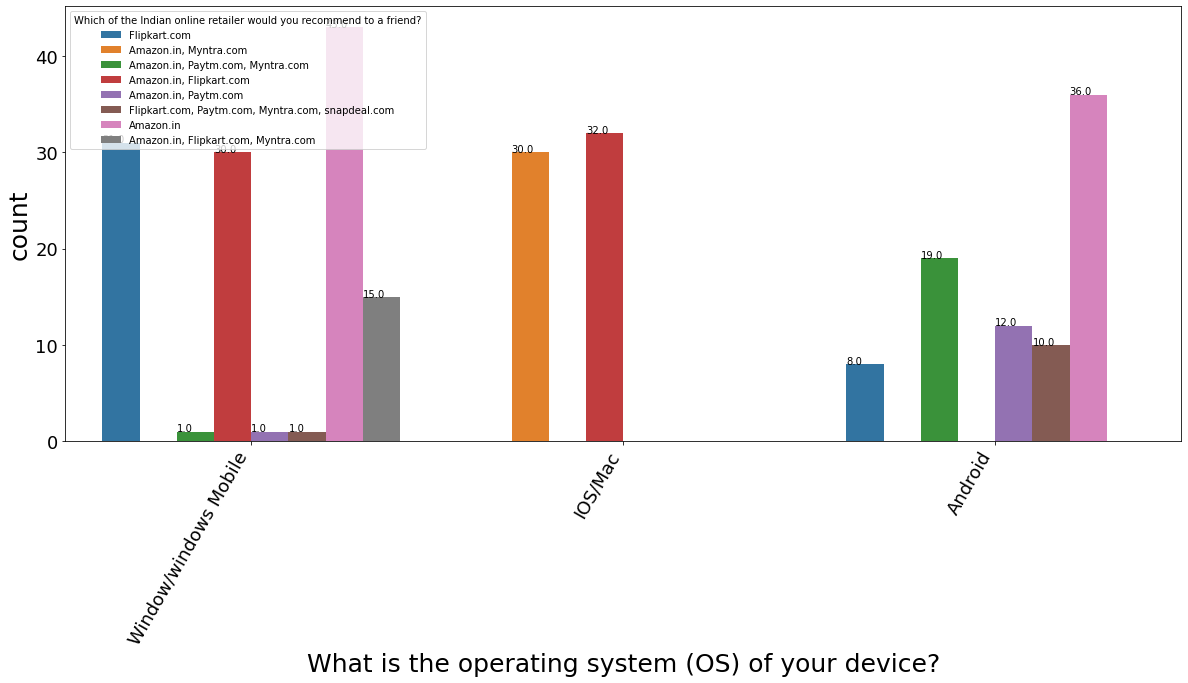

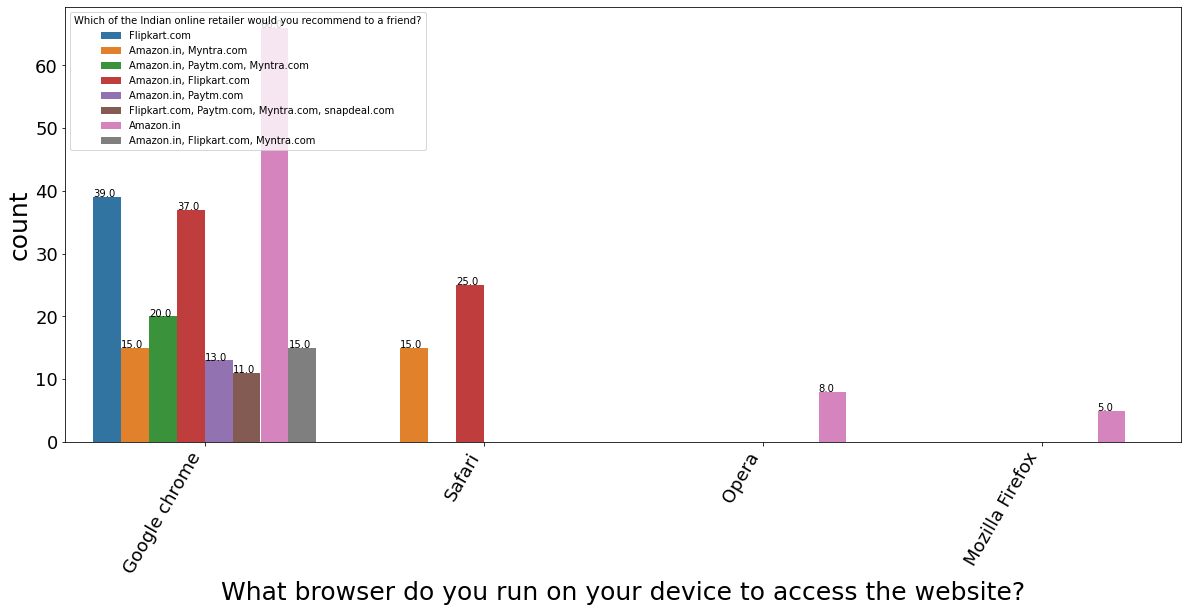

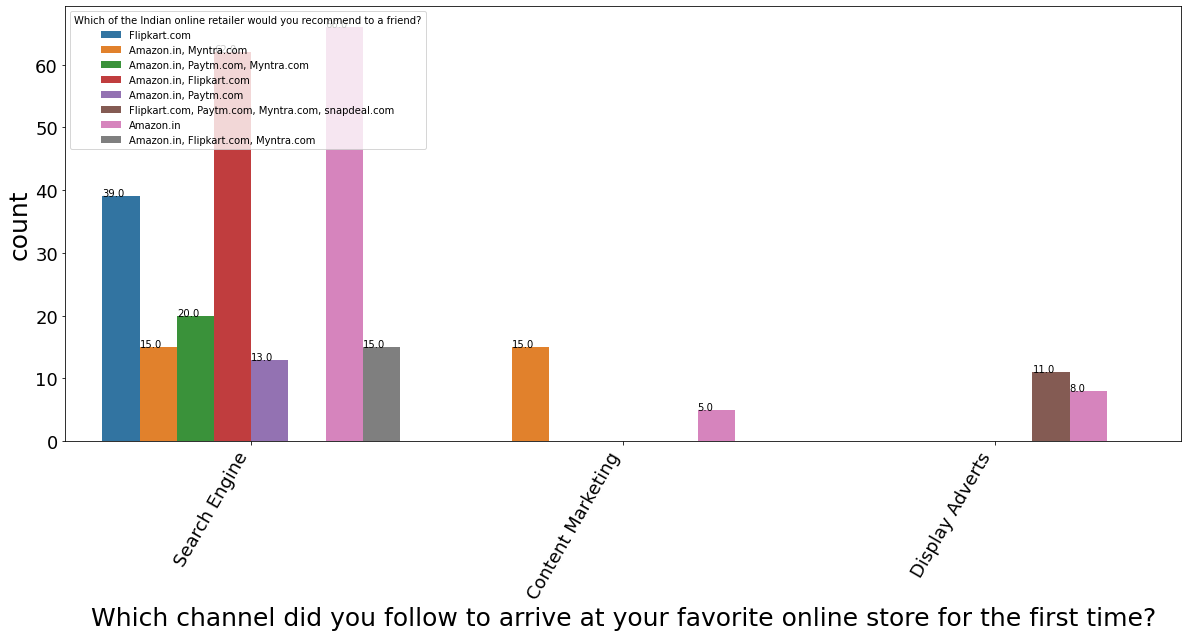

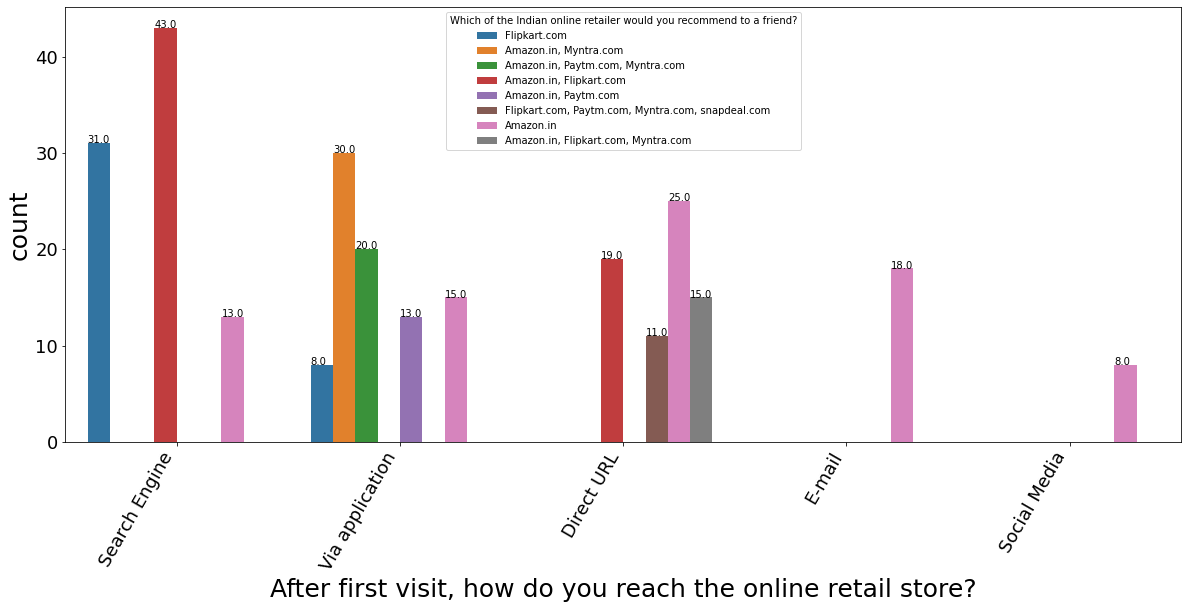

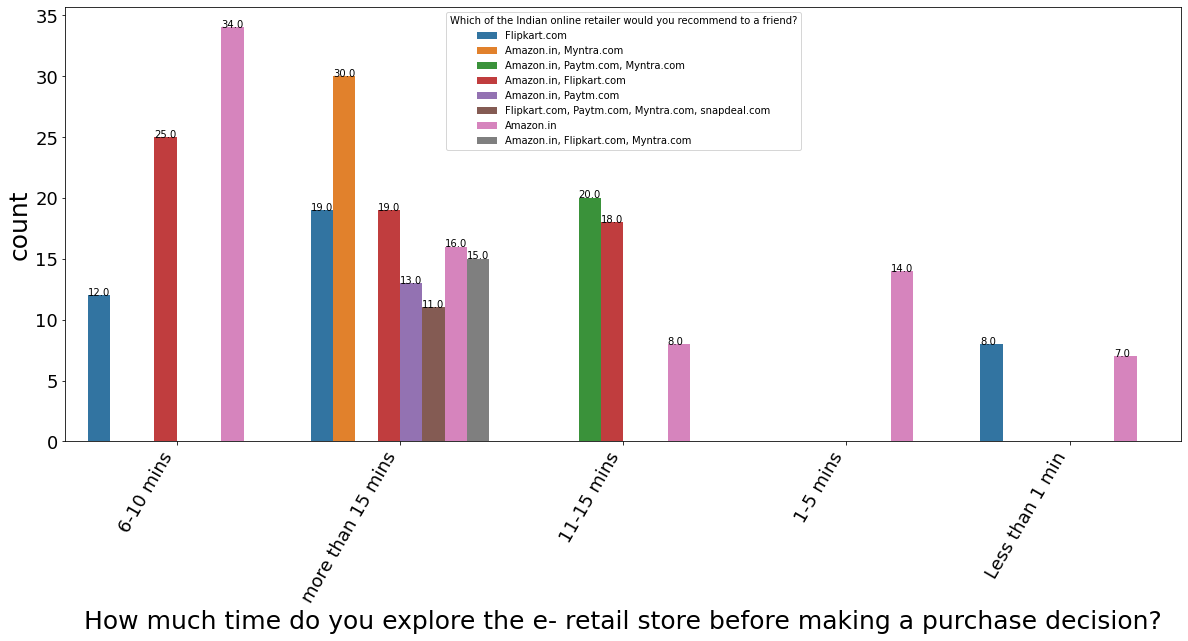

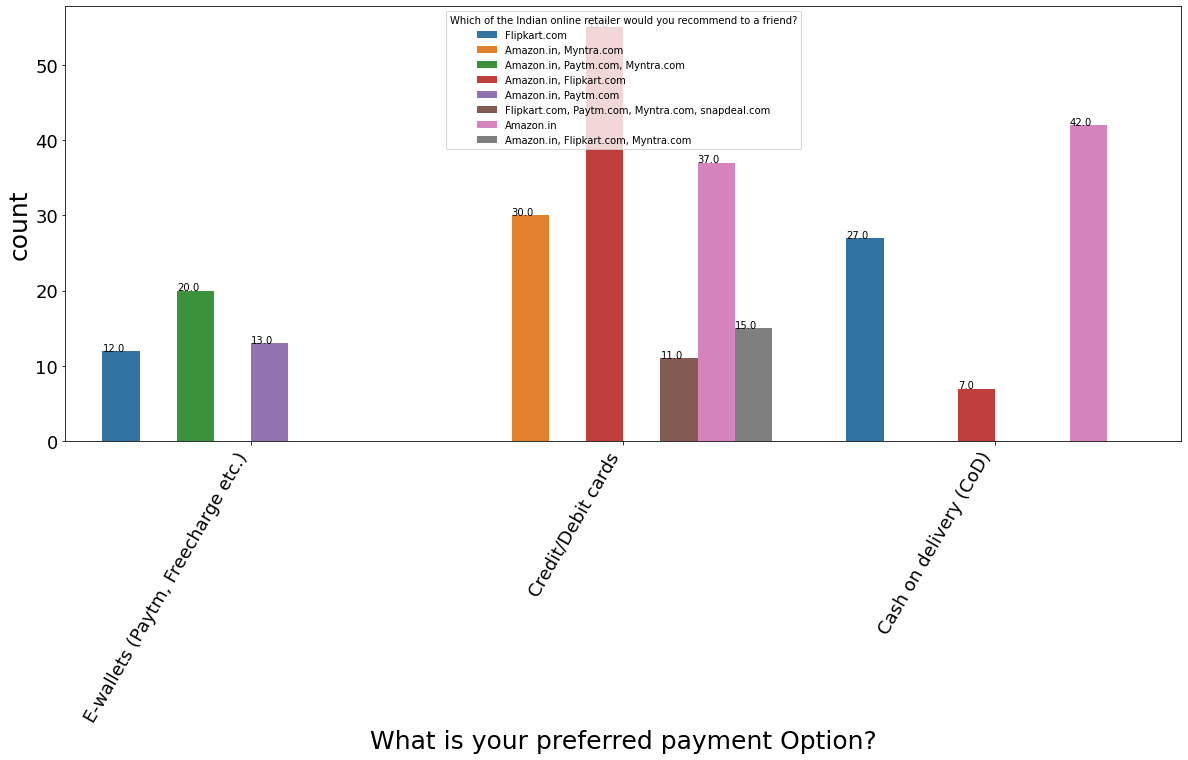

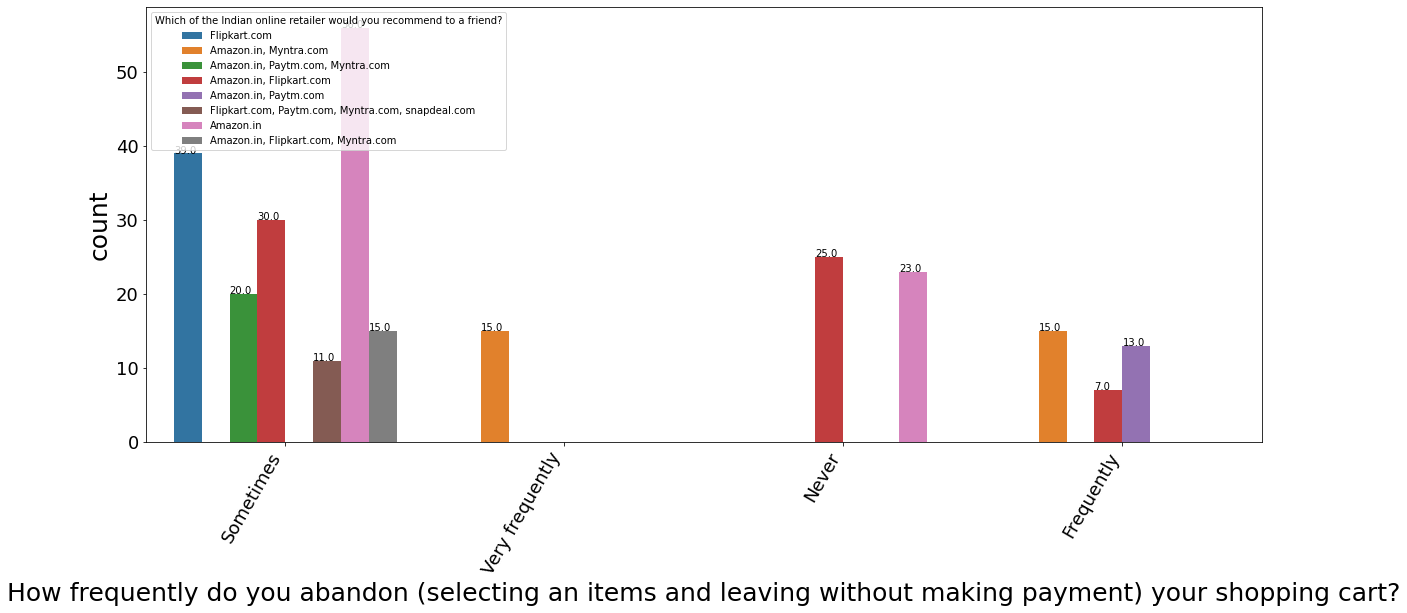

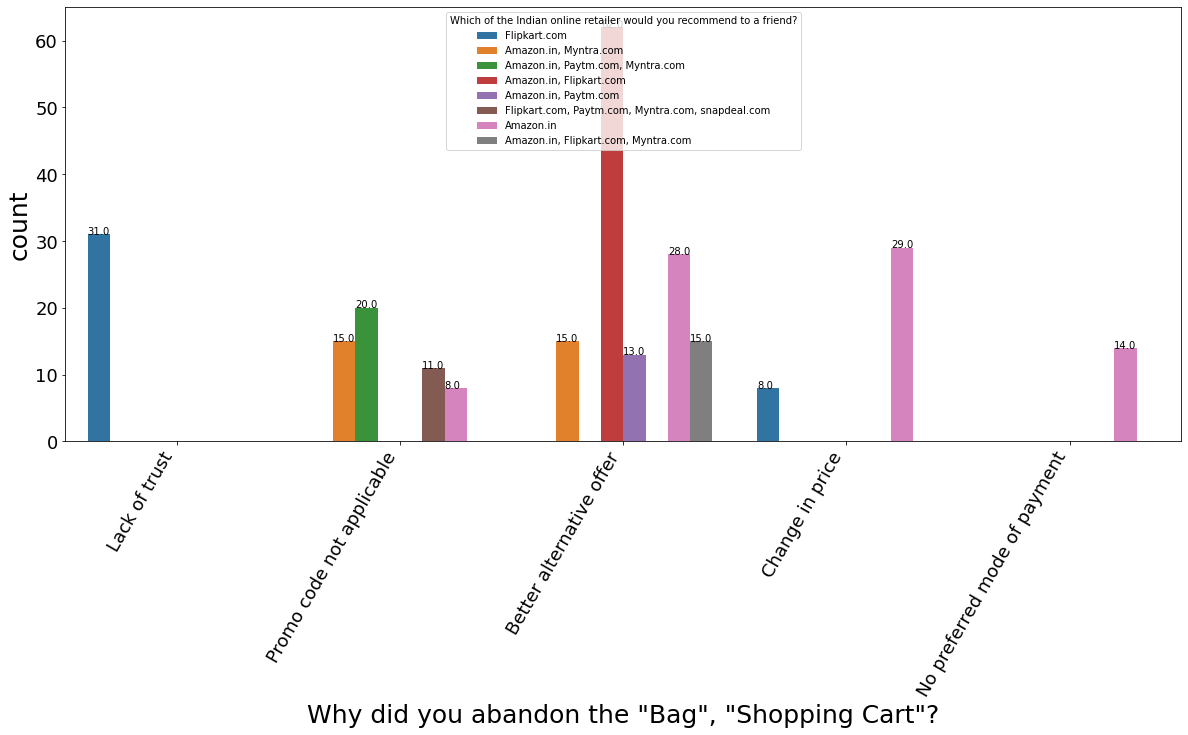

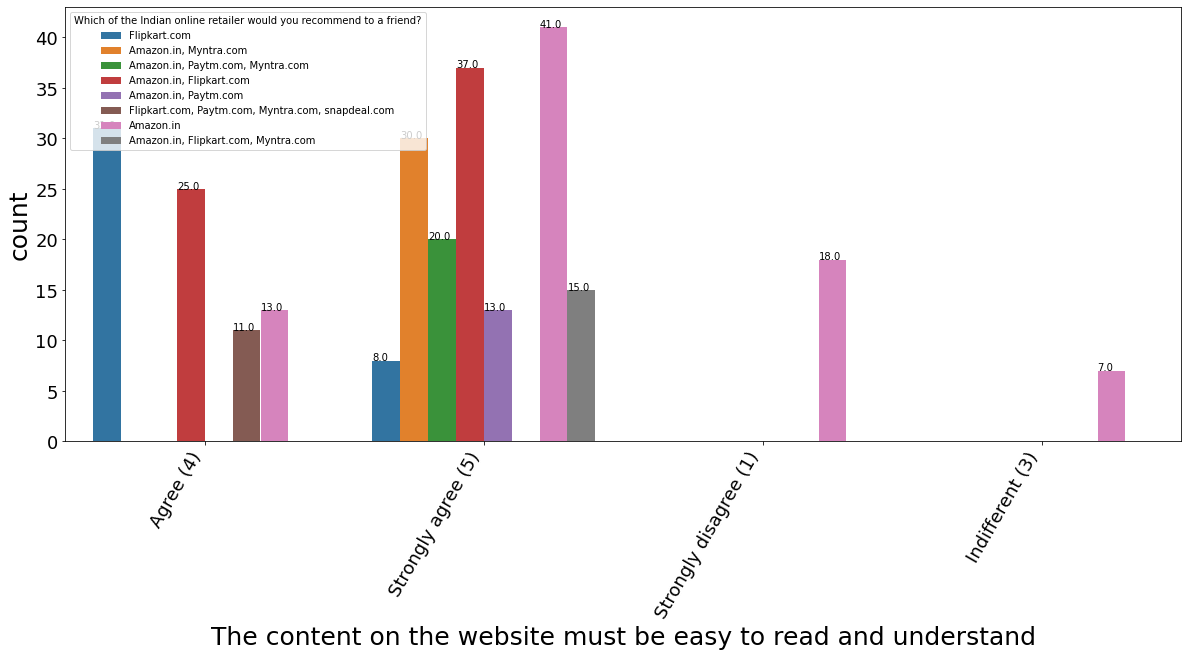

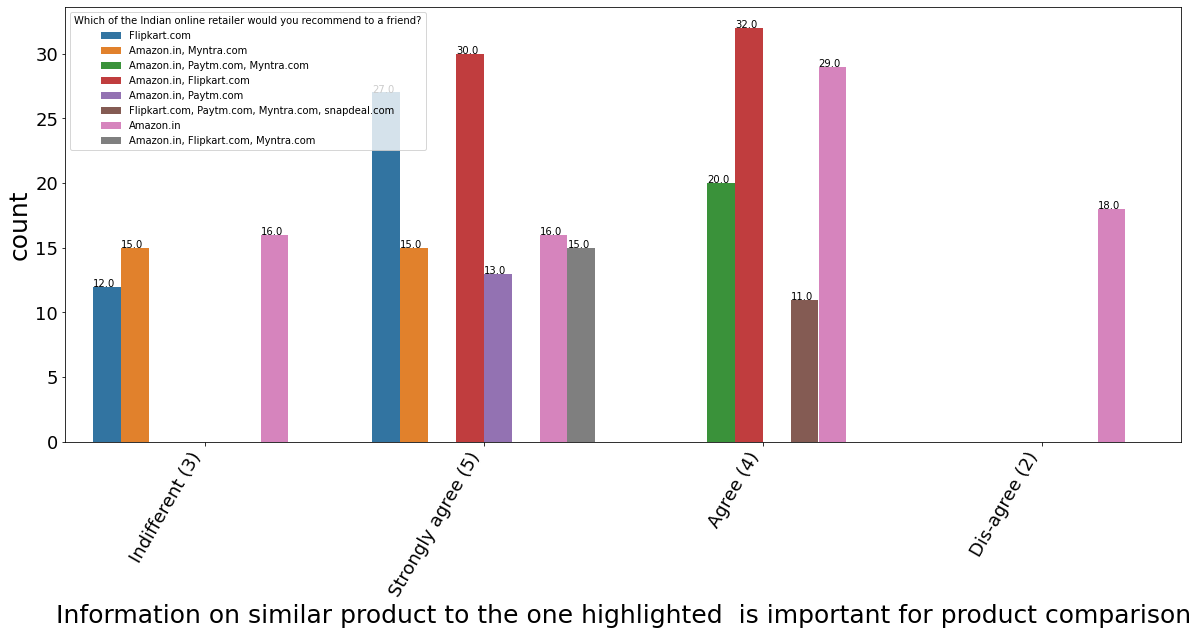

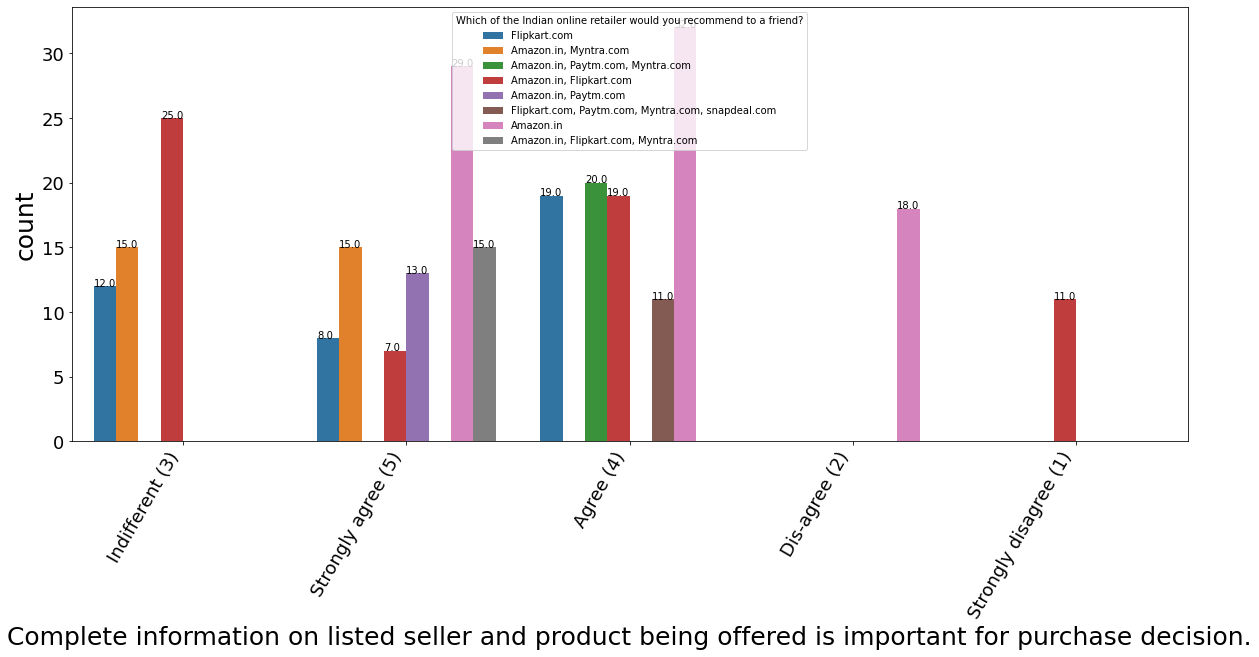

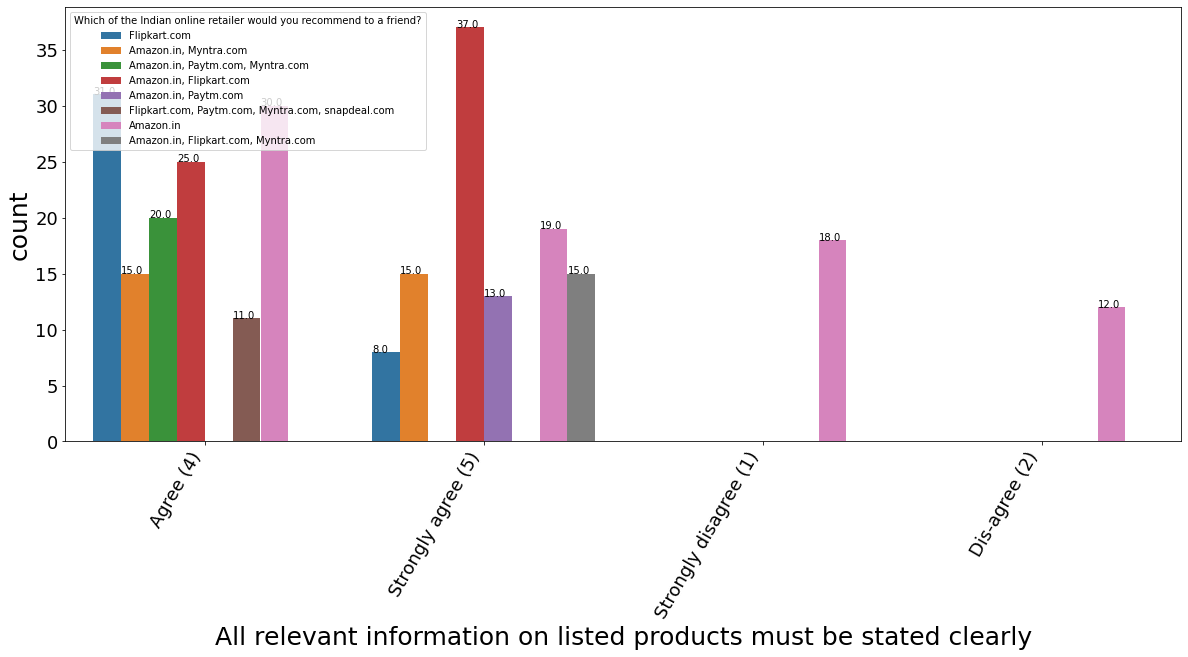

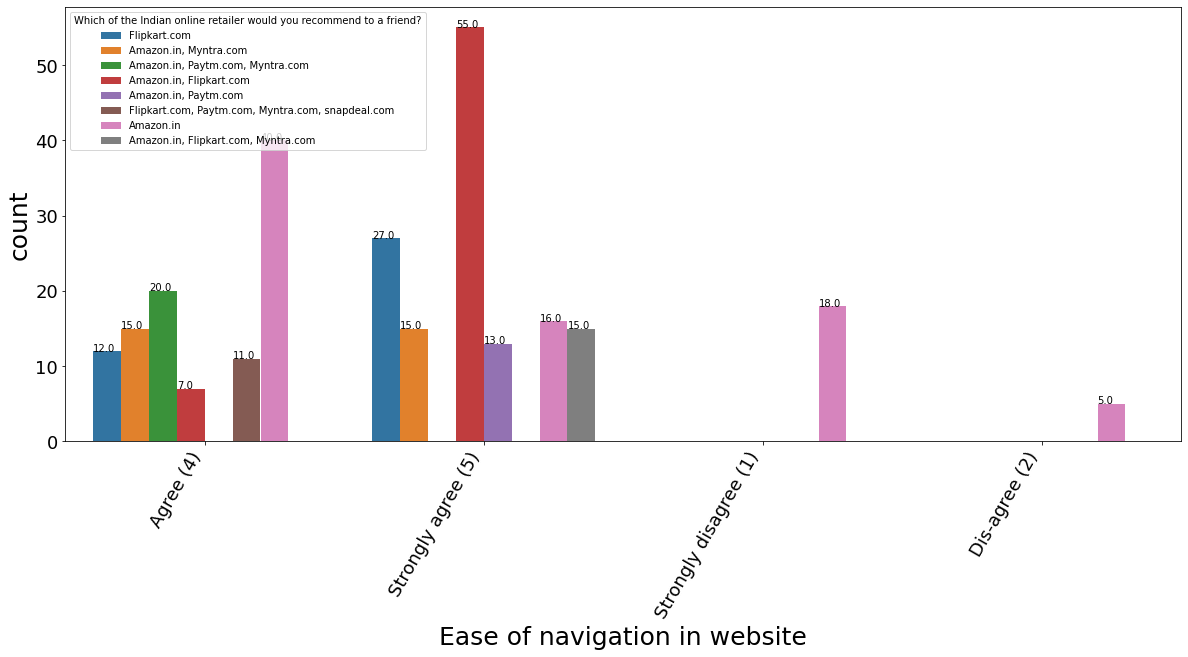

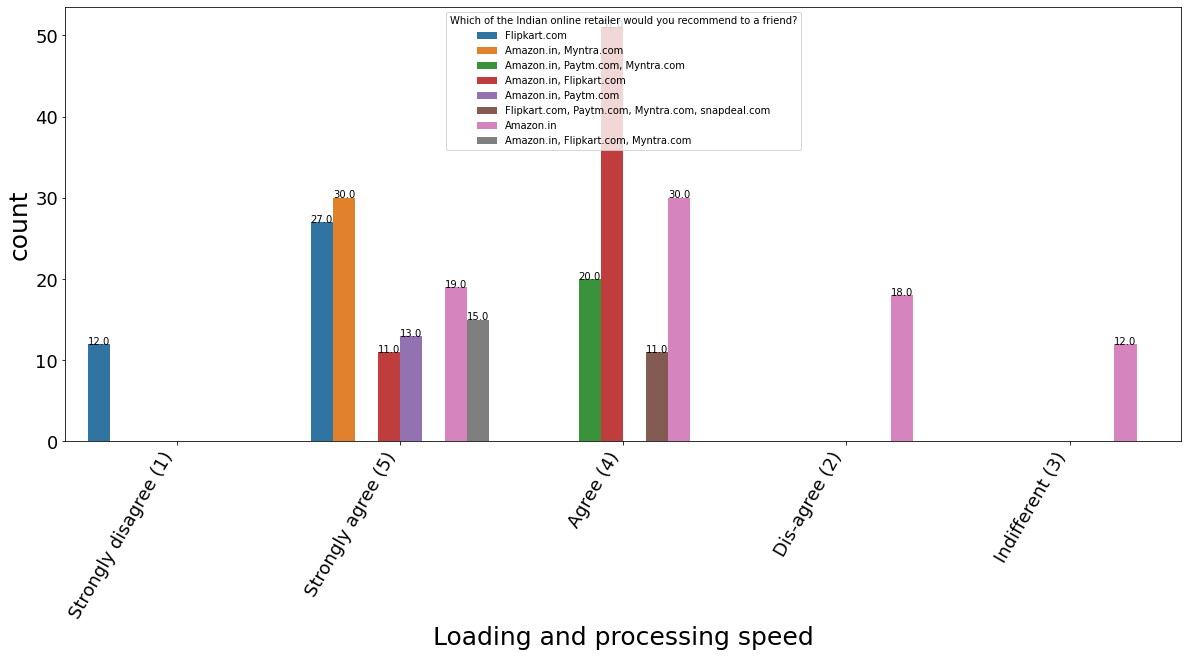

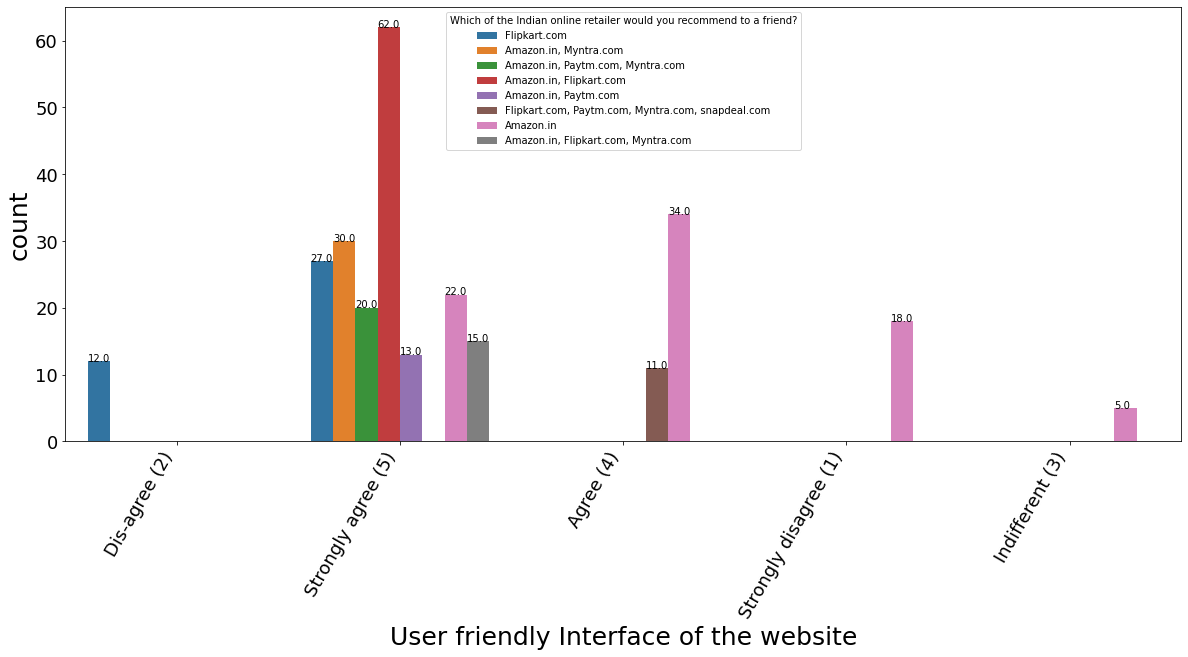

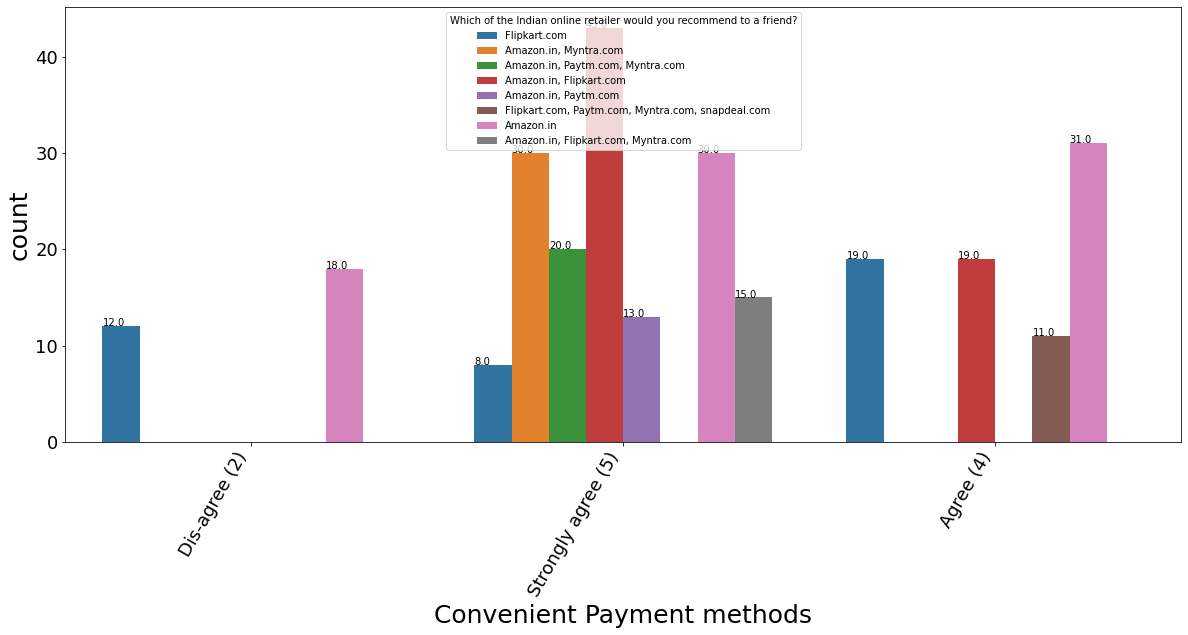

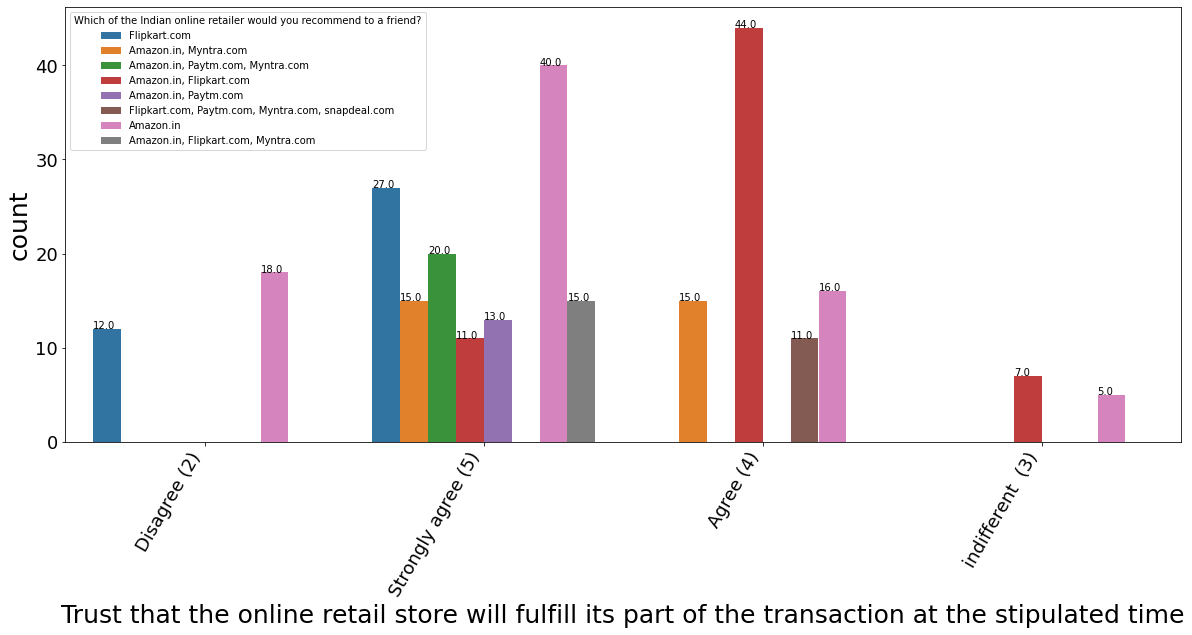

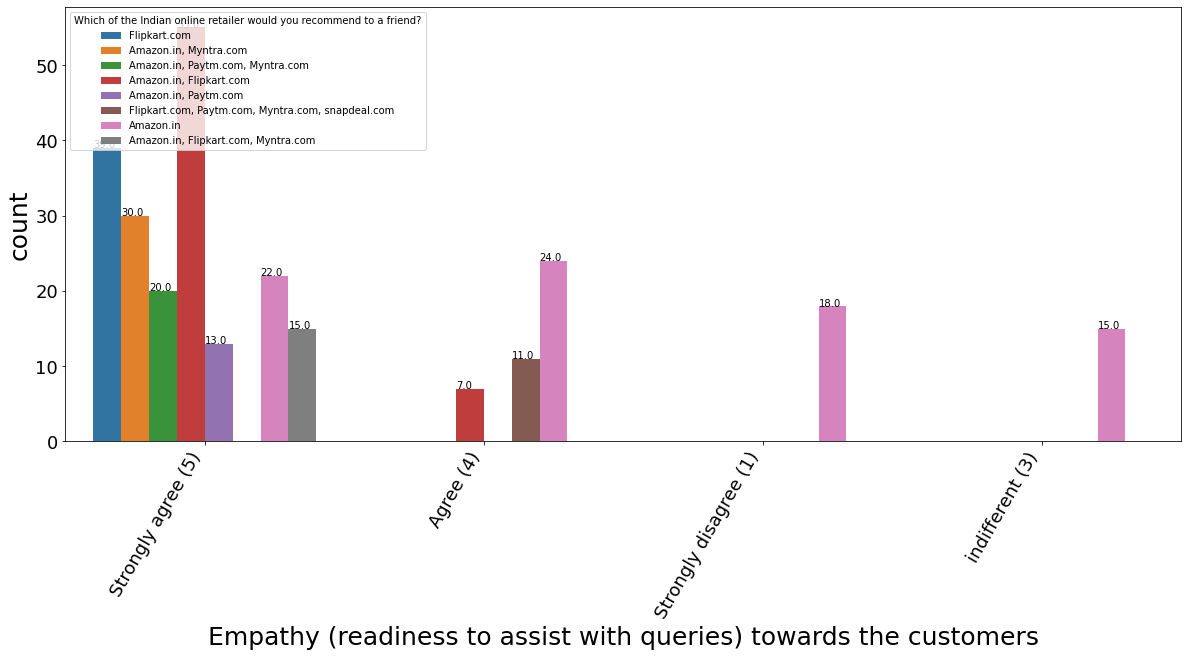

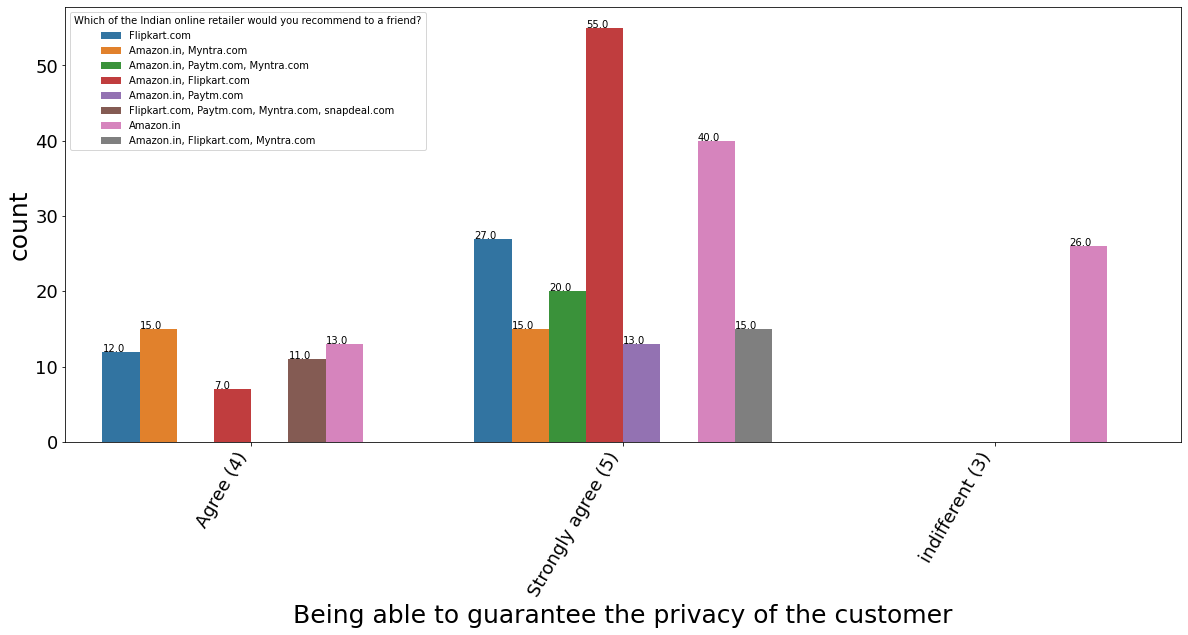

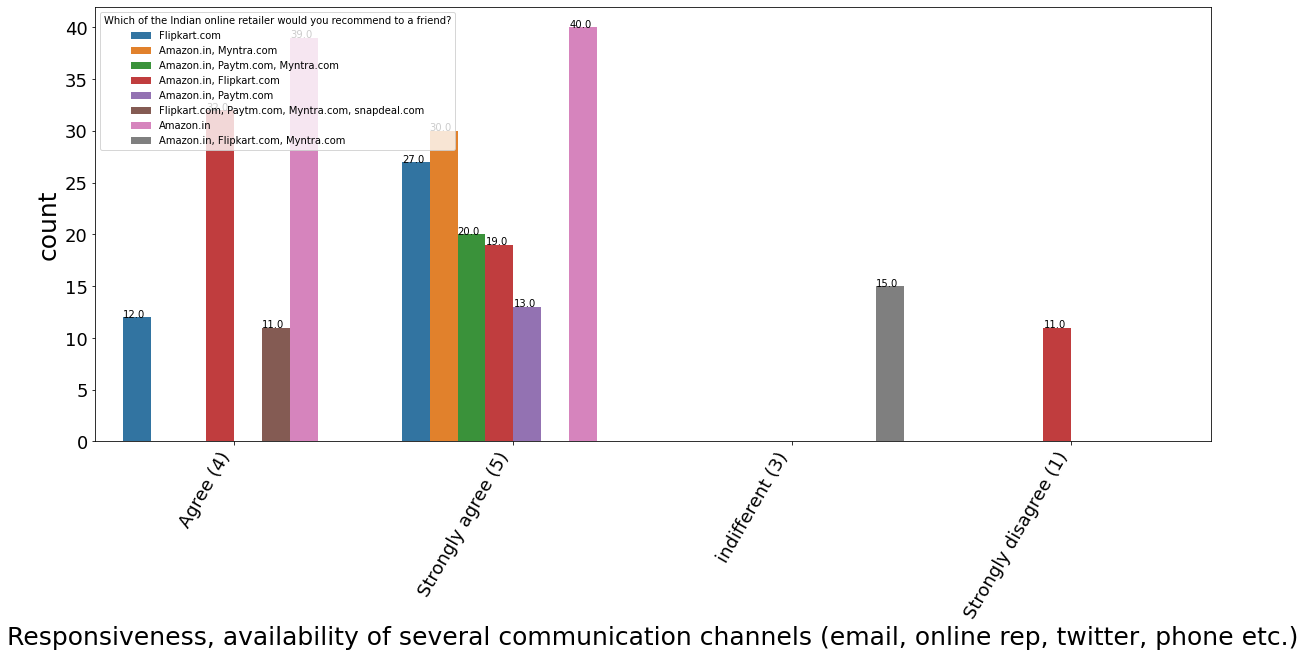

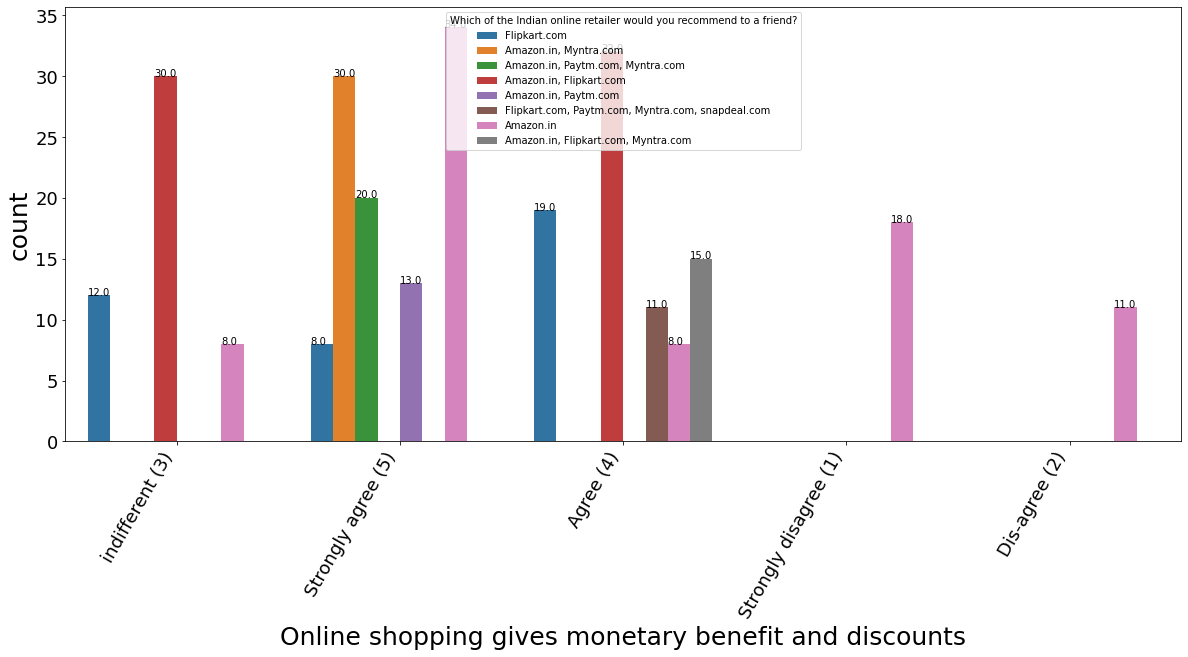

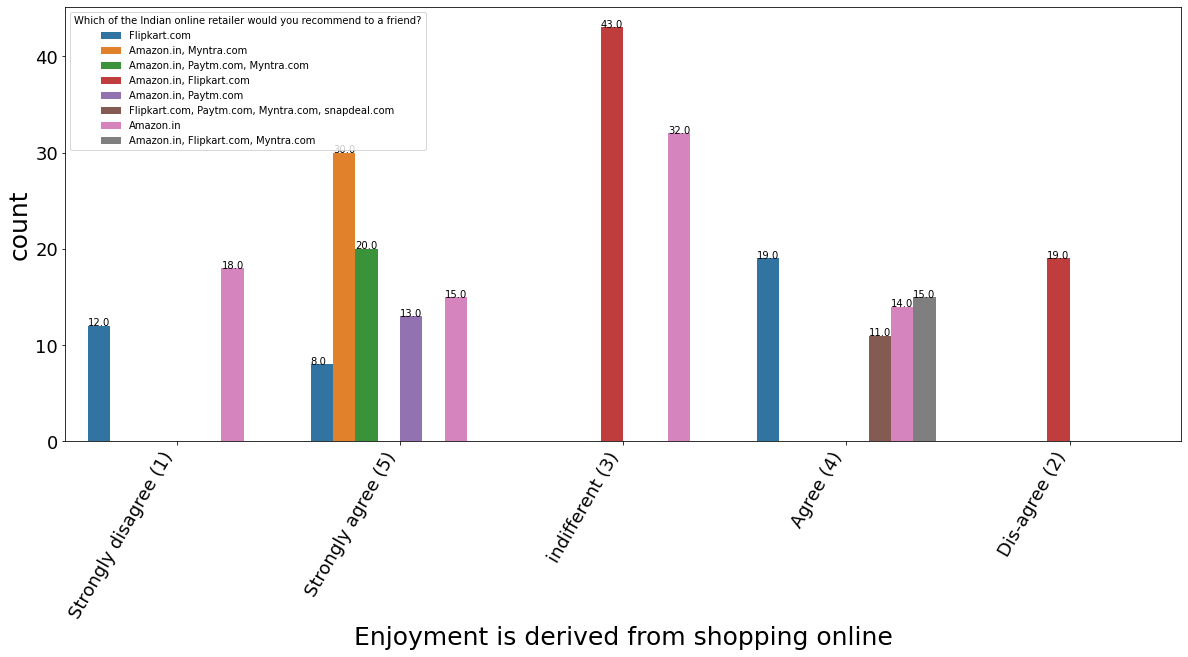

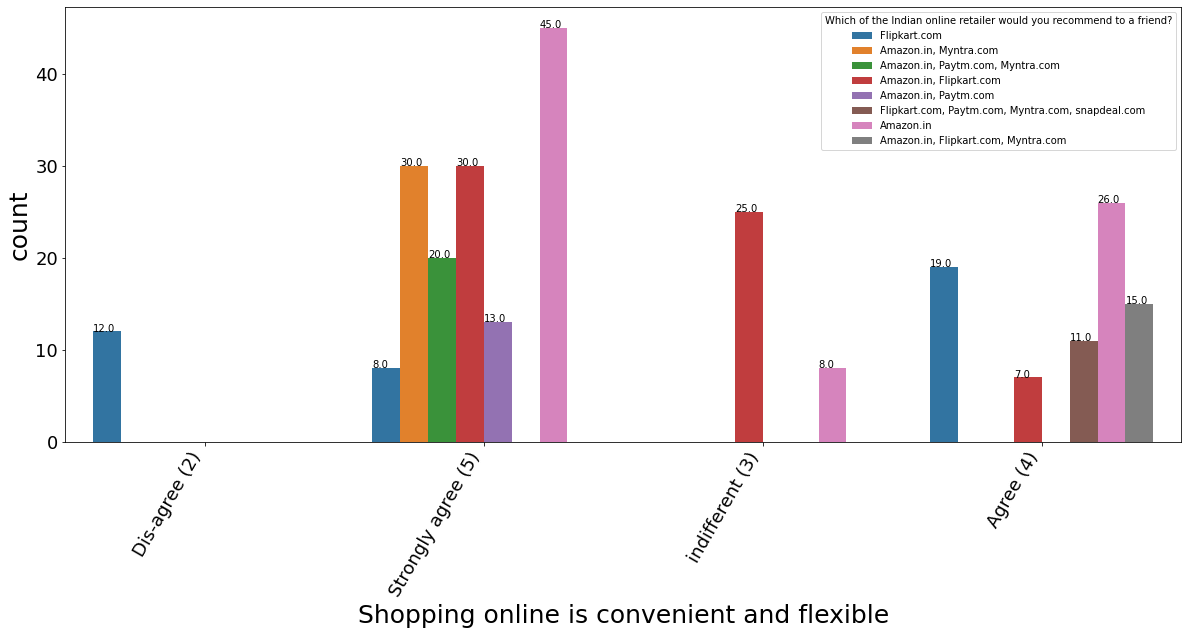

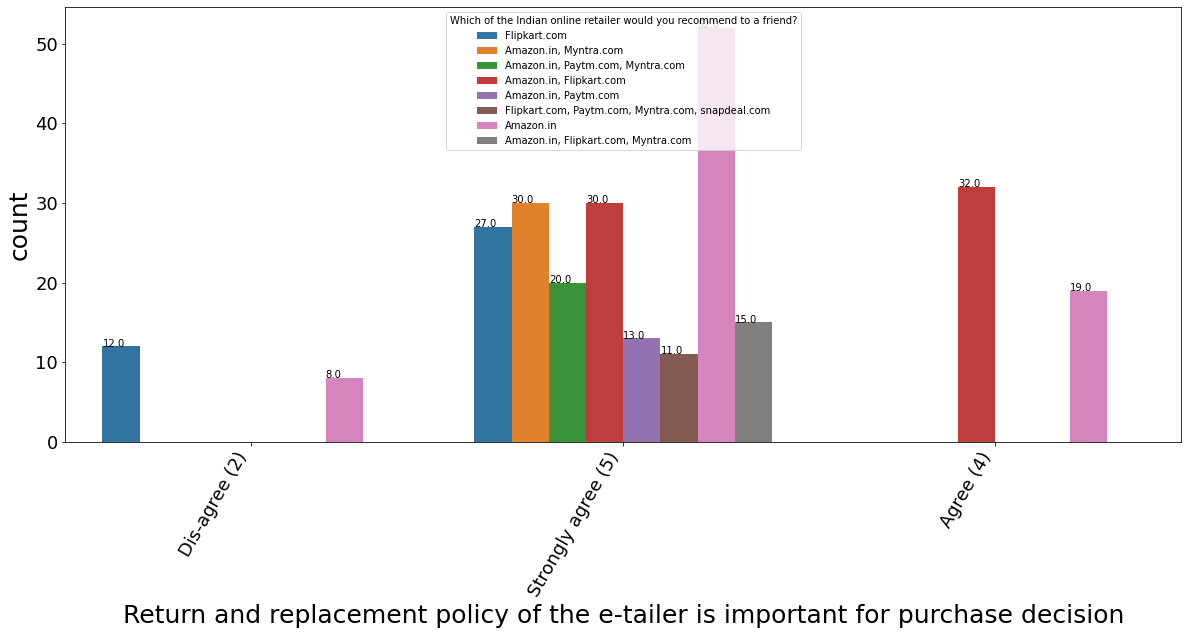

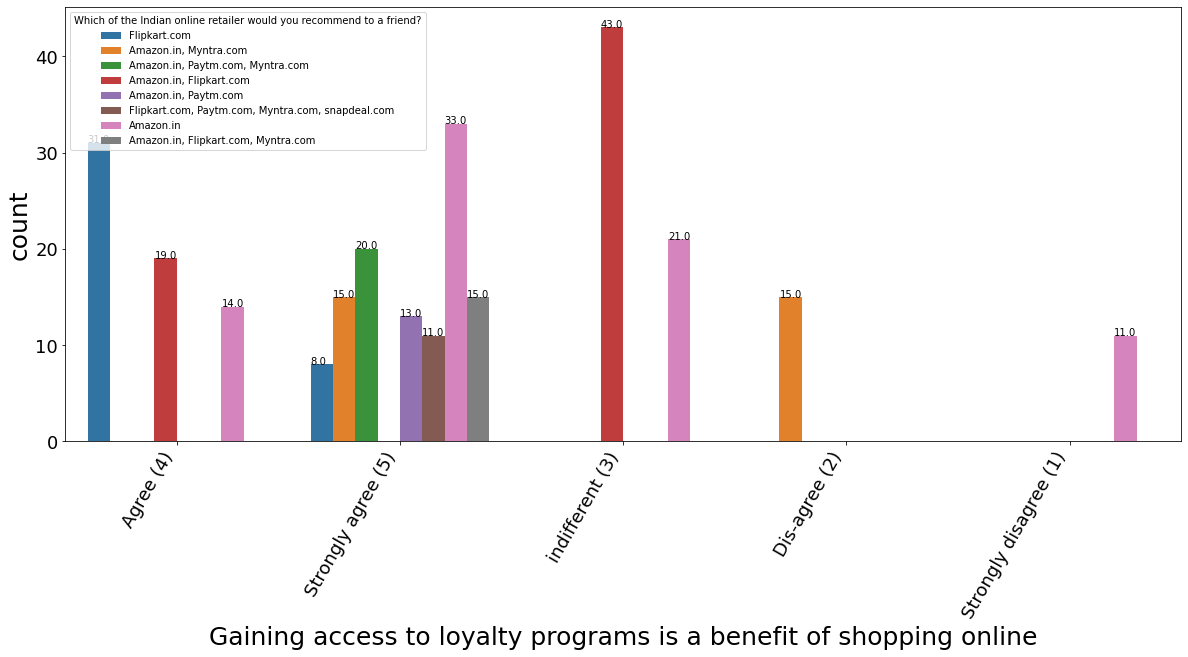

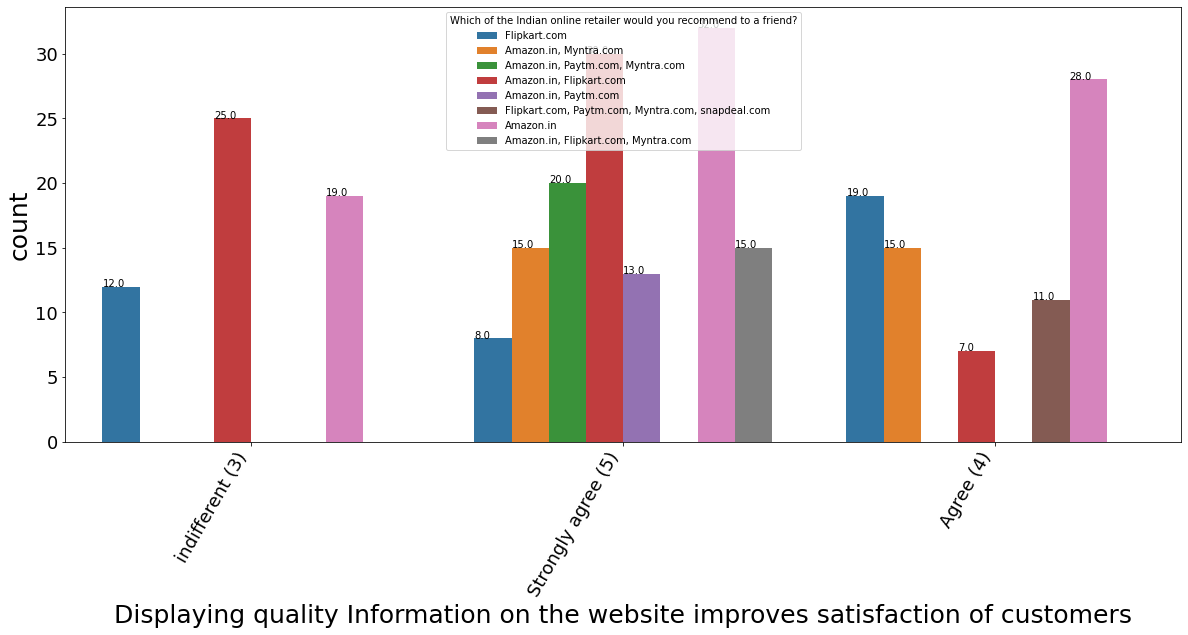

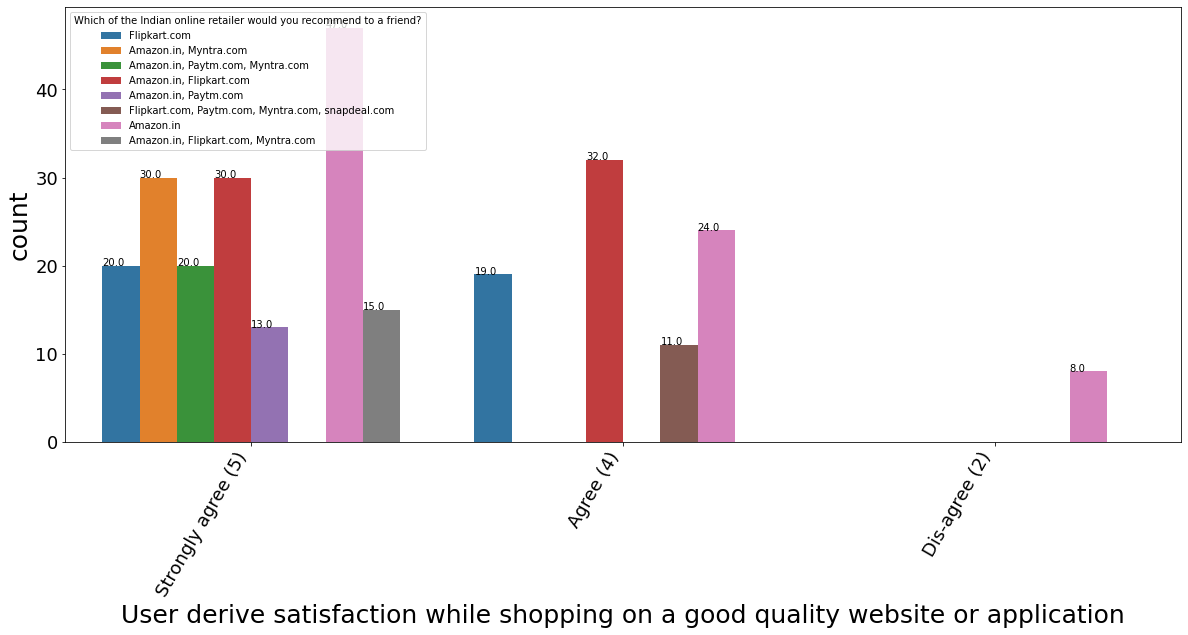

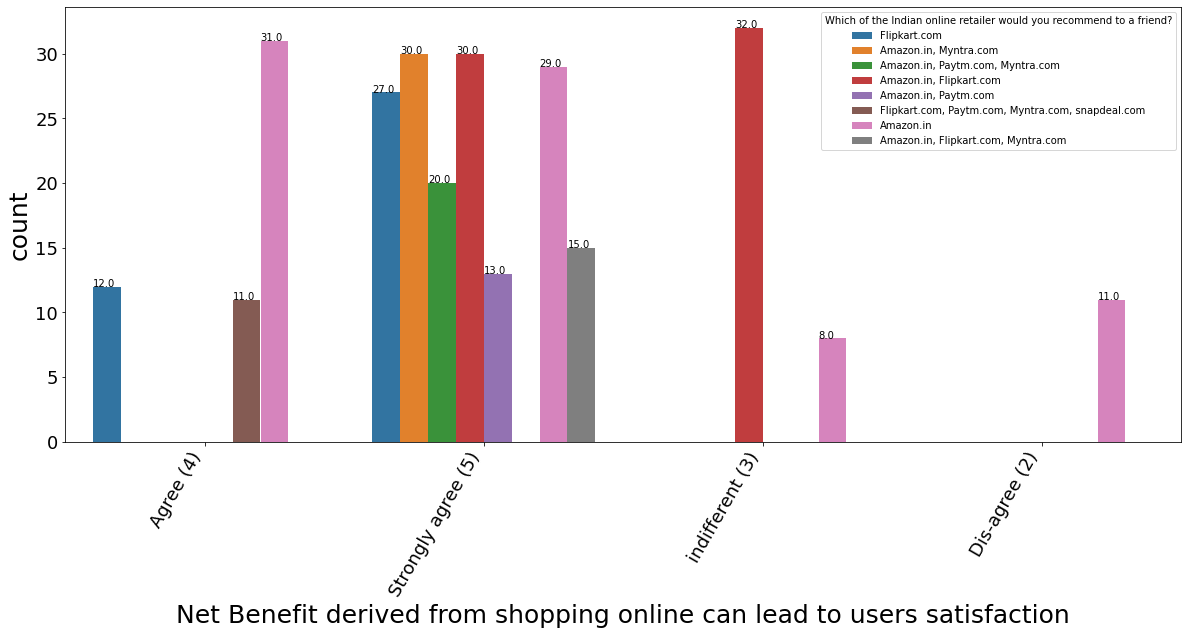

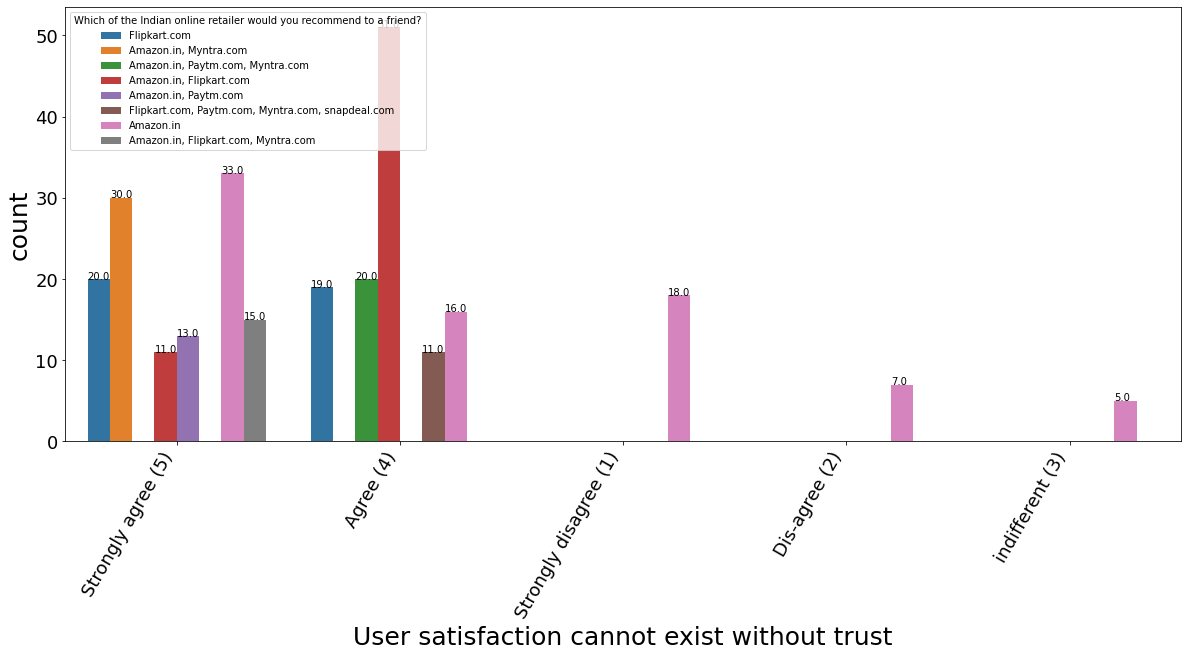

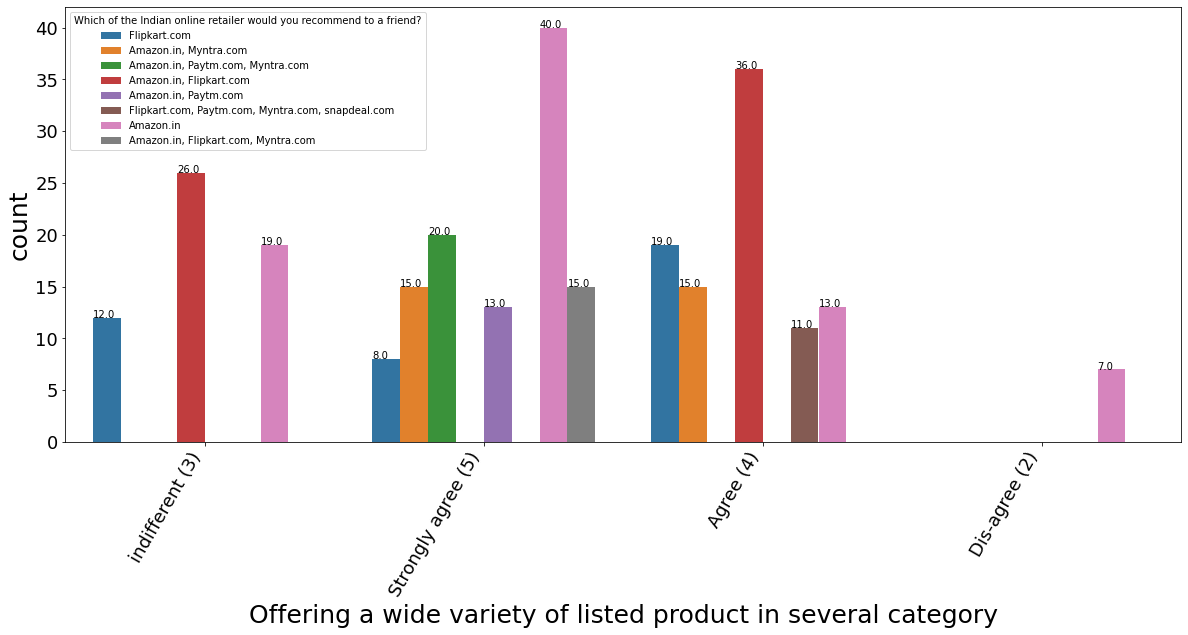

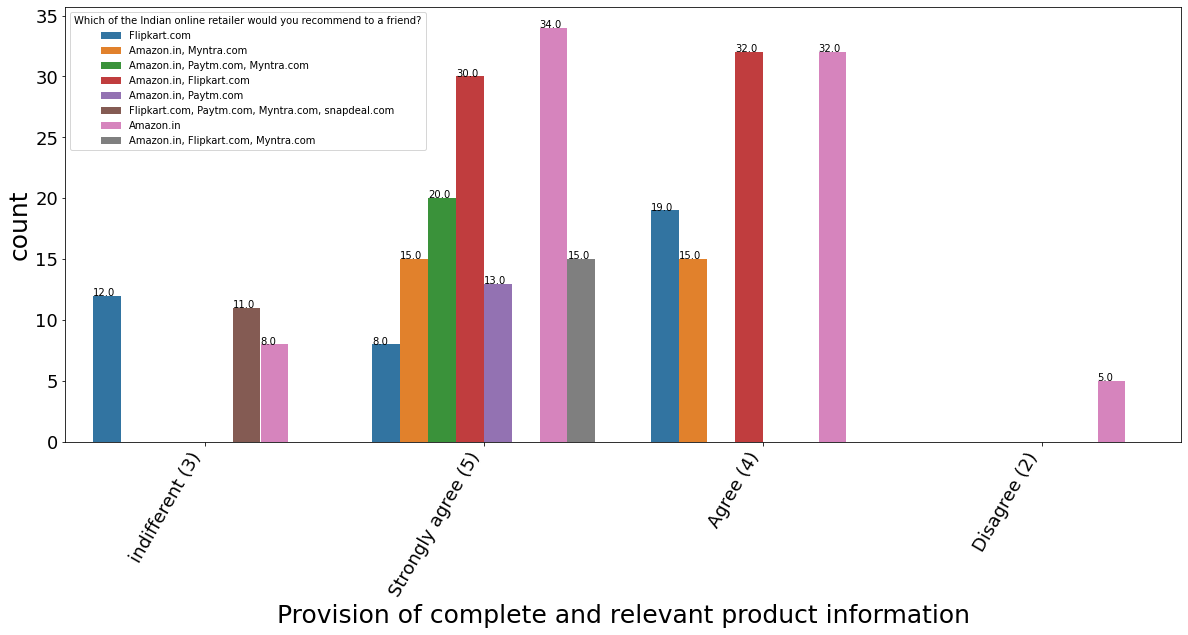

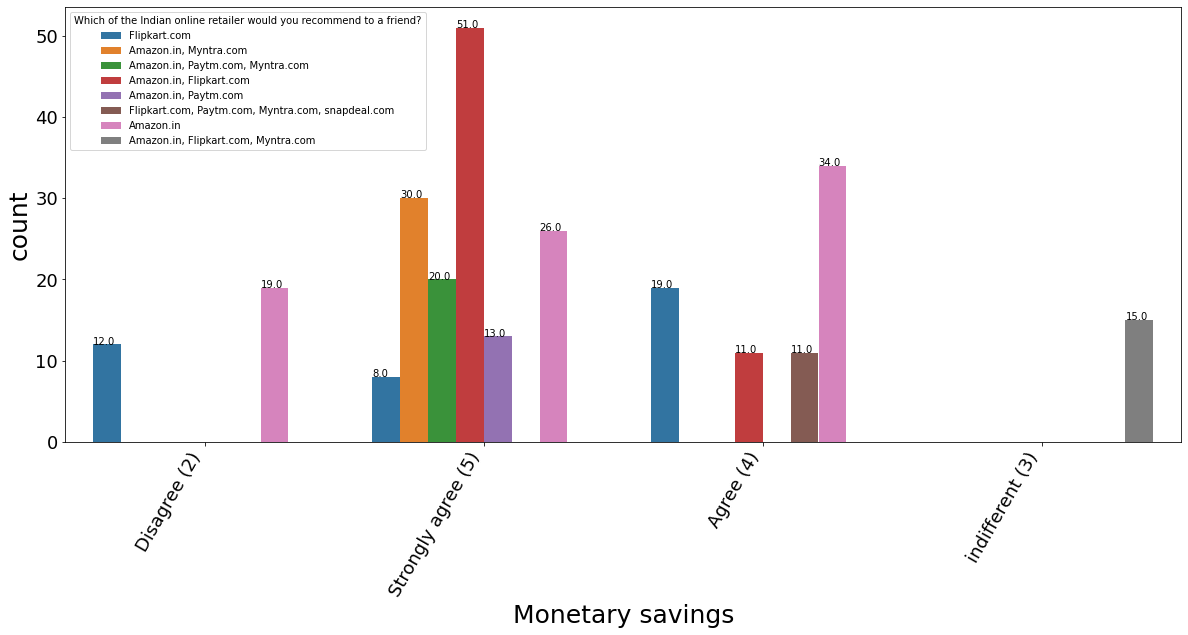

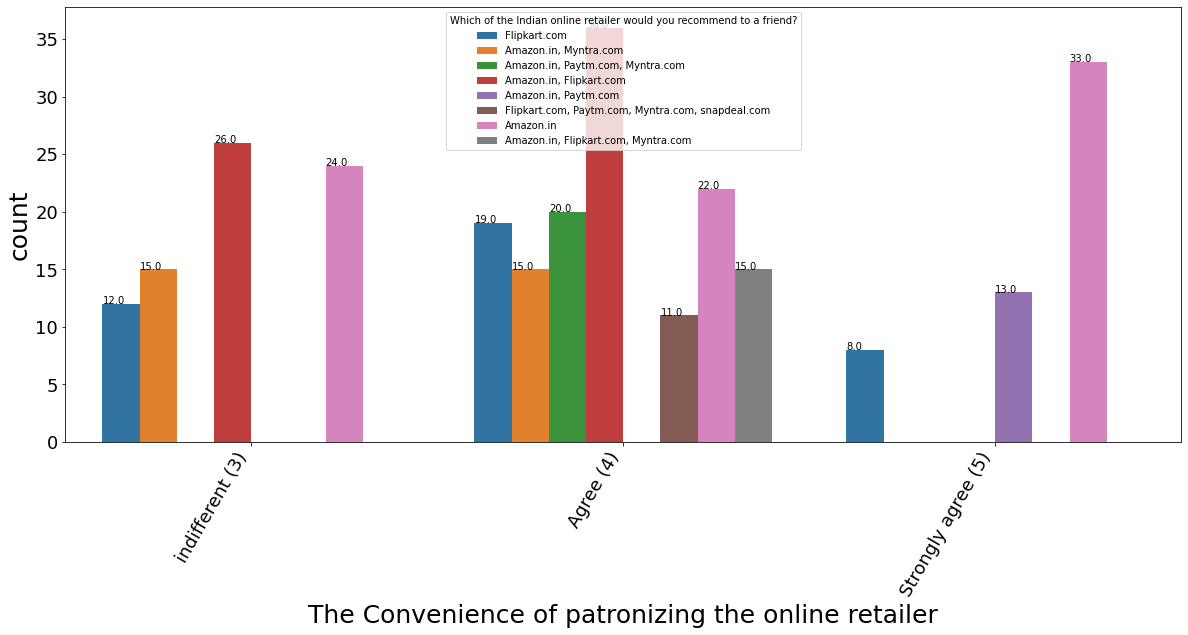

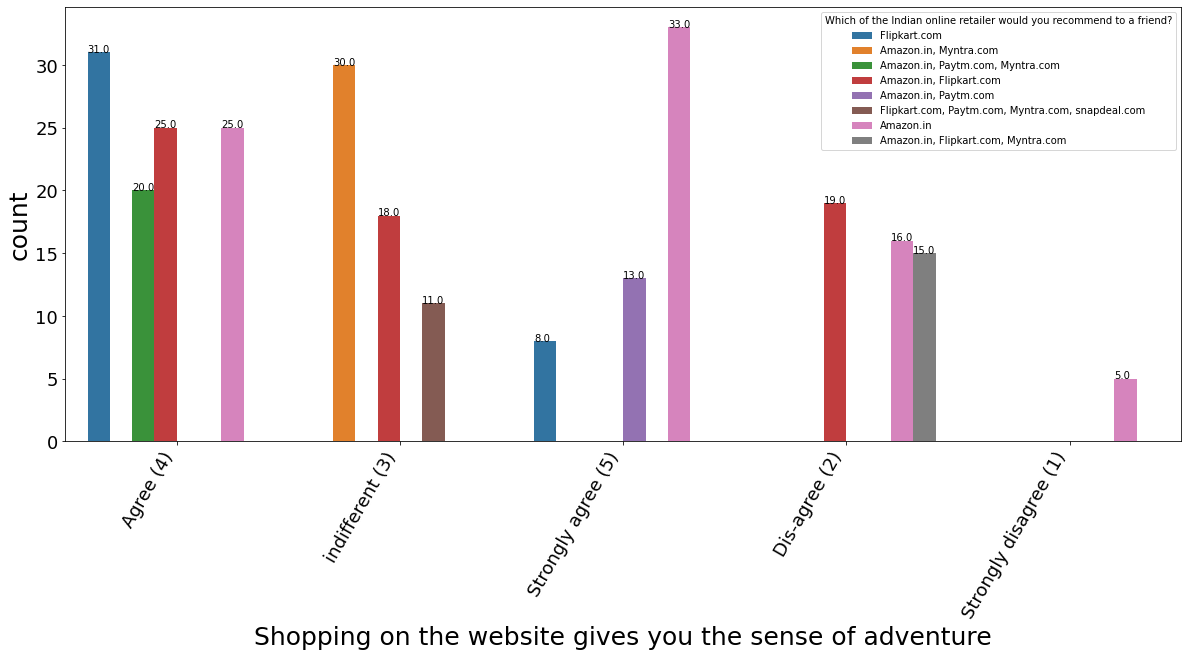

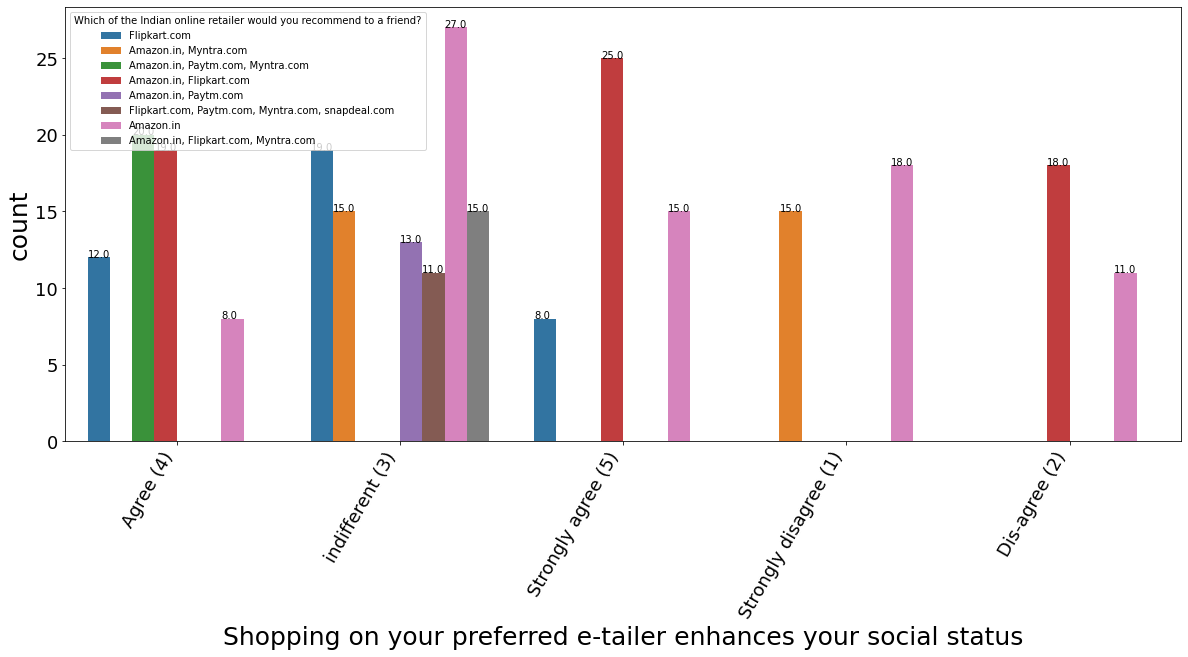

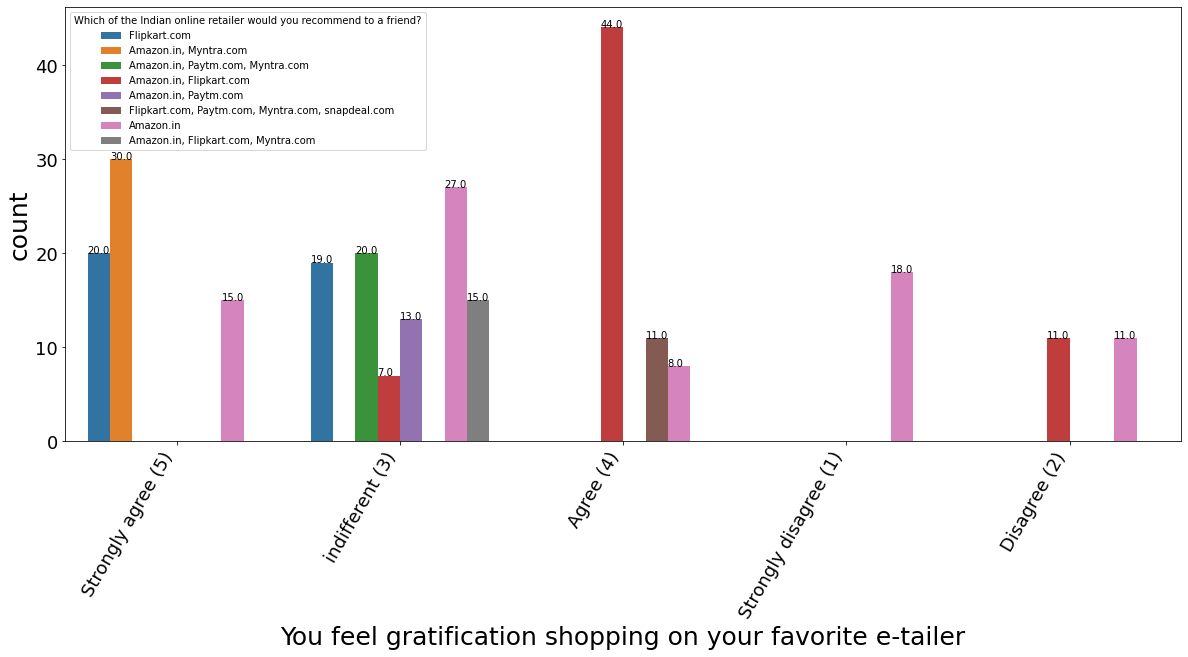

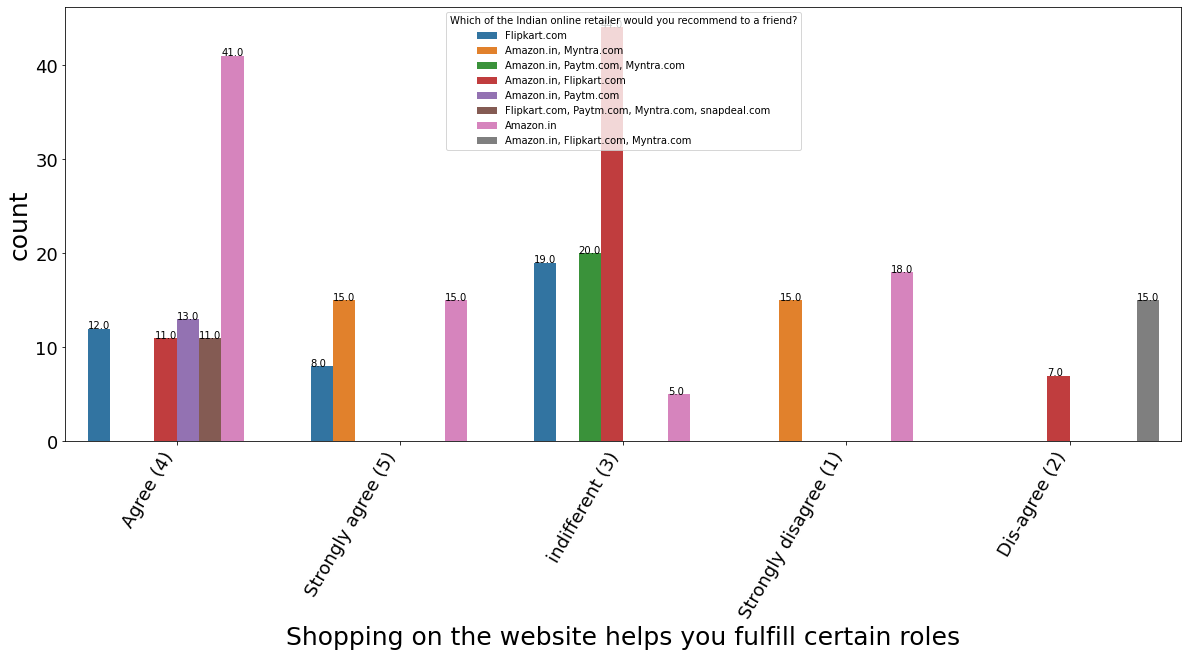

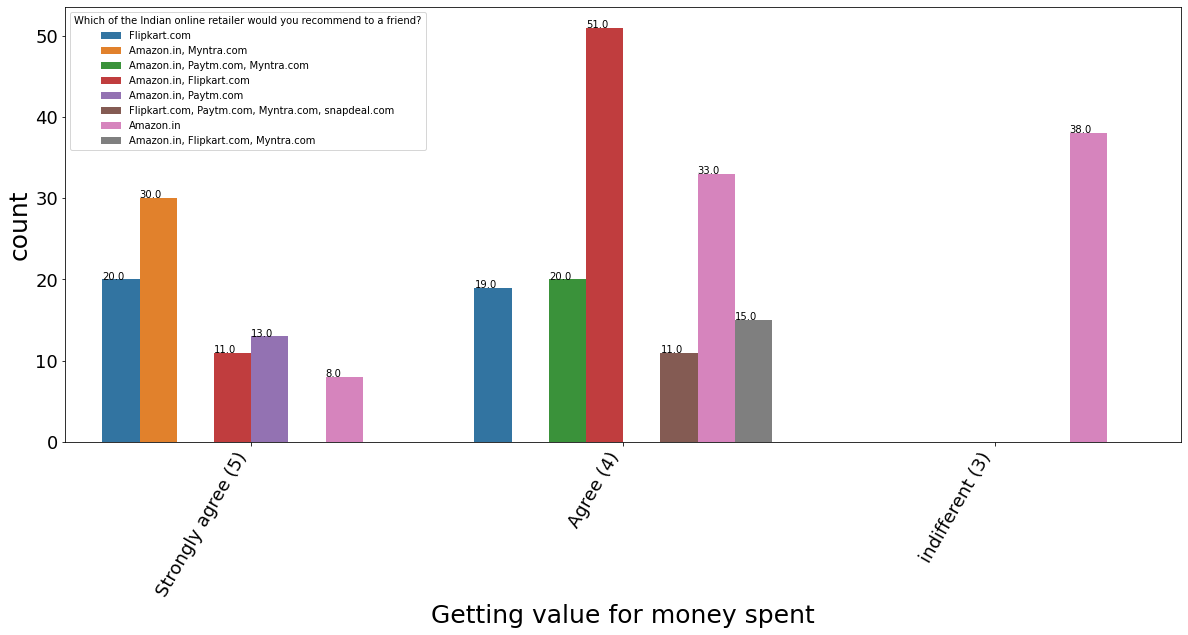

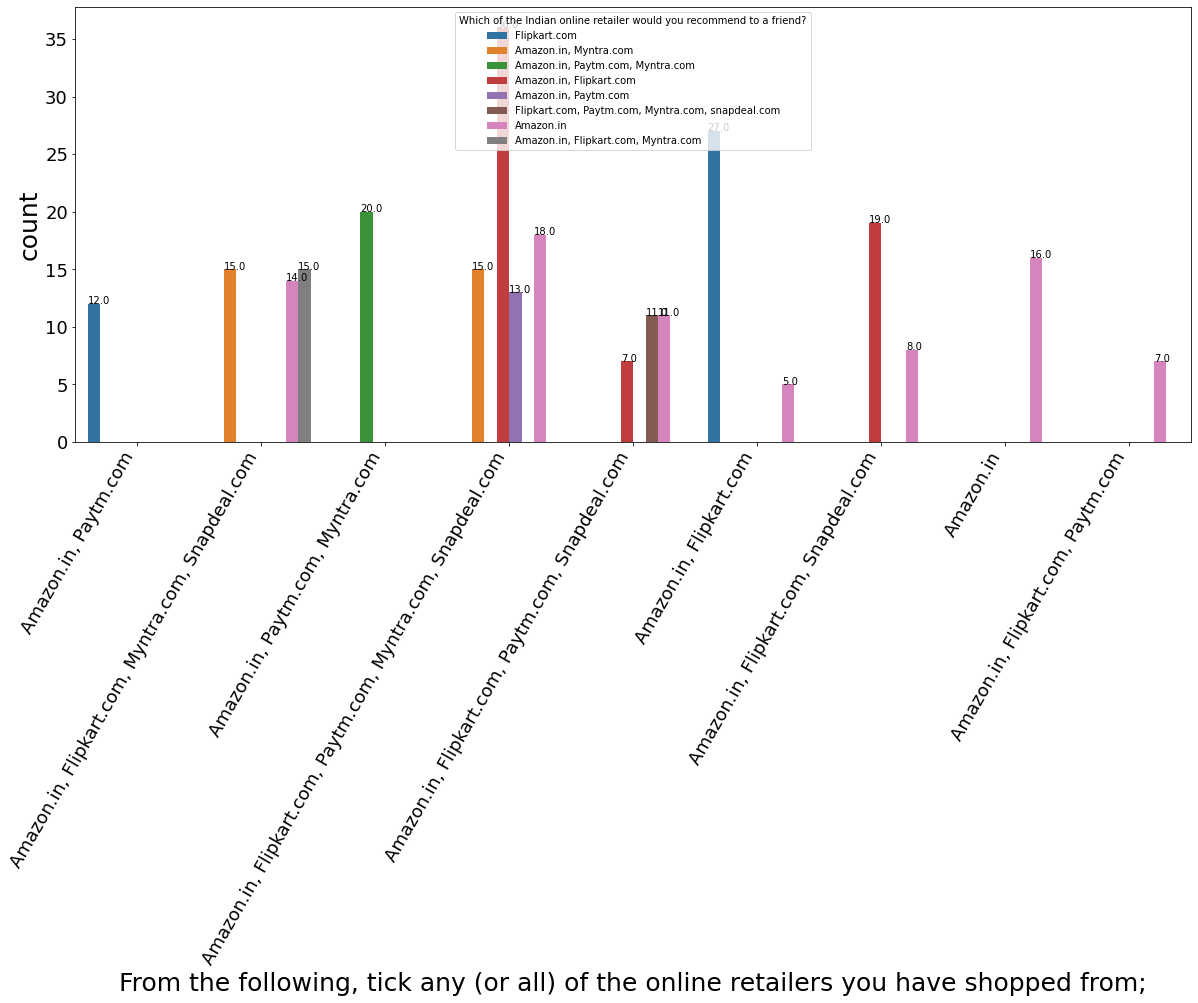

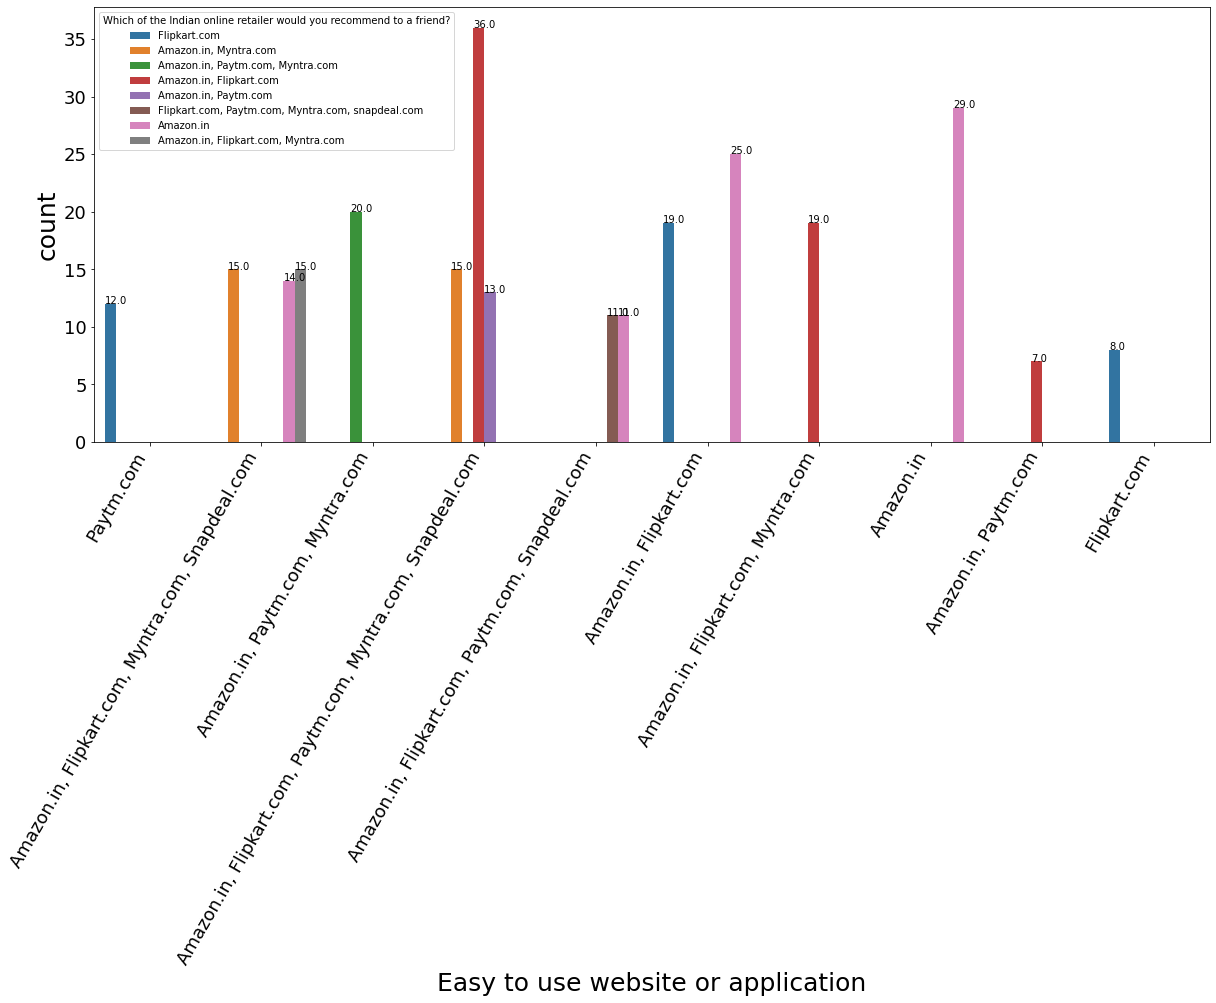

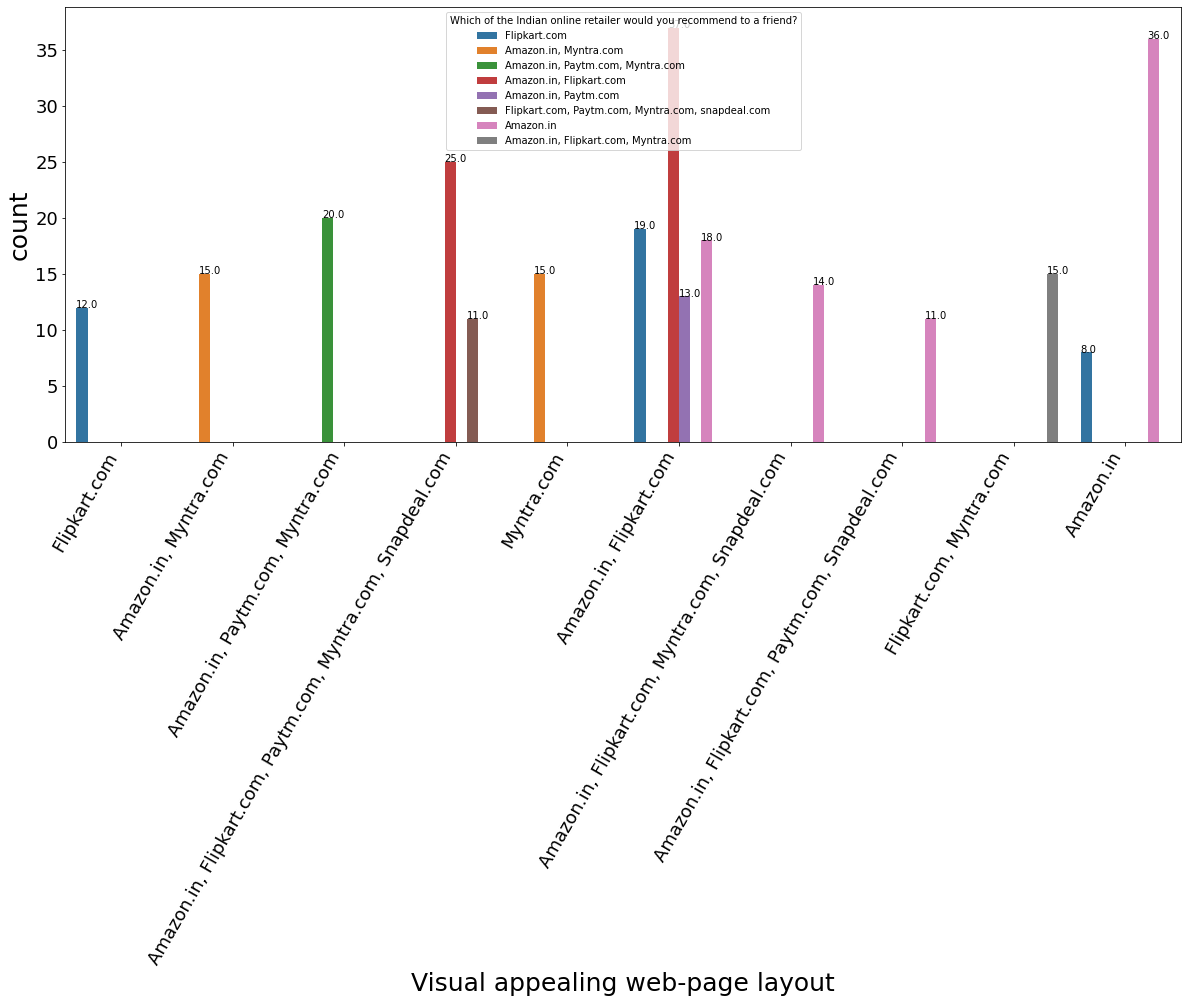

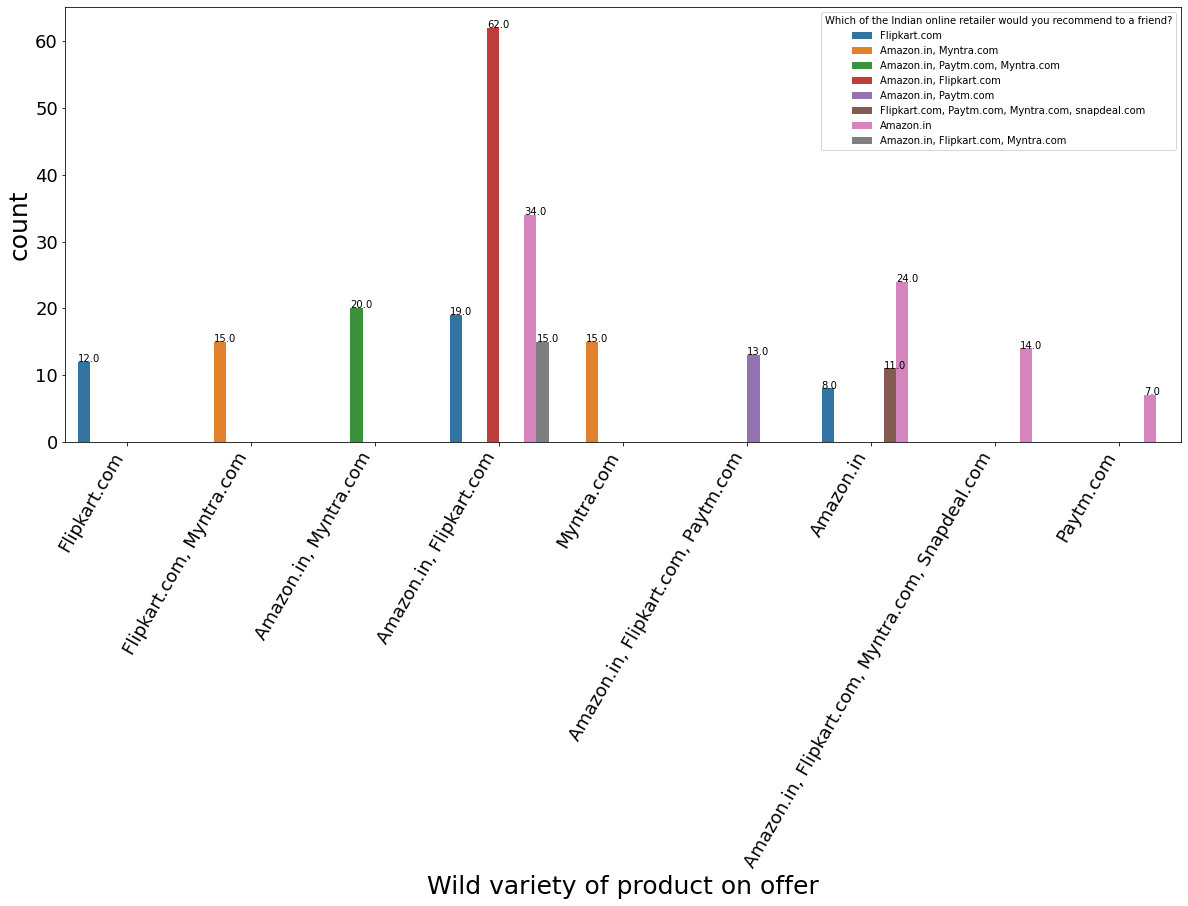

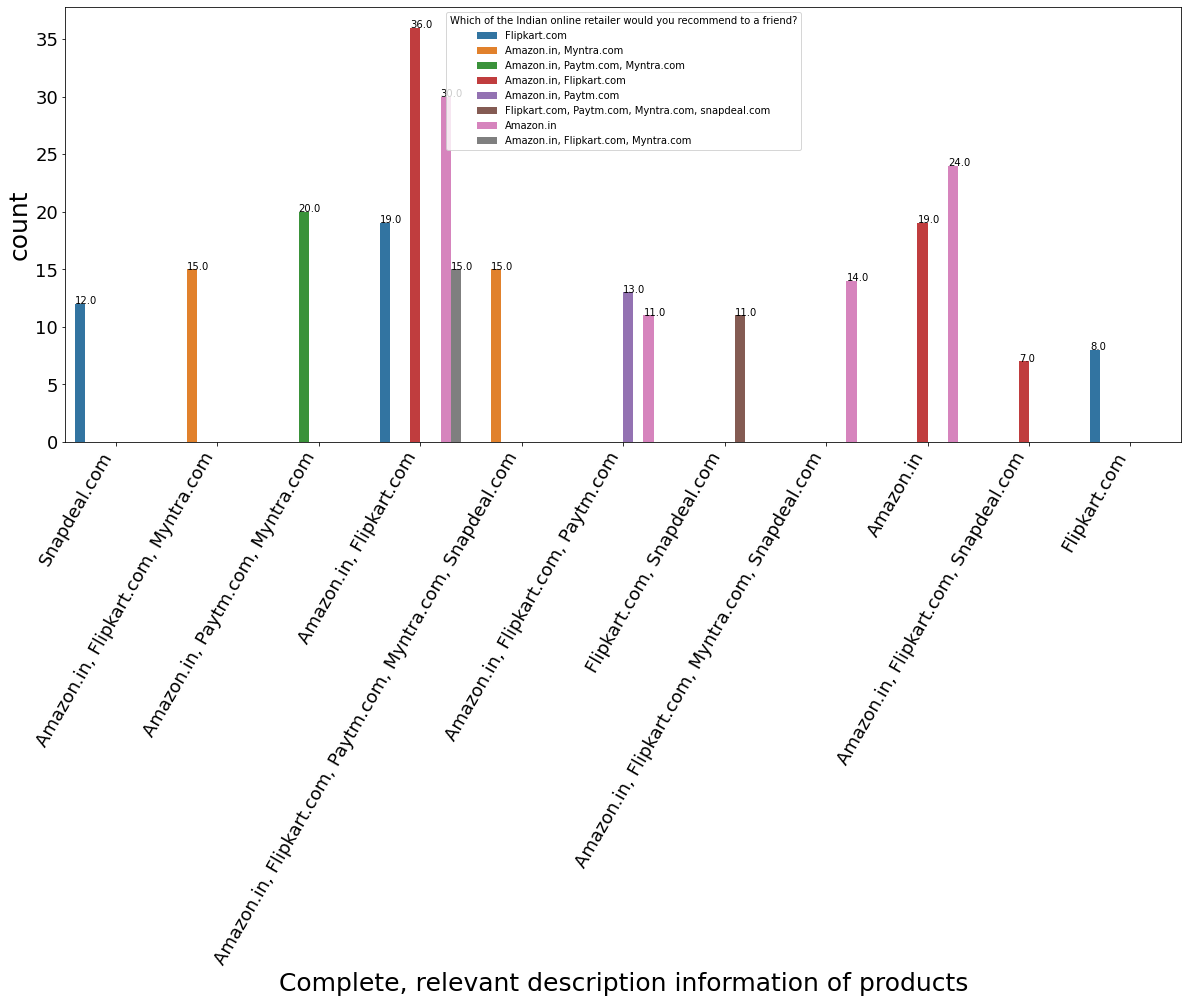

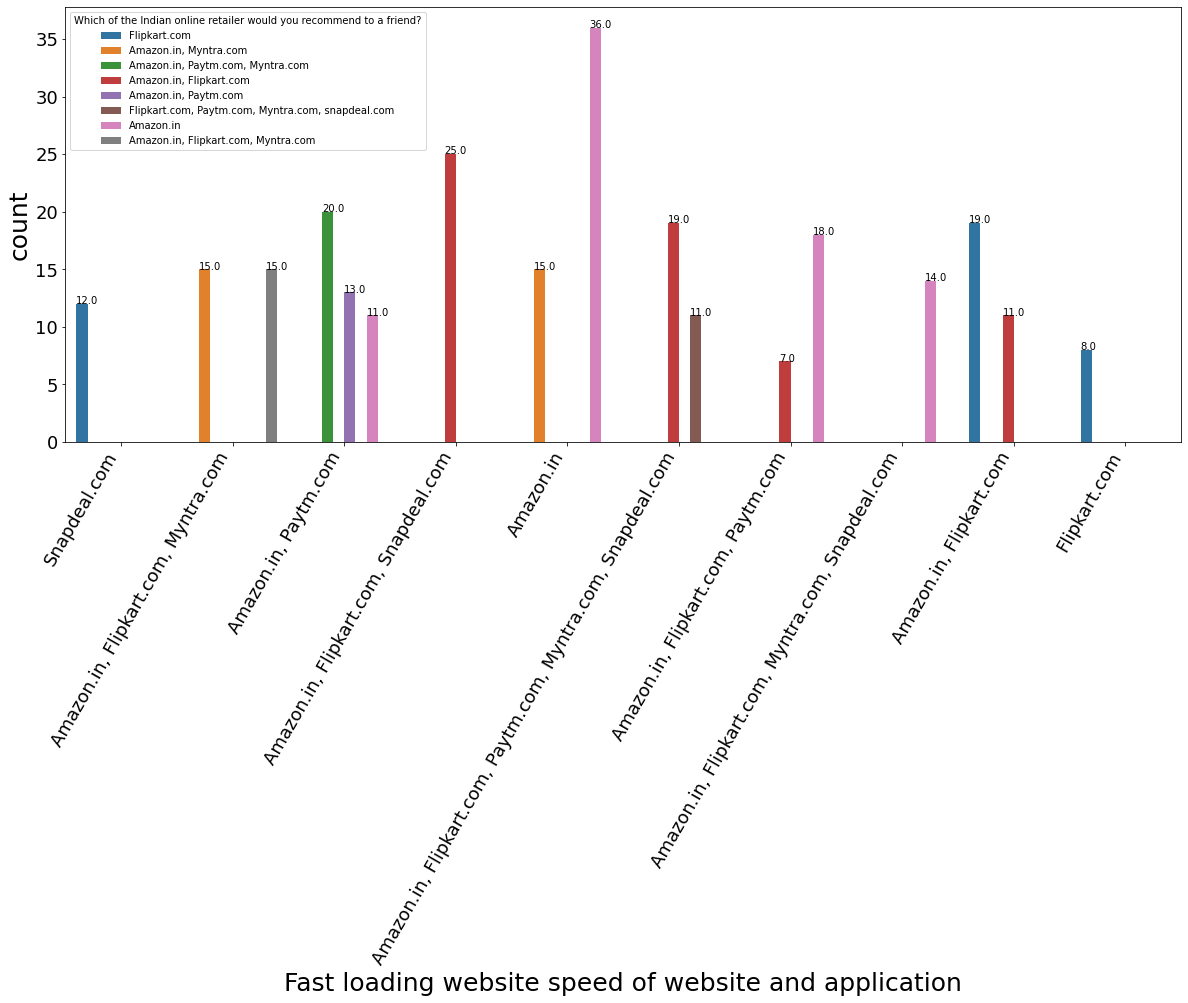

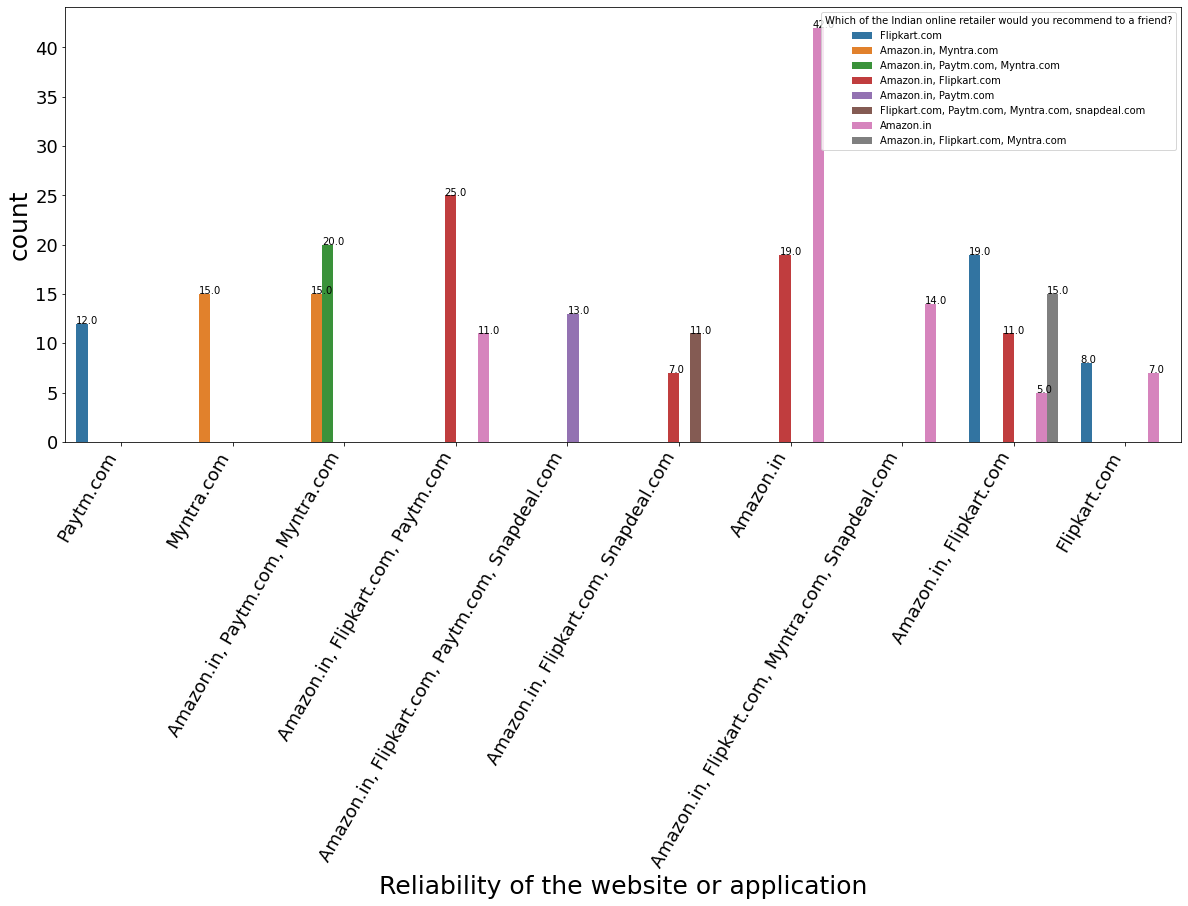

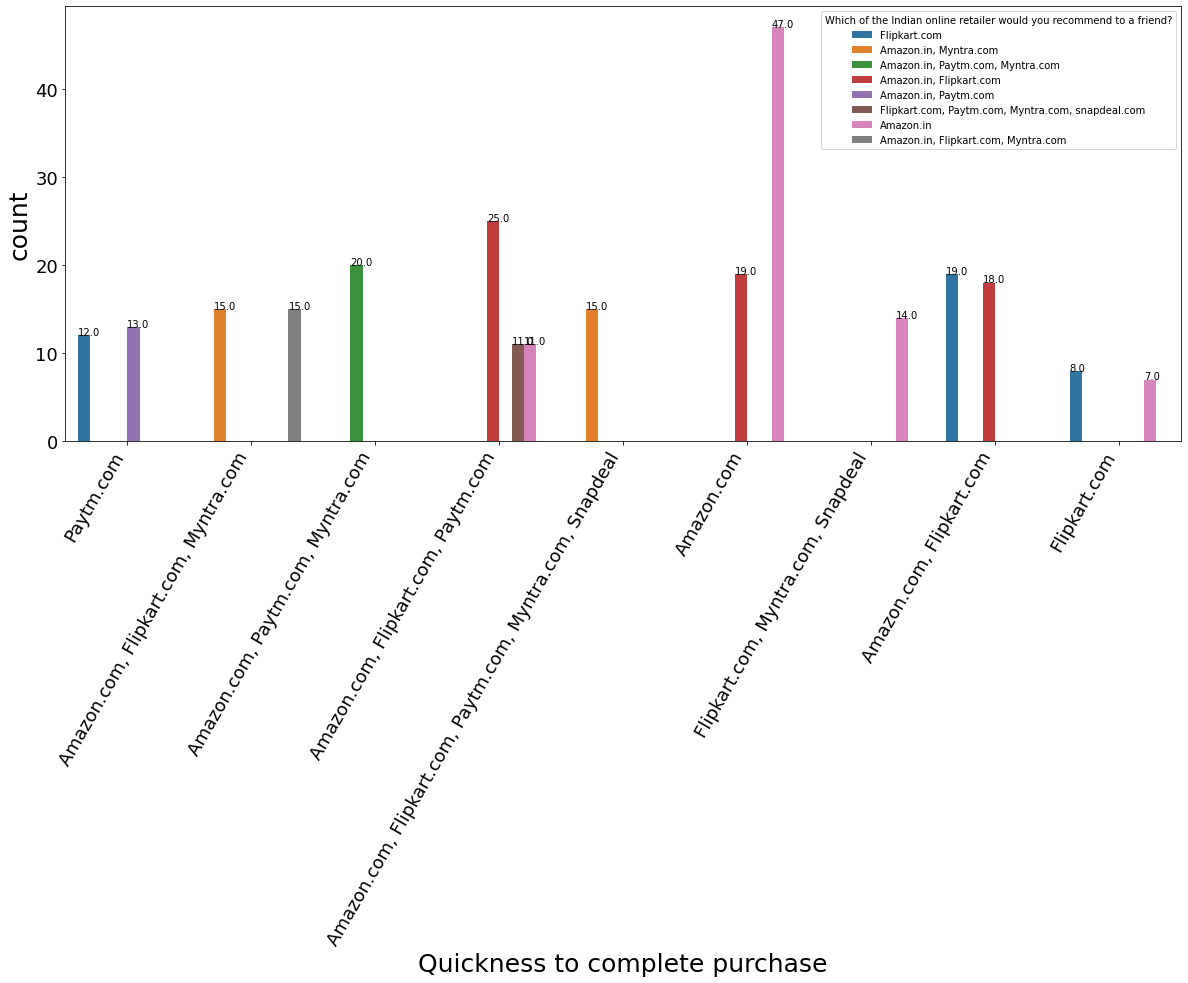

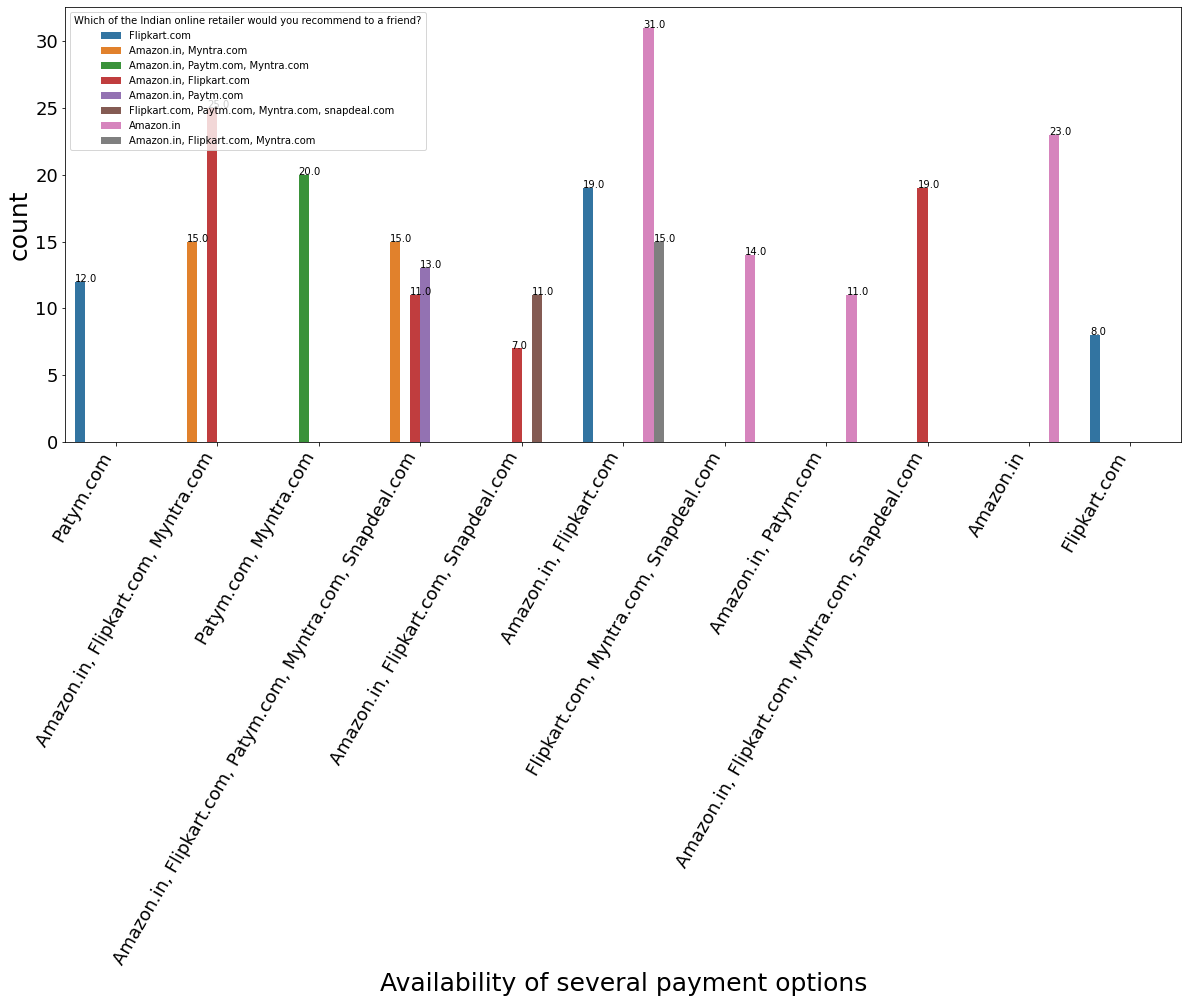

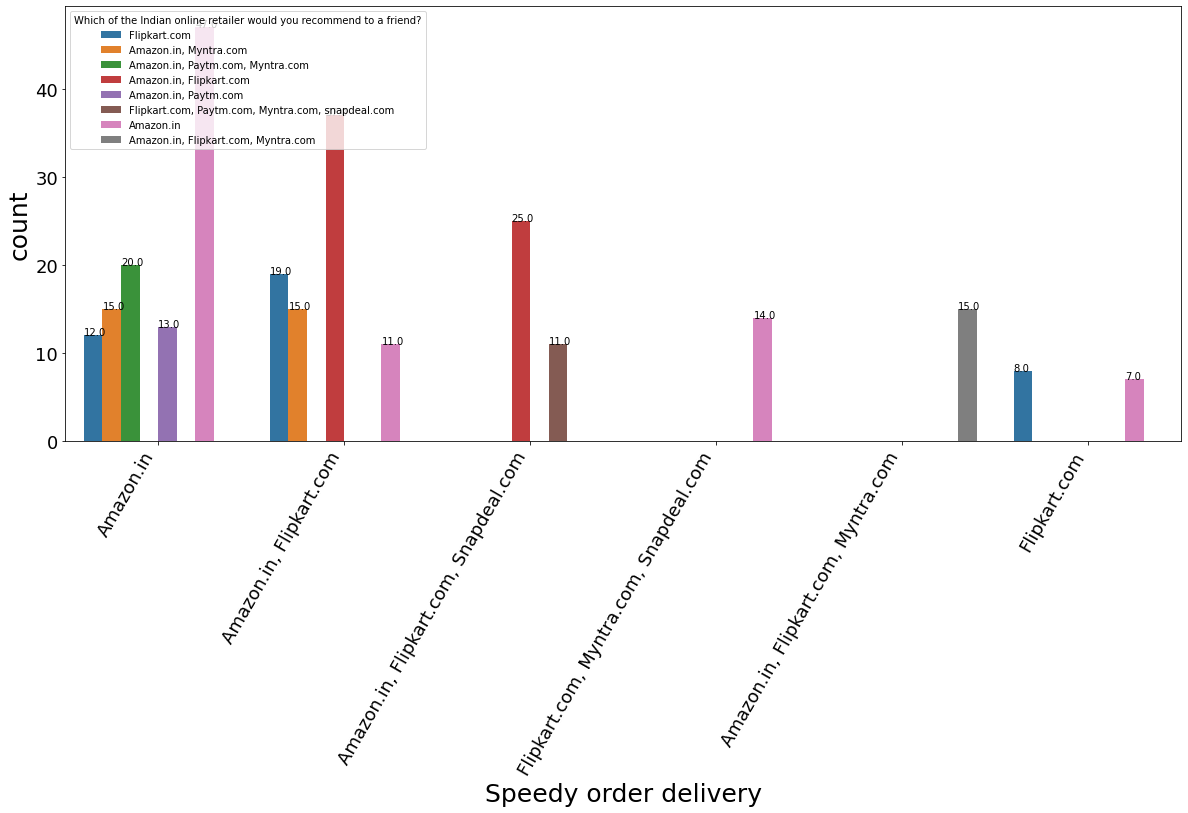

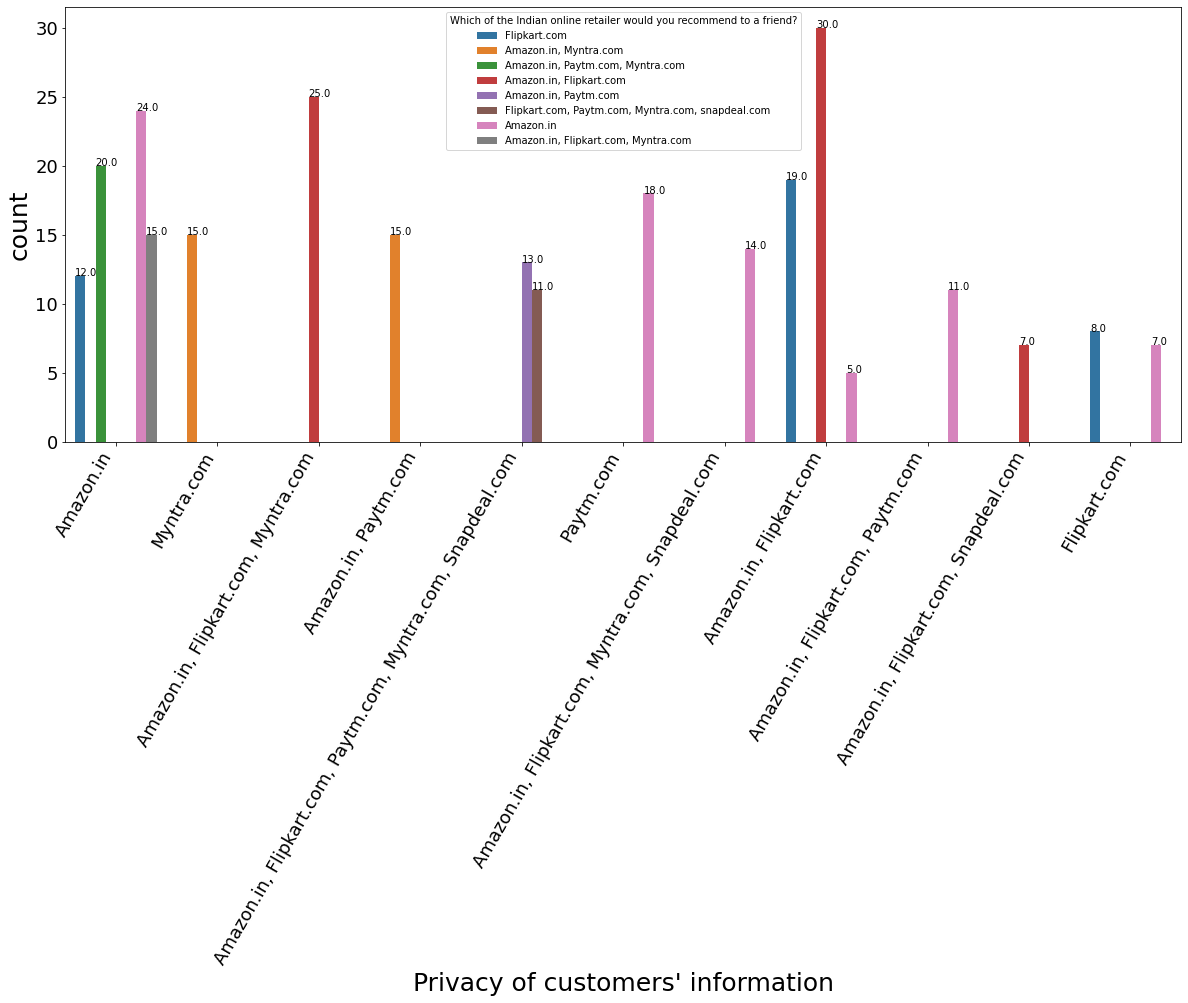

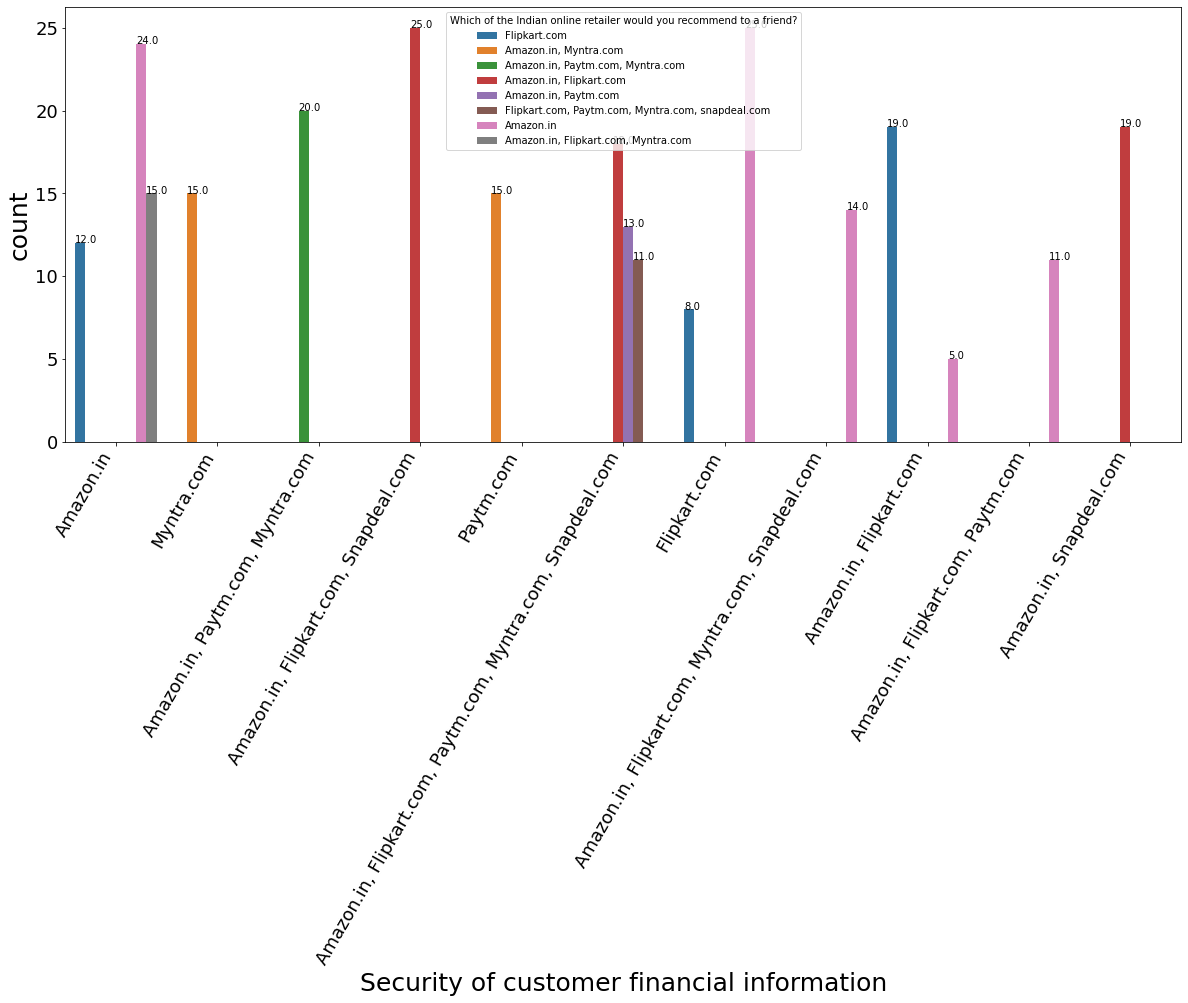

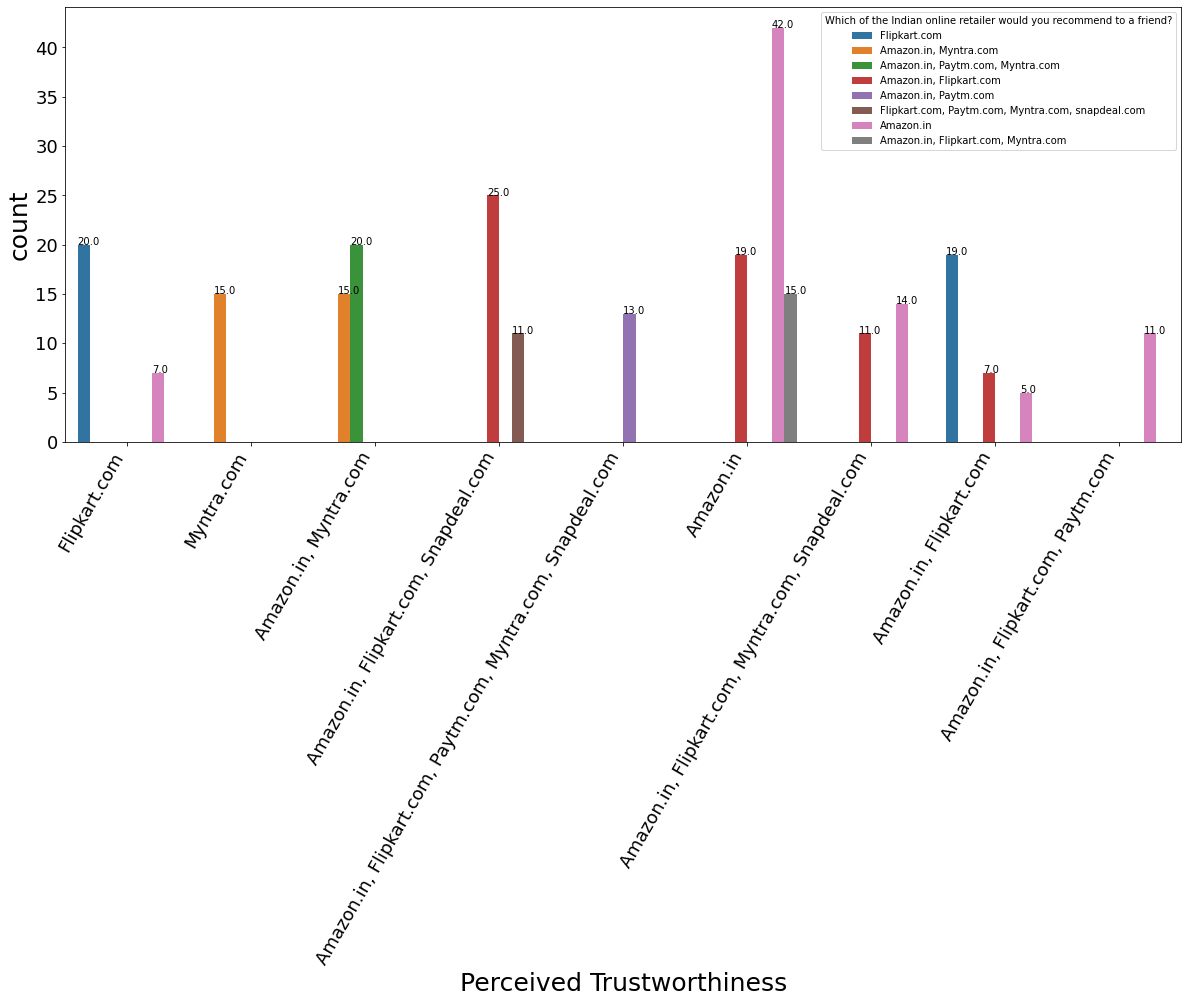

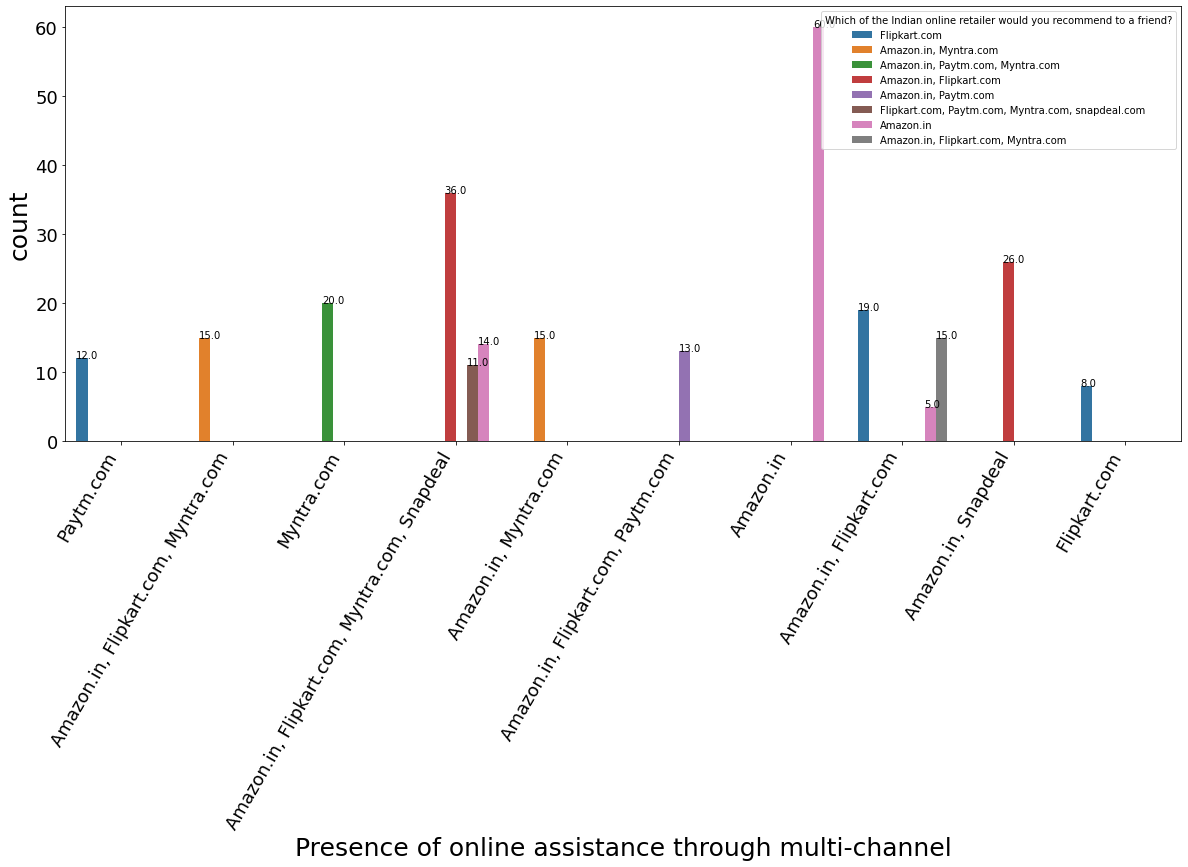

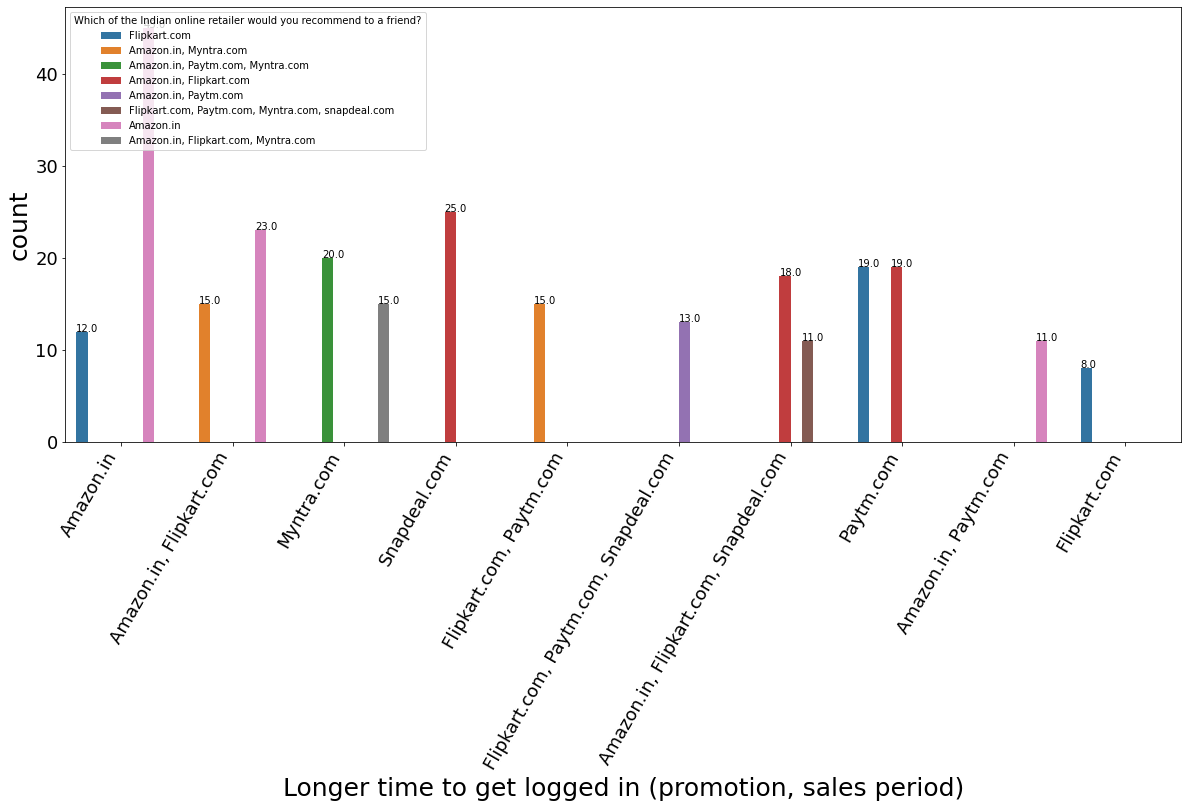

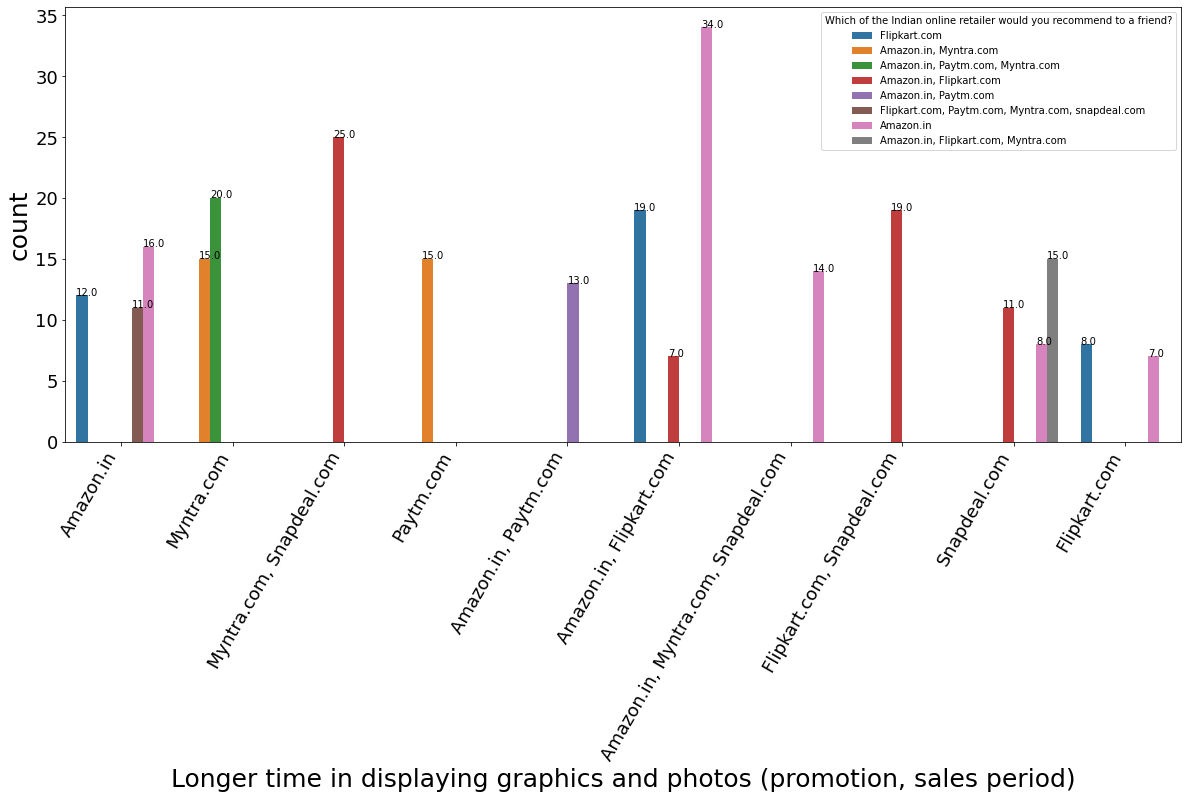

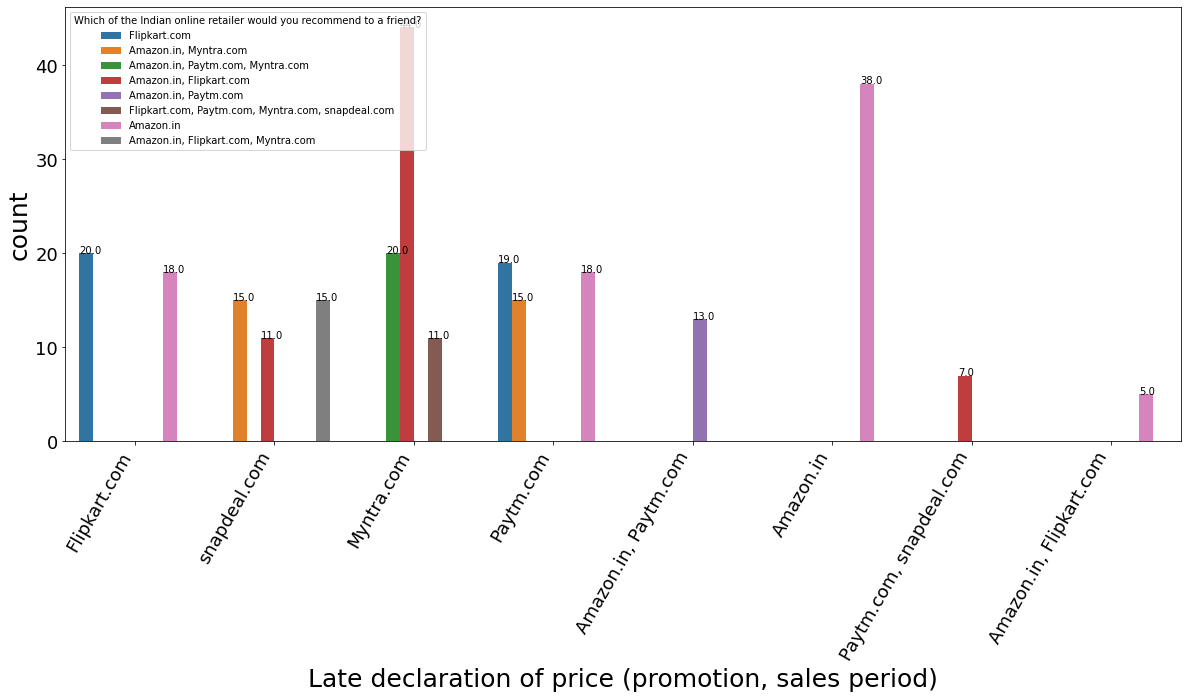

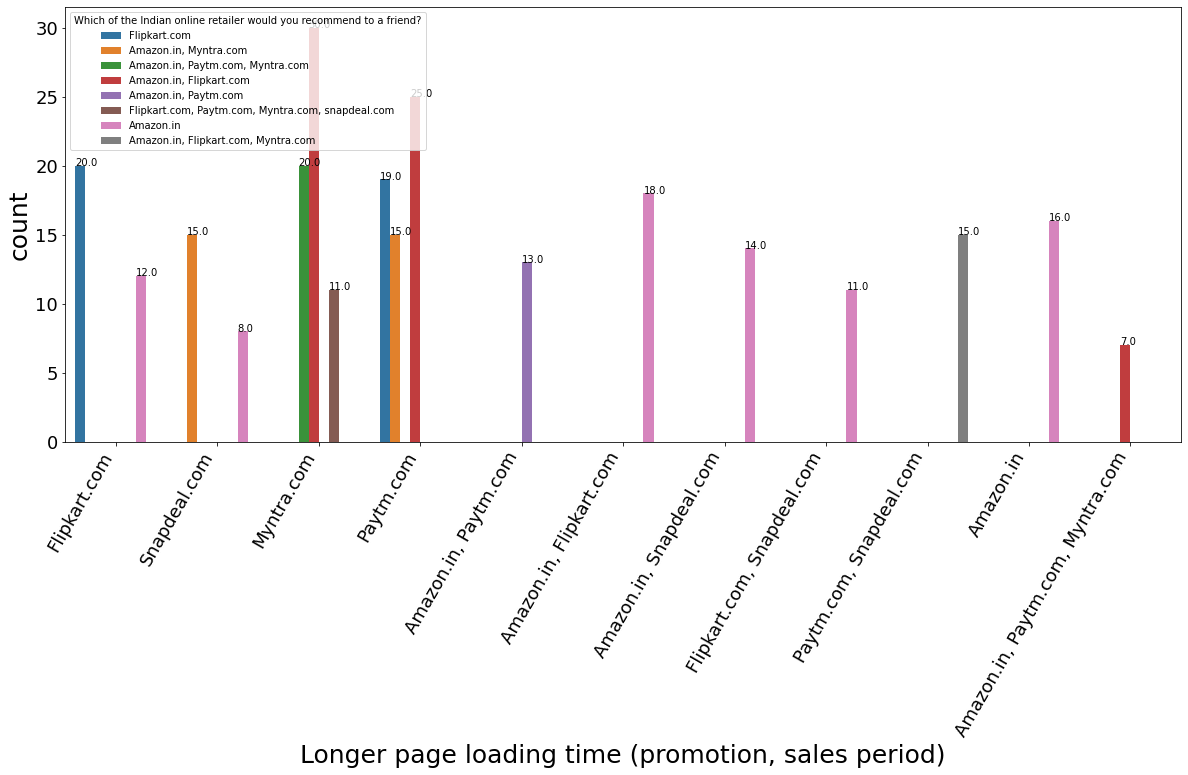

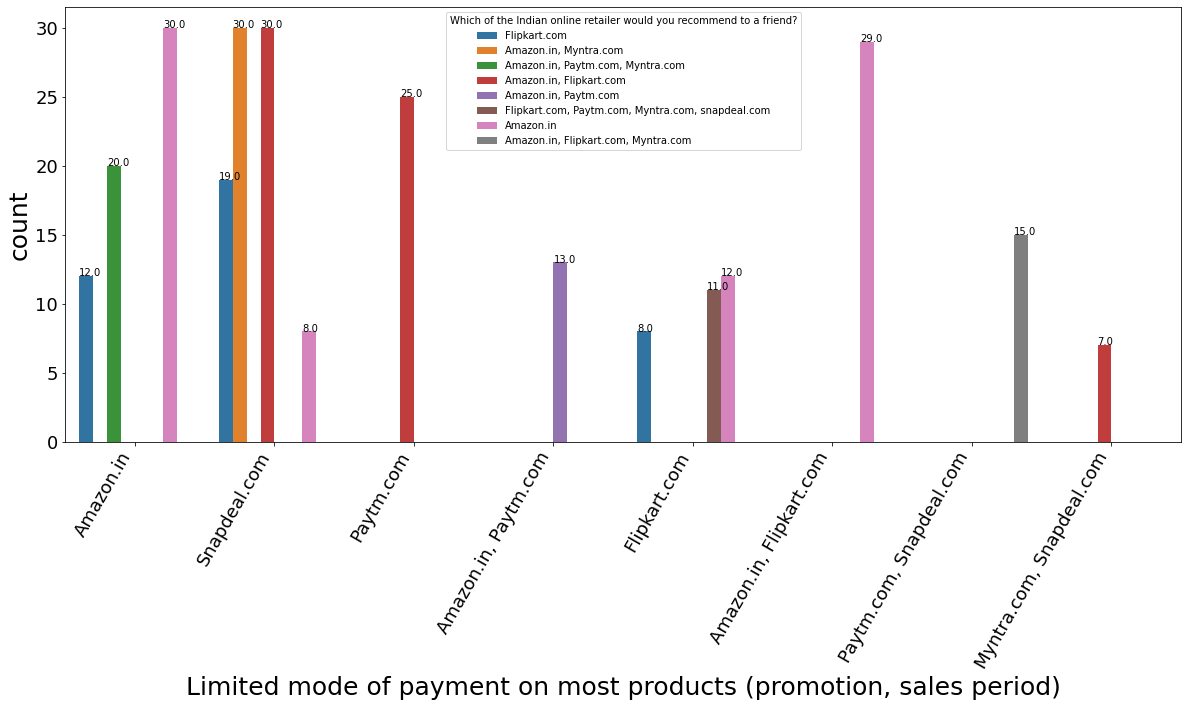

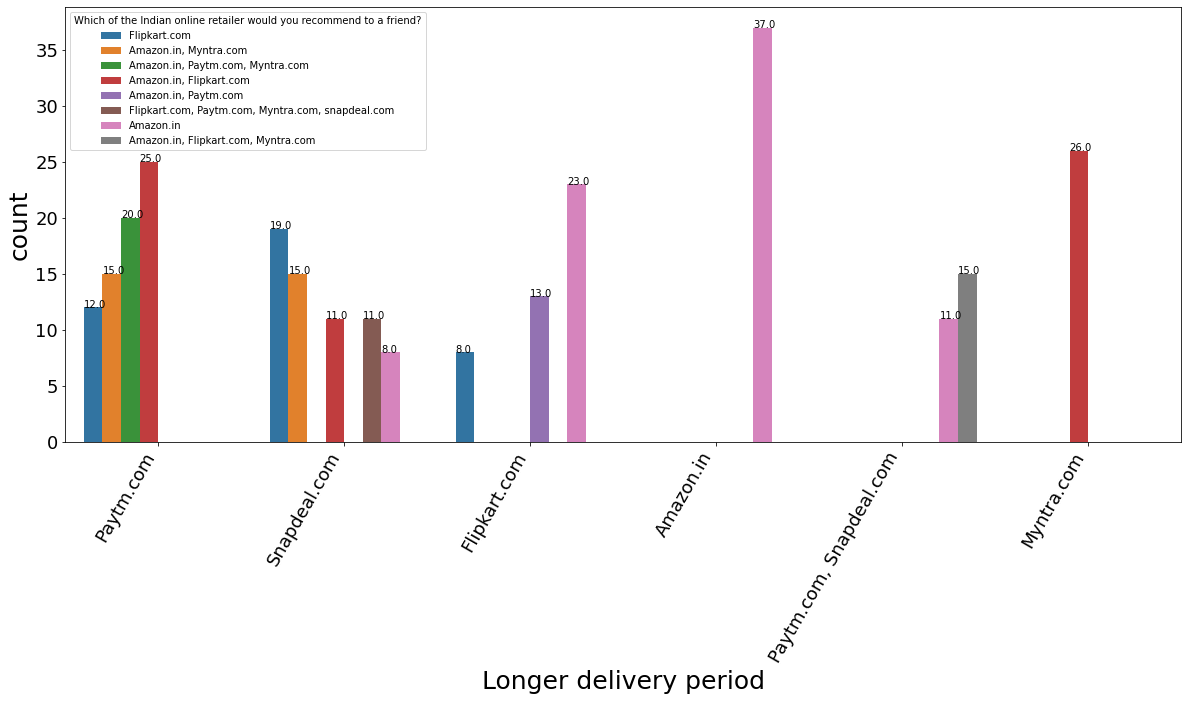

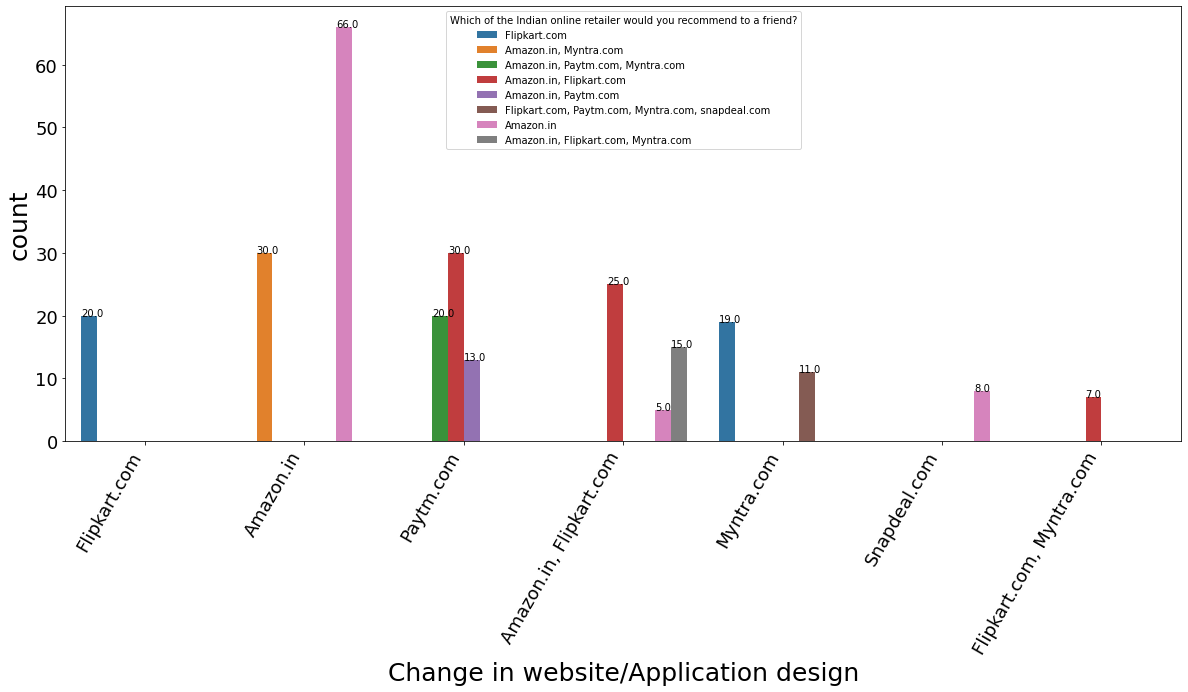

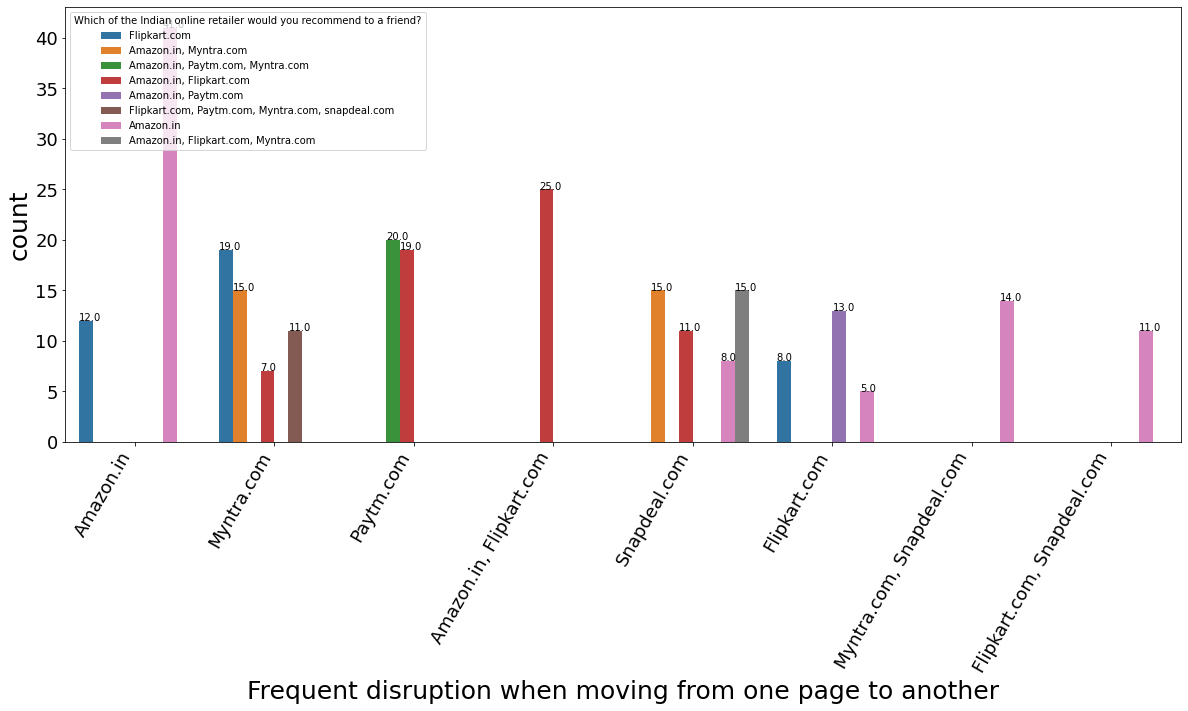

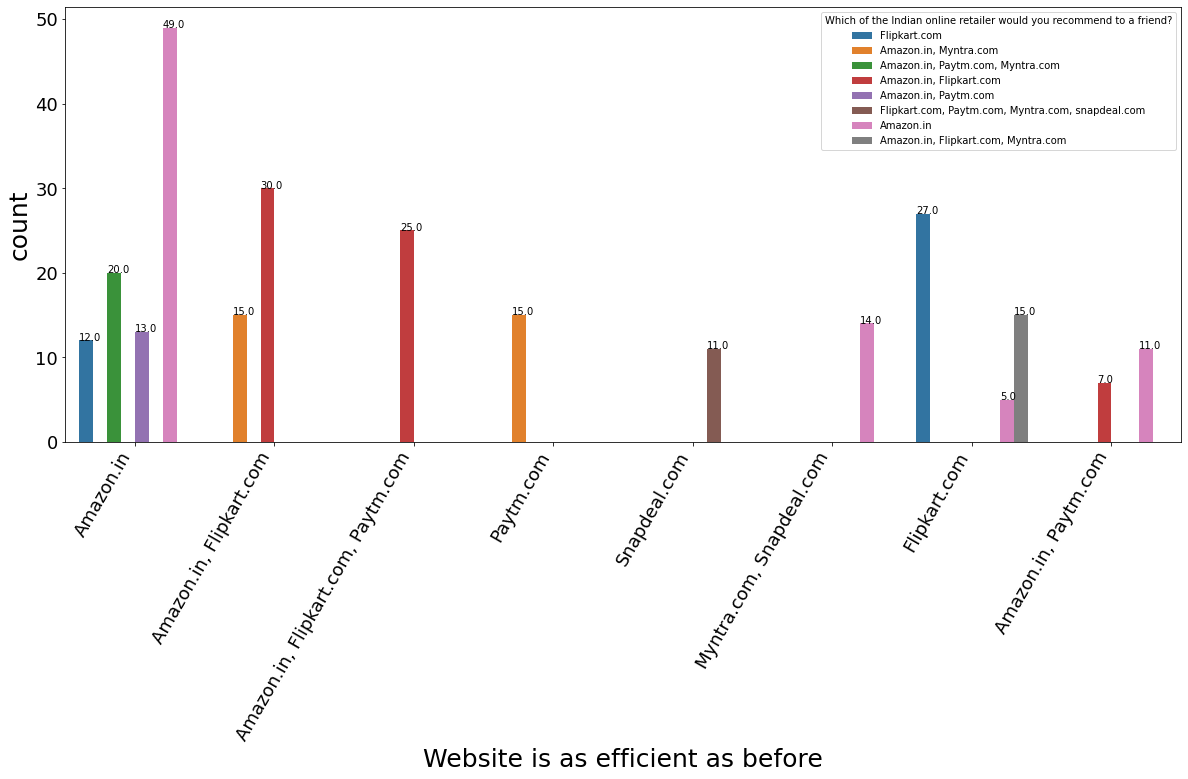

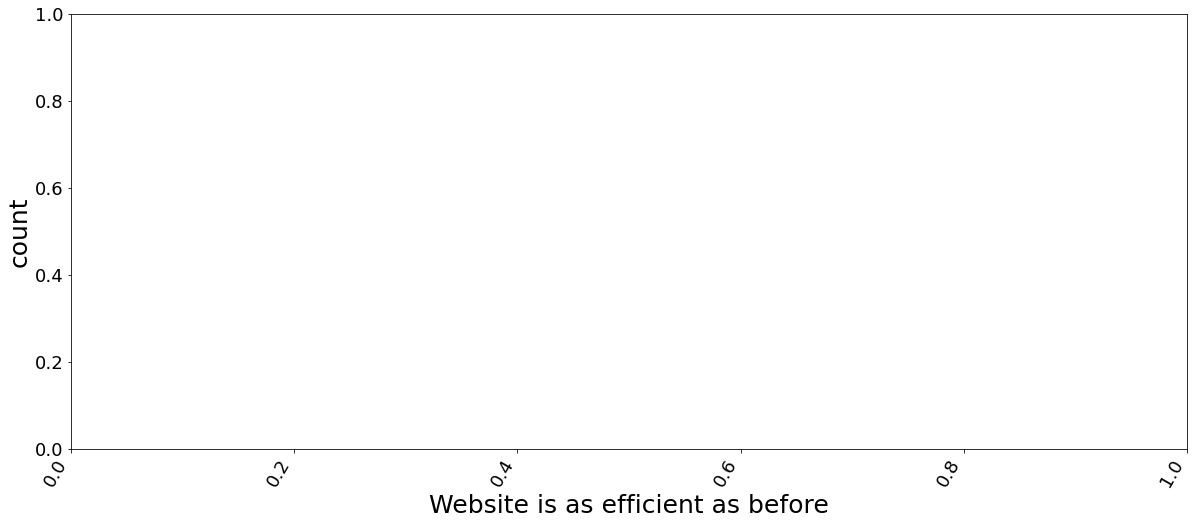

In [816]:
# Visualizing all our columns with our Target

for i in customer.columns[0:70]:
    if i == len(customer.columns)-70:
        break
    col = sns.countplot(data = customer,x=i,hue='Which of the Indian online retailer would you recommend to a friend?')
    plt.figure(figsize=(20,8))
    plt.xlabel(i,fontsize=25)
    plt.xticks(size=18,rotation=60, ha='right')
    plt.ylabel('count',fontsize=25)
    plt.yticks(size=18)
    
    for p in col.patches:
        col.annotate(f'\n{p.get_height()}', (p.get_x()+0, p.get_height()), color='black', size=10,)
vis_col
   
        
    

In [817]:
# Analyzing percentage of values in each column

count_col =[]

for i in customer.columns[0:70]:
    if i == len(customer.columns)-70:
        break
    vl = round((customer[i].value_counts()/269*100),2)
    print(vl)
    
count_col

Female    67.29
Male      32.71
Name: Gender of respondent, dtype: float64
31-40 years           30.11
21-30 years           29.37
41-50 yaers           26.02
Less than 20 years     7.43
51 years and above     7.06
Name: How old are you?, dtype: float64
Delhi            21.56
Greater Noida    15.99
Noida            14.87
Bangalore        13.75
Karnal           10.04
Solan             6.69
Ghaziabad         6.69
Gurgaon           4.46
Merrut            3.35
Moradabad         1.86
Bulandshahr       0.74
Name: Which city do you shop online from?, dtype: float64
201308    14.13
132001     7.06
201310     6.69
110044     5.95
250001     3.35
173229     3.35
173212     3.35
560010     2.97
132036     2.97
122018     2.97
560037     2.97
110008     2.60
110011     2.60
201306     2.60
110014     2.23
110018     2.23
201305     1.86
201008     1.86
201009     1.86
201312     1.86
244001     1.86
530068     1.86
122009     1.49
201001     1.49
560003     1.49
201304     1.49
110009     1.49
201

[]

Analysis:
    
Majority of the customers agree to the factor that the websites must be easy to read and understand, similar
product to the one highlighted  is important for product comparison, information on listed seller and product
is important for purchase decision

When purchasing a product from online customers are majorly looking into these factors Ease of navigation in website,
Loading and processing speed, Convenient Payment methods, Being able to guarantee the privacy of the customer
Return and replacement policy.

87% of customers trust that the online retail store will fulfill its part of the transaction at the stipulated time
and 97% of customers satisfaction improves when displaying quality Information on the website, while 80% User derive 
satisfaction when shopping on a good quality website or application


In [818]:
# Encoding the Dataset for further analysis 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in customer.columns:
    if customer[i].dtypes=='object':
        customer[i] = le.fit_transform(customer[i].values.reshape(-1,1))

Since dataset has a lot of string values. Encoding has been applied to convert the string data to numerical

In [819]:
customer

Gender of respondent  How old are you?  \
0                       1                 1   
1                       0                 0   
2                       0                 0   
3                       1                 0   
4                       0                 0   
..                    ...               ...   
264                     0                 0   
265                     0                 1   
266                     0                 2   
267                     0                 4   
268                     0                 2   

     Which city do you shop online from?  \
0                                      2   
1                                      2   
2                                      4   
3                                      6   
4                                      0   
..                                   ...   
264                                   10   
265                                    3   
266                                    0   
267                                   10   
268                                    3   

     What is the Pin Code of where you shop online from?  \
0                                               110009     
1                                               110030     
2                                               201308     
3                                               132001     
4                                               530068     
..                                                 ...     
264                                             173212     
265                                             201008     
266                                             560010     
267                                             173229     
268                                             201009     

     Since How Long You are Shopping Online ?  \
0                                           3   
1                                           3   
2                                           2   
3                                           2   
4                                           1   
..                                        ...   
264                                         0   
265                                         0   
266                                         1   
267                                         1   
268                                         1   

     How many times you have made an online purchase in the past  year?  \
0                                                    2                    
1                                                    3                    
2                                                    3                    
3                                                    5                    
4                                                    0                    
..                                                 ...                    
264                                                  5                    
265                                                  2                    
266                                                  5                    
267                                                  5                    
268                                                  2                    

     How do you access the internet while shopping on-line?  \
0                                                    0        
1                                                    3        
2                                                    1        
3                                                    1        
4                                                    3        
..                                                 ...        
264                                                  1        
265                                                  1        
266                                                  2        
267                                                  3        
268    

In [820]:
customer.shape

(269, 71)

In [754]:
customer.describe()

Gender of respondent  How old are you?  \
count            269.000000        269.000000   
mean               0.327138          1.330855   
std                0.470042          1.183774   
min                0.000000          0.000000   
25%                0.000000          0.000000   
50%                0.000000          1.000000   
75%                1.000000          2.000000   
max                1.000000          4.000000   

       Which city do you shop online from?  \
count                           269.000000   
mean                              4.494424   
std                               3.187687   
min                               0.000000   
25%                               2.000000   
50%                               4.000000   
75%                               7.000000   
max                              10.000000   

       What is the Pin Code of where you shop online from?  \
count                                         269.000000     
mean                                       220465.747212     
std                                        140524.341051     
min                                        110008.000000     
25%                                        122018.000000     
50%                                        201303.000000     
75%                                        201310.000000     
max                                        560037.000000     

       Since How Long You are Shopping Online ?  \
count                                269.000000   
mean                                   2.323420   
std                                    1.176357   
min                                    0.000000   
25%                                    1.000000   
50%                                    3.000000   
75%                                    3.000000   
max                                    4.000000   

       How many times you have made an online purchase in the past  year?  \
count                                         269.000000                    
mean                                            3.237918                    
std                                             1.739331                    
min                                             0.000000                    
25%                                             2.000000                    
50%                                             3.000000                    
75%                                             5.000000                    
max                                             5.000000                    

       How do you access the internet while shopping on-line?  \
count                                         269.000000        
mean                                            2.078067        
std                                             0.715919        
min                                             0.000000        
25%                                             2.000000        
50%                                             2.000000        
75%                                             3.000000        
max                                             3.000000        

       Which device do you use to access the online shopping?  \
count                                         269.000000        
mean                                            1.501859        
std                                             0.751240        
min                                             0.000000        
25%                                             1.000000        
50%                                             2.000000        
75%                                             2.000000        
max                                             3.000000        

       What is the screen size of your mobile device?  \
count                                      269.000000   
mean                                         2.256506   
std                                          0.944942   
min                                  

Analysis:
    
Count is same across all the columns stating no missing values

Mean is greater than median(50%) in most of the columns which shows data is skewed on right side

pincode 75% to max value difference is high which means outliers are present

<AxesSubplot:>

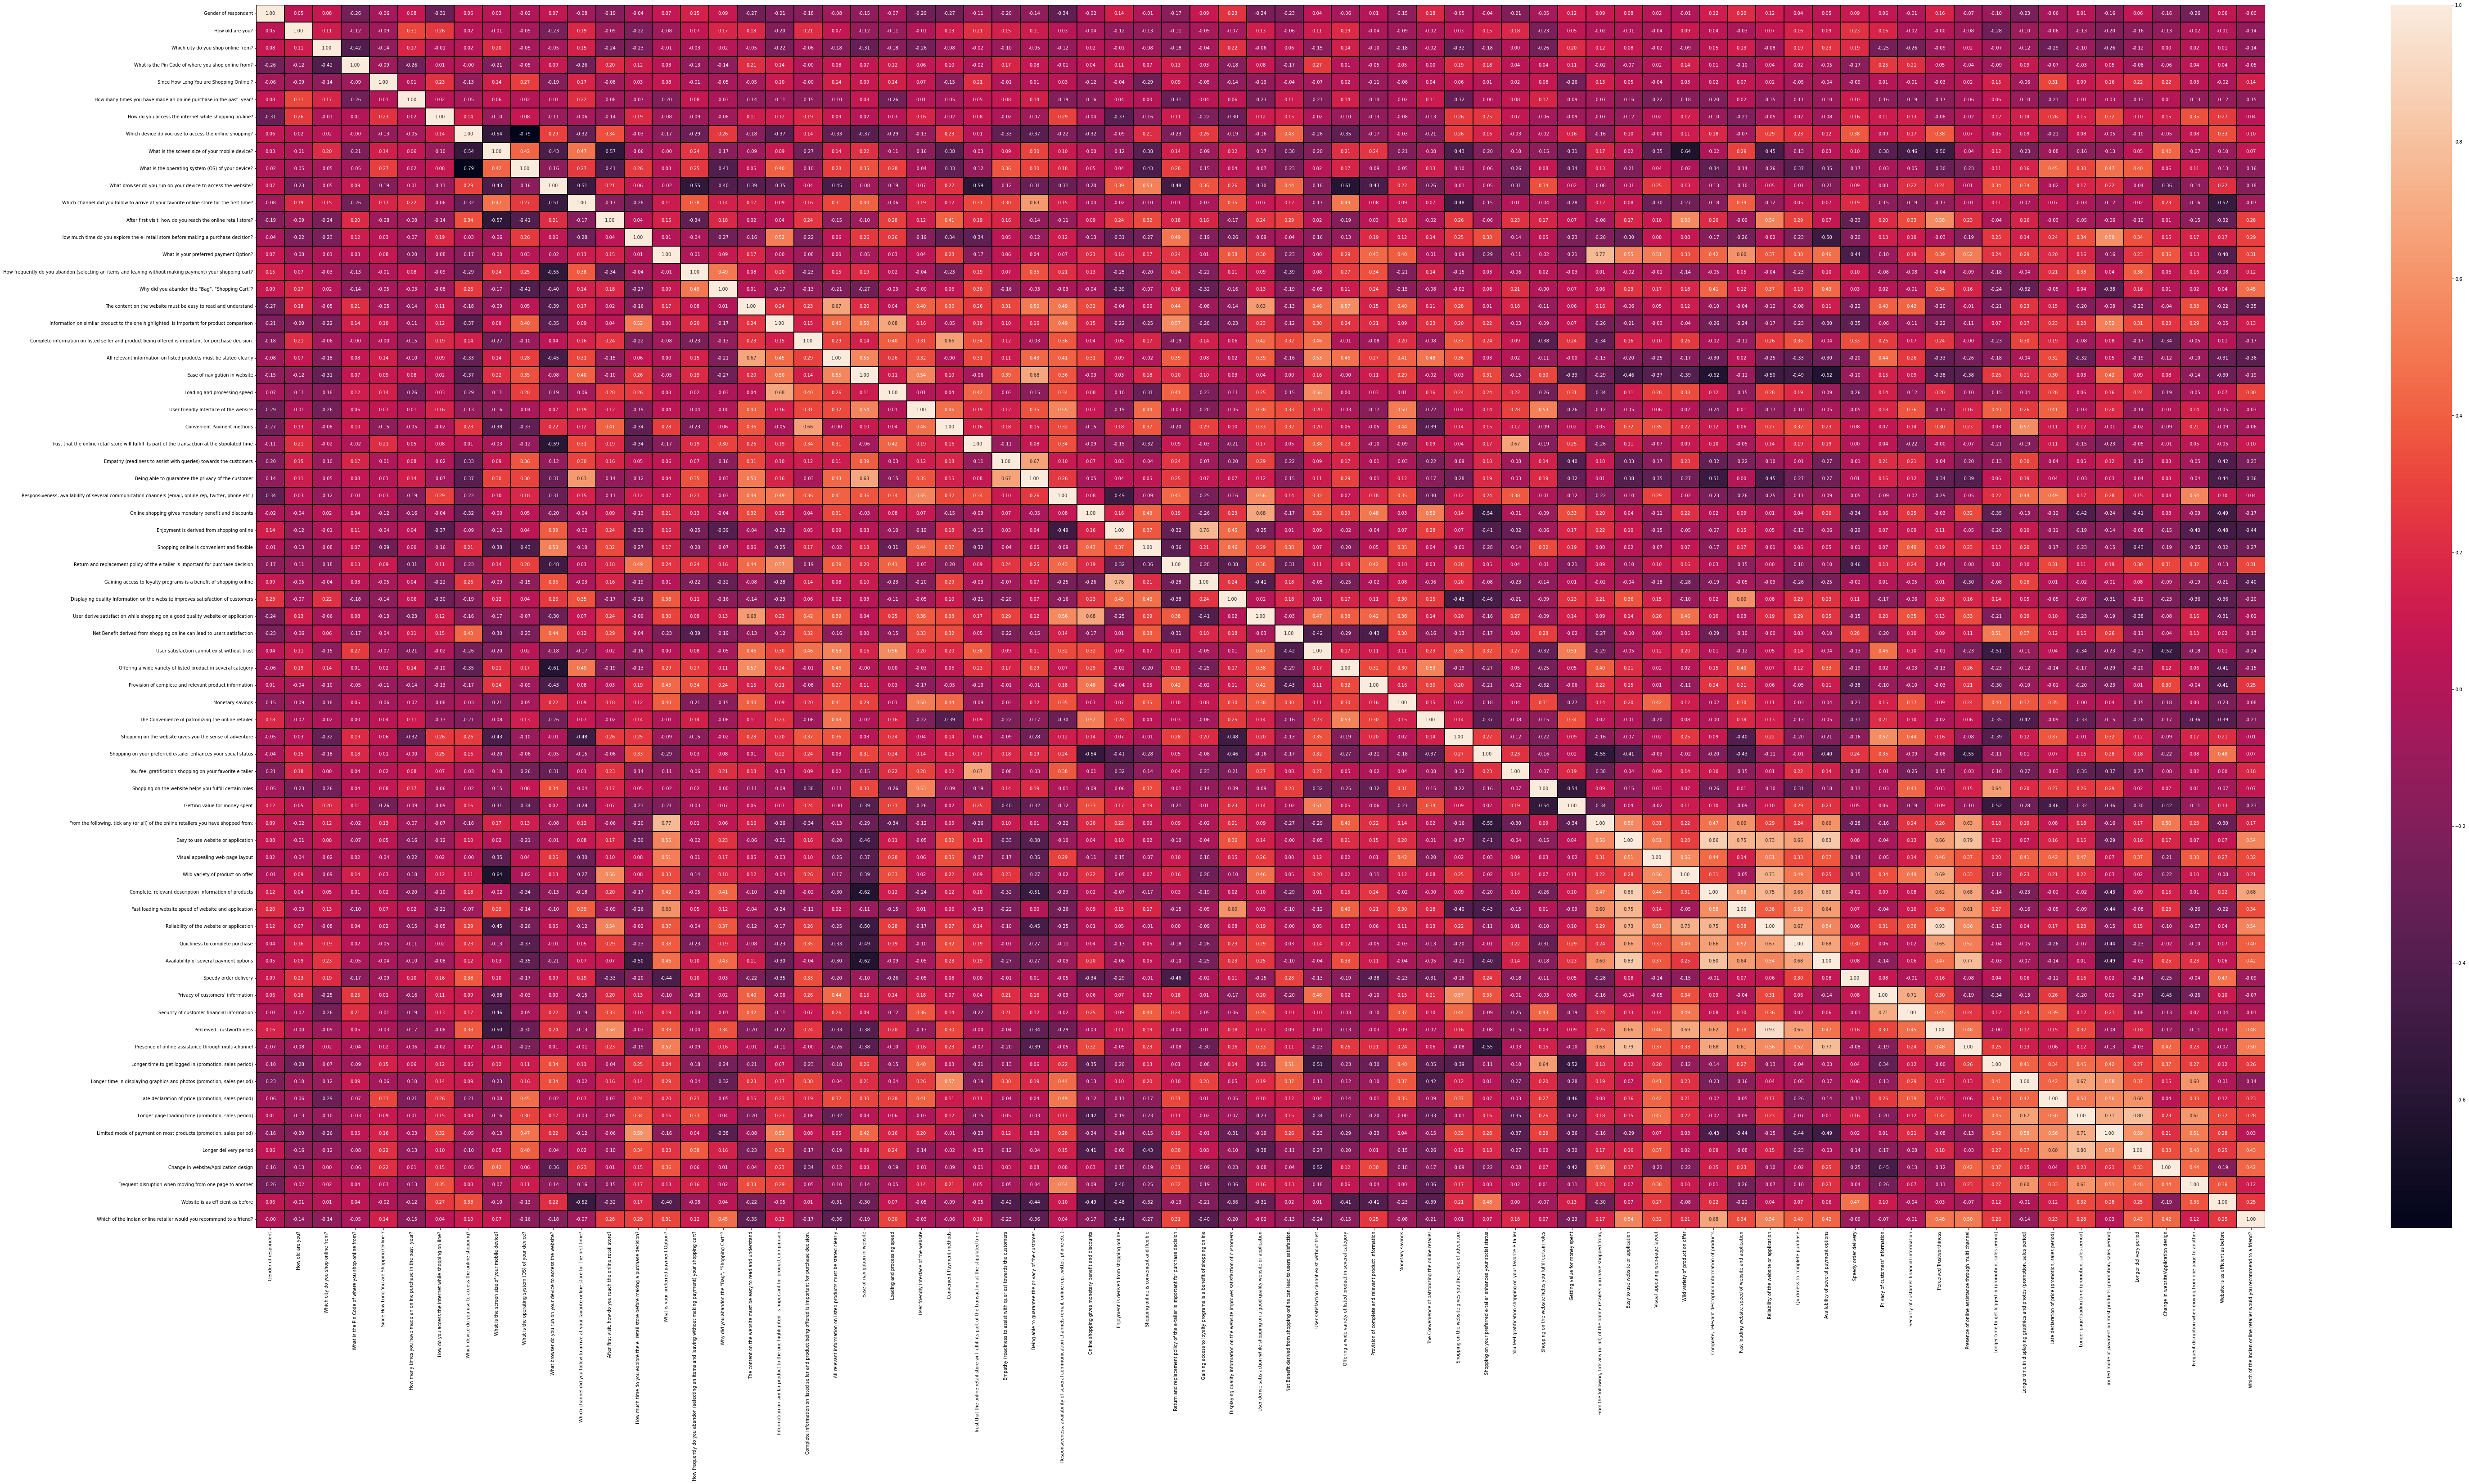

In [822]:
# Visualizing Correlation

plt.figure(figsize=(100,50))
sns.heatmap(customer.corr().T,annot = True,linewidth=0.1,linecolor='black',fmt='0.2f')

In [825]:
# Correlation of the columns with the target columns

customer.corr()['Which of the Indian online retailer would you recommend to a friend?'].sort_values()

Enjoyment is derived from shopping online                                                                   -0.436613
Gaining access to loyalty programs is a benefit of shopping online                                          -0.400583
All relevant information on listed products must be stated clearly                                          -0.362879
Being able to guarantee the privacy of the customer                                                         -0.358734
The content on the website must be easy to read and understand                                              -0.349016
Shopping online is convenient and flexible                                                                  -0.272532
User satisfaction cannot exist without trust                                                                -0.241386
Empathy (readiness to assist with queries) towards the customers                                            -0.232305
Getting value for money spent                           

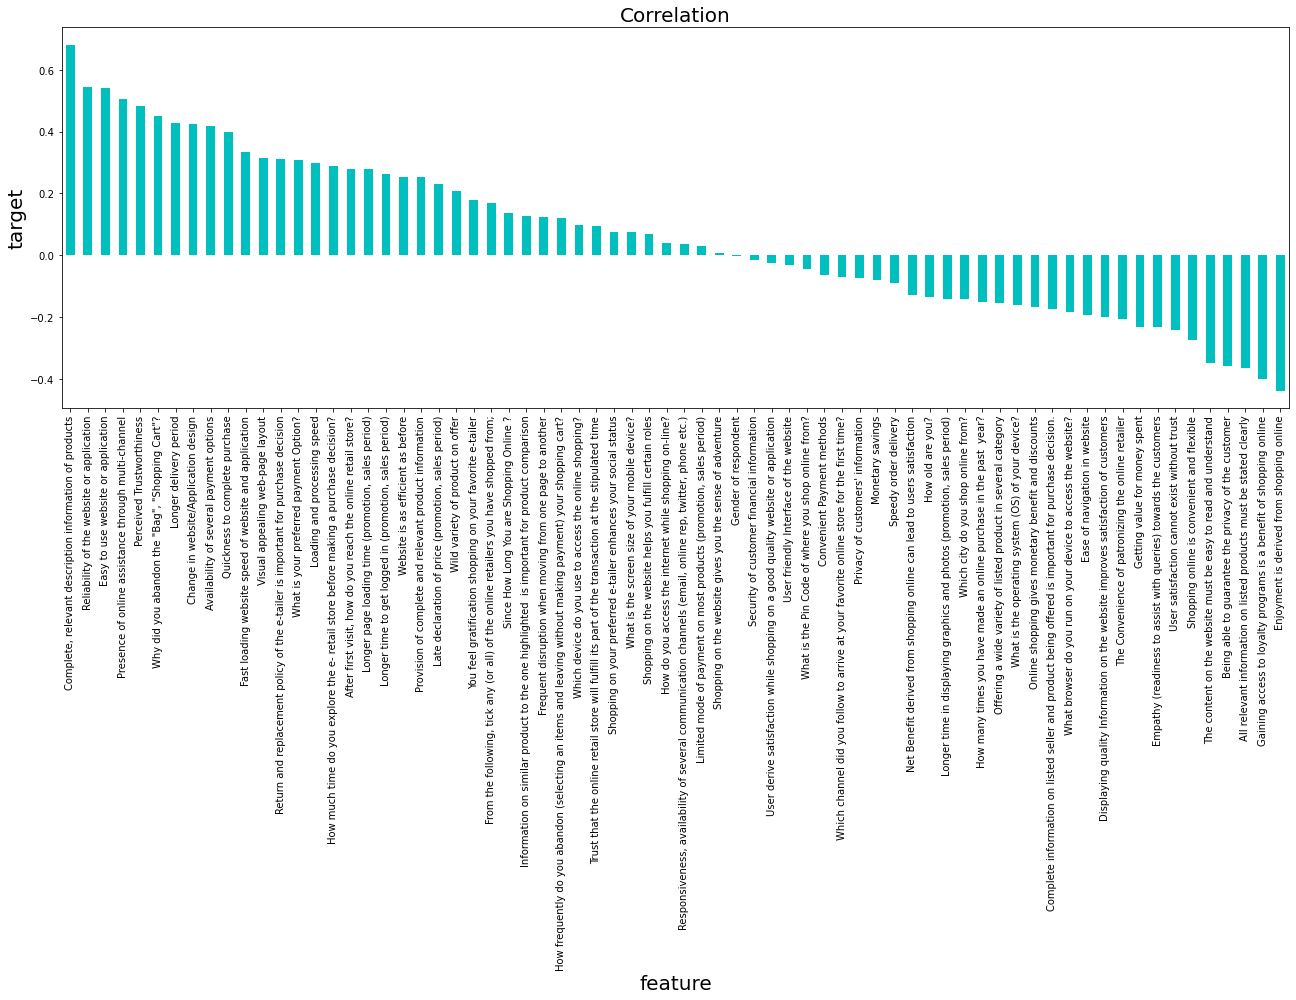

In [824]:
plt.figure(figsize=(22,7))
customer.corr()['Which of the Indian online retailer would you recommend to a friend?'].sort_values(ascending=False).drop(['Which of the Indian online retailer would you recommend to a friend?']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=20)
plt.ylabel('target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show()

Below are Negative correlated 

Enjoyment is derived from shopping online
Gaining access to loyalty programs is a benefit of shopping online


Below are Positive correlated

Presence of online assistance through multi-channel
Easy to use website or application    
Reliability of the website or application  
Complete, relevant description information of products               

In [826]:
customer.skew()

Gender of respondent                                                                                         0.741028
How old are you?                                                                                             0.680987
Which city do you shop online from?                                                                          0.313729
What is the Pin Code of where you shop online from?                                                          1.748322
Since How Long You are Shopping Online ?                                                                    -0.276968
How many times you have made an online purchase in the past  year?                                          -0.421739
How do you access the internet while shopping on-line?                                                      -0.361630
Which device do you use to access the online shopping?                                                      -0.485180
What is the screen size of your mobile device?          

Keeping +/- 0.5 as the range for skewness, there are more number of columns which does not lie within the range.

Since data are categorial not applying transformation methods.

<AxesSubplot:xlabel='What is the Pin Code of where you shop online from?'>

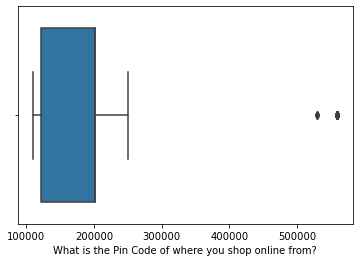

In [827]:
# Checking Outliers for pincode since the original data type is integer

# Visualizing in boxplot for column What is the Pin Code of where you shop online from?

sns.boxplot(customer['What is the Pin Code of where you shop online from?'])

Outliers are present in pincode column

In [828]:
# Z Score Method to detect and remove Outliers

from scipy.stats import zscore

z = np.abs(zscore(customer))
threshold = 3
np.where(z>3)

(array([  4,  16,  20,  30,  35,  49,  79,  88,  95, 112, 116, 133, 142,
        159, 162, 196, 207, 234, 237, 262], dtype=int64),
 array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11], dtype=int64))

In [829]:
z.iloc[4,11]

3.148183335724711

In [830]:
z.iloc[95,11]

3.148183335724711

In [831]:
customer_new_z = customer[(z<3).all(axis=1)]
customer_new_z

Gender of respondent  How old are you?  \
0                       1                 1   
1                       0                 0   
2                       0                 0   
3                       1                 0   
5                       0                 1   
..                    ...               ...   
264                     0                 0   
265                     0                 1   
266                     0                 2   
267                     0                 4   
268                     0                 2   

     Which city do you shop online from?  \
0                                      2   
1                                      2   
2                                      4   
3                                      6   
5                                      9   
..                                   ...   
264                                   10   
265                                    3   
266                                    0   
267                                   10   
268                                    3   

     What is the Pin Code of where you shop online from?  \
0                                               110009     
1                                               110030     
2                                               201308     
3                                               132001     
5                                               201308     
..                                                 ...     
264                                             173212     
265                                             201008     
266                                             560010     
267                                             173229     
268                                             201009     

     Since How Long You are Shopping Online ?  \
0                                           3   
1                                           3   
2                                           2   
3                                           2   
5                                           3   
..                                        ...   
264                                         0   
265                                         0   
266                                         1   
267                                         1   
268                                         1   

     How many times you have made an online purchase in the past  year?  \
0                                                    2                    
1                                                    3                    
2                                                    3                    
3                                                    5                    
5                                                    3                    
..                                                 ...                    
264                                                  5                    
265                                                  2                    
266                                                  5                    
267                                                  5                    
268                                                  2                    

     How do you access the internet while shopping on-line?  \
0                                                    0        
1                                                    3        
2                                                    1        
3                                                    1        
5                                                    3        
..                                                 ...        
264                                                  1        
265                                                  1        
266                                                  2        
267                                                  3        
268    

In [832]:
customer_new_z.shape

(249, 71)

In [833]:
# Percentage of Data Loss

dl = ((269-249)/269)*100
dl

7.434944237918216

We  can apply IQR if Data Loss above 10% but in our case data loss is 7% 

Our data is becoming biased as it is not considering the case of pincode which is the only column with int value 

Moreover our dataset is categorical, we will not remove any outliers and consider the original data

# Variance Inflation Factor

Variance Inflation Factor is used for Data cleansing, Feature Engineering

Our dataset is Multicolinearity which means multiple input factor which is affecting the Y Output

Using this method we can find which value is high and affecting the output

In [836]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [839]:
x = customer.iloc[:,0:-1]
x

Gender of respondent  How old are you?  \
0                       1                 1   
1                       0                 0   
2                       0                 0   
3                       1                 0   
4                       0                 0   
..                    ...               ...   
264                     0                 0   
265                     0                 1   
266                     0                 2   
267                     0                 4   
268                     0                 2   

     Which city do you shop online from?  \
0                                      2   
1                                      2   
2                                      4   
3                                      6   
4                                      0   
..                                   ...   
264                                   10   
265                                    3   
266                                    0   
267                                   10   
268                                    3   

     What is the Pin Code of where you shop online from?  \
0                                               110009     
1                                               110030     
2                                               201308     
3                                               132001     
4                                               530068     
..                                                 ...     
264                                             173212     
265                                             201008     
266                                             560010     
267                                             173229     
268                                             201009     

     Since How Long You are Shopping Online ?  \
0                                           3   
1                                           3   
2                                           2   
3                                           2   
4                                           1   
..                                        ...   
264                                         0   
265                                         0   
266                                         1   
267                                         1   
268                                         1   

     How many times you have made an online purchase in the past  year?  \
0                                                    2                    
1                                                    3                    
2                                                    3                    
3                                                    5                    
4                                                    0                    
..                                                 ...                    
264                                                  5                    
265                                                  2                    
266                                                  5                    
267                                                  5                    
268                                                  2                    

     How do you access the internet while shopping on-line?  \
0                                                    0        
1                                                    3        
2                                                    1        
3                                                    1        
4                                                    3        
..                                                 ...        
264                                                  1        
265                                                  1        
266                                                  2        
267                                                  3        
268    

In [840]:
x.shape

(269, 70)

In [842]:
y = customer.iloc[:,-1]
y

0      6
1      3
2      5
3      1
4      3
      ..
264    0
265    6
266    0
267    0
268    0
Name: Which of the Indian online retailer would you recommend to a friend?, Length: 269, dtype: int32

In [843]:
y.shape

(269,)

In [848]:
def vif_calc():
    vif = pd.DataFrame()
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features'] = x.columns
    print(vif)
vif_calc()

    VIF Factor                                           Features
0     2.206812                               Gender of respondent
1     1.882311                                   How old are you?
2     1.976970                Which city do you shop online from?
3     1.981756  What is the Pin Code of where you shop online ...
4     1.715616           Since How Long You are Shopping Online ?
5     2.176204  How many times you have made an online purchas...
6     2.408805  How do you access the internet while shopping ...
7    39.313772  Which device do you use to access the online s...
8    30.505727     What is the screen size of your mobile device?
9    38.751961  What is the operating system (OS) of your device?
10         inf  What browser do you run on your device to acce...
11         inf  Which channel did you follow to arrive at your...
12         inf  After first visit, how do you reach the online...
13         inf  How much time do you explore the e- retail sto...
14        

Since our dataset is categorical we cannot remove columns based on VIF value.

Analysis:
      
We can use the original data for Machine learning Model, as our dataset is categorical and removing outliers
and applying methods for skewness is not appropriate in prediciting or developing the model

For Machine learning Model we should use logistic regression, since our dataset is classification.


Conclusion:
    
1.  Female customers are high when compared to male and both of them recommended Amazon and Flipkart as their online 
    retailer
    
2.  85% of the customers are from age category of 21-30 years, 31-40 years and 41-50 years

3.  Delhi tops the city list and Bulandshahr is in bottom of city list

4.  Customers who are shopping online for above 4 years uses amazon and flipkart

5.  42% of customer purchases less than 10 times a year

6.  52% of customer uses smartphone to access the internet for shopping on-line

7.  Google chrome was the highly used search engine

8.  62% of the customers spend more than 11mins to explore the e- retail store before making a purchase decision

9.  55% customers use credit/debit cards for payment and 63% of customers abandon frequently without making payment
    in that 49% customer finds better alternative offer

Majority of the customers agree to the factor that the websites must be easy to read and understand, similar
product to the one highlighted  is important for product comparison, information on listed seller and product
is important for purchase decision

When purchasing a product from online customers are majorly looking into these factors Ease of navigation in website,
Loading and processing speed, Convenient Payment methods, Being able to guarantee the privacy of the customer
Return and replacement policy.

87% of customers trust that the online retail store will fulfill its part of the transaction at the stipulated time
and 97% of customers satisfaction improves when displaying quality Information on the website, while 80% User derive 
satisfaction when shopping on a good quality website or application